<p align="center">
  <img src="./src/img/EcoToxicology.png" alt="imagen" style="border-radius: 10px; width: 90%;">
</p>

# *ToxiPredict*  
### **Predicción de Toxicidad Aguda en Peces mediante Machine Learning**

> Un proyecto de Machine Learning aplicado a la ecotoxicología

*Imagen de portada: [Postgraduate Education in Toxicology](https://toxcourses.nl/courses/ecotoxicology-part-ii/)*

---

📅 **Fecha de inicio:** 24 de junio de 2025  
👩‍💻 **Autor:** Cecilia Mendoza Peña  
🔗 **Repositorio:** [ML-ToxiPredict](https://github.com/tu_usuario/a-la-deriva-eda)    
📂**Contexto del dataset y referencia científica:** 
- Los datos utilizados en este proyecto proceden del dataset [ADORE](https://opendata.eawag.ch/dataset/adore?) (A Data-driven benchmark fOR Ecotoxicology), creado por Schür et al. (2023) y publicado en la revista Scientific Data (Nature).
Este benchmark fue diseñado específicamente para evaluar el rendimiento de modelos de machine learning en la predicción de toxicidad acuática aguda. ADORE compila información de más de 30.000 bioensayos extraídos de la base de datos ECOTOX (EPA), integrando propiedades químicas (como fingerprints moleculares), taxonomía de las especies afectadas y características del ensayo (medio, duración, etc.).

- Los autores proponen varios retos de modelado (por taxón y nivel de transferencia) y splits predefinidos para garantizar reproducibilidad y comparabilidad entre estudios. Este proyecto toma como base el **Challenge 2**, centrado en predecir la toxicidad de compuestos en peces, y lo adapta para construir una solución aplicada al mundo empresarial.

🔎**Referencia:** [Schür C, et al. (2023). A benchmark dataset for machine learning in ecotoxicology. Scientific Data, Nature. https://doi.org/10.1038/s41597-023-02612-2](https://www.nature.com/articles/s41597-023-02612-2?utm_campaign=related_content&utm_source=HEALTH&utm_medium=communities#Sec31)

---


## Indice

1. [Introducción](#1-Introduccion)  
    - 1.1 [Contexto del problema](#11-contexto-del-problema)
    - 1.2 [Enfoque del proyecto](#12-enfoque-del-proyecto)

2. [Objetivos de trabajo](#2-Objetivos-de-trabajo) 
    - 2.1 [Objetivo de negocio](#21-objetivo-de-negocio)
    - 2.2 [Objetivos técnicos](#22-objetivos-tecnicos)

3. [Carga y descripción de los datos](#3-carga-y-descripción-de-los-datos)
    - 3.1 [Librerías](#librerias)
    - 3.2 [Carga de los datos](#32-carga-de-los-datos)
    - 3.3 [Train/test split (ADORE)](#33-traintest-split-segun-benchmark-adore)
    - 3.4 [Identificación del target](#34-identificacion-del-target)

4. [Exploración de variables y selección preliminar de features](#4-exploracion-de-variables-y-seleccion-preliminar-de-features)

    - 4.1 [Comprensión de variables](#41-comprension-de-variables)
    
    - 4.2 [Reducción de Features](#42-reduccion-preliminar-de-features)
        - [Identificadores](#1-identificadores-id-codigos-referencias)
        - [Variables químicas nominales](#2-variables-quimicas-nominales)
        - [Baja varianza](#3-baja-varianza)
        - [Missings](#4-missing-values-en-features)
        - [Variables repetidas o redundantes](#5-columnas-repetidas-o-redundantes)
        - [Correlación](#6-correlacion-lineal-con-el-target-pearson)
        - [Randome Forest: Feature importance](#7-feature-importance-con-random-forest)
        - [SelectKBest](#8-selectkbest-test-estadistico-univariado)
        - [Cierre de reducción preliminar de features](#cierre-de-la-reduccion-preliminar-de-features)

5. [Exploratory Data Analysis](#5-exploratory-data-analysis)
    - 5.1 [Análisis Univariante](#analisis-univariante)
        - [Variables numéricas](#variables-numericas)
        - [Variables categóricas](#variables-categoricas)
    - 5.2 [Análisis Bivariante](#analisis-bivariante)
        - [Variables numéricas vs Target](#variables-numericas-vs-target)
        - [Varibale categóricas vs Target](#variables-categoricas-vs-target)
    - 5.3 [Guardado y definción final de features](#53-guardado-y-definicion-final-de-features)
    
6. [Preparación del preprocesado y definición del pipeline](#6-preparacion-del-preprocesado-y-definicion-del-pipeline)
   - 6.1 [Identificación de tipos de variable](#identificacion-de-los-tipos-de-variables)
   - 6.2 [Definición del `ColumnTransformer`](#definicion-del-columntransformer)

7. [Modelo baseline – Regresión Logística](#7-modelo-baseline---regresion-logistica)
   - 7.1 [Definición del pipeline con modelo baseline](#31-definicion-del-pipeline)
   - 7.2 [Validación cruzada y métricas de evaluación](#32-validacion-cruzada-y-metricas-de-evaluacion)
   - 7.3 [Evaluación del baseline sobre el conjunto de test](#33-evaluacion-del-baseline-sobre-el-conjunto-de-test)
   - 7.4 [Visualización comparativa – Folds ADORE vs. Test](#34-visualizacion-comparativa--folds-adore-vs-test)
   - 7.5 [Guardado del pipeline completo entrenado](#35-guardado-del-pipeline-completo-entrenado)
   - 7.6 [Comentarios y cierre del modelo baseline](#36-comentarios-y-cierre-del-modelo-baseline)

8. [Selección del modelo final](#8-seleccion-del-modelo-final)
   - 8.1 [Optimización del modelo final](#81-optimizacion-del-modelo-final)
     - [Ajuste de hiperparámetros](#ajuste-de-hiperparametros--logreg)
     - [Ajuste manual por fold](#ajuste-manual-por-fold-adore--logreg)
   - 8.2 [Entrenamiento y evaluación](#82--entrenamiento-final-y-evaluacion-en-test-set-modelo-ajustado)
     - [Matriz de confusión](#interpretacion-rapida-de-la-matriz-de-confusion)
   - 8.3 [Ajuste del umbral de decision y analisis del coste de error](#83-ajuste-del-umbral-de-decisión-y-análisis-del-coste-de-error)
   - 8.4 [Conclusiones](#84--conclusiones-del-modelo-final)
   - 8.5 [Guardado del modelo](#85-guardado-del-modelo)
   - 8.6 [Interpretación del modelo](#8-6-interpretacion-del-modelo)

9. [Interpretación del modelo final con SHAP](#9-interpretacion-del-modelo-con-shap)
    - 9.1 [Summary plot](#91-summary-plot)
    - 9.2 [Force plot](#92-force-plot)

10. [Conclusiones finales y acciones de mejora](#10-conclusiones-finales-y-acciones-de-mejora)
    - 10.1 [Conclusiones finales del proyecto](#101--conclusiones-finales-del-proyecto)
    - 10.2 [Acciones de mejora y siguientes pasos](#102-acciones-de-mejora-y-siguientes-pasos)
---




# 1 Introduccion
[Indice](#indice)

## 1.1 Contexto del problema

La producción y el uso de sustancias químicas está en continuo crecimiento, con aplicaciones que abarcan desde la agricultura y la cosmética hasta la industria farmacéutica y textil. Cada año, miles de estos compuestos deben someterse a pruebas de toxicidad para garantizar que no representen un riesgo para los ecosistemas ni para la salud humana.

Uno de los enfoques más comunes para evaluar el impacto ambiental de una sustancia es determinar su toxicidad aguda en organismos acuáticos, como los peces. Estas pruebas, conocidas como **ensayos in vivo**, implican la exposición directa de los animales a la sustancia en cuestión y la medición de la concentración letal o efectiva (LC50/EC50). Sin embargo, estos métodos presentan importantes limitaciones:

- Son **costosos** (miles de euros por sustancia).
- Requieren **semanas de ejecución**.
- Suponen un **impacto ético** por el uso de animales de laboratorio.

Ante esta realidad, ha crecido el interés por desarrollar métodos **alternativos y computacionales** (in silico) que permitan predecir el comportamiento tóxico de un compuesto químico a partir de su estructura o propiedades, sin necesidad de recurrir a pruebas físicas.

## 1.2 Enfoque del proyecto

Este proyecto se enmarca en ese esfuerzo por promover una ecotoxicología más eficiente, ética y escalable. A partir del benchmark ADORE, se propone entrenar un modelo de **Machine Learning supervisado** capaz de clasificar sustancias químicas según su toxicidad aguda en peces, utilizando únicamente datos estructurales y experimentales disponibles.

El modelo pretende servir como una herramienta de apoyo a la toma de decisiones regulatorias, permitiendo:

- Priorizar qué sustancias requieren ensayos tradicionales.
- Optimizar recursos en laboratorios y agencias ambientales.
- Contribuir a la reducción del uso de animales en experimentación científica.

Este cuaderno recoge todo el desarrollo del proyecto: desde la exploración inicial del dataset hasta la implementación y evaluación del modelo final, siguiendo un flujo de trabajo reproducible y documentado.

---

# 2 Objetivos de trabajo
[Indice](#indice)

## 2.1 Objetivo de negocio

El objetivo principal de este proyecto es **desarrollar una herramienta predictiva que apoye la evaluación temprana de la toxicidad ambiental de sustancias químicas**, centrada específicamente en peces como organismo modelo. Esta herramienta debe permitir:

- **Reducir el número de ensayos in vivo**, promoviendo alternativas más éticas.
- **Disminuir costes y tiempos** asociados a la evaluación toxicológica.
- **Mejorar la priorización regulatoria** de sustancias con potencial impacto ambiental.
- Contribuir al desarrollo de una **ecotoxicología más sostenible**, alineada con los principios de las 3Rs (Reemplazo, Reducción y Refinamiento del uso de animales).

## 2.2 Objetivos tecnicos

Desde un punto de vista de ciencia de datos y aprendizaje automático, los objetivos del proyecto son:

1. **Construir un pipeline de clasificación supervisada** que permita predecir si una sustancia es de toxicidad alta o baja en peces, según la clasificación binaria del benchmark ADORE.

2. **Respetar el protocolo experimental propuesto por el benchmark**, utilizando el split por compuesto (`split_occurrence`) para asegurar una evaluación realista del modelo frente a sustancias no vistas durante el entrenamiento.

3. **Explorar y evaluar múltiples configuraciones de modelado**, comenzando por un modelo baseline simple y progresando hacia modelos más complejos, incorporando progresivamente variables informativas ya presentes en el dataset original.

4. **Aplicar técnicas de selección de variables y ajuste de hiperparámetros** para mejorar el rendimiento y la interpretabilidad del modelo.

5. **Evaluar la capacidad generalizadora del modelo** mediante métricas adecuadas para clasificación binaria (`accuracy`, `recall`, `f1-score`, `matriz de confusión`), y discutir su aplicabilidad en un contexto regulatorio real.

6. **Documentar el proceso de forma reproducible y estructurada**, incluyendo visualizaciones, decisiones justificadas y reflexiones críticas sobre los resultados obtenidos.

---

# 3 Carga y descripcion de los datos 
[Indice](#indice)

### Justificación del enfoque `t-F2F`

El benchmark ADORE propone diversos retos para evaluar la capacidad predictiva de modelos de toxicidad en organismos acuáticos. Este proyecto se centra en el *Challenge 2*, cuyo objetivo es predecir la toxicidad aguda de compuestos químicos **dentro del mismo grupo taxonómico**.

Para ello se emplea el dataset `t-F2F_mortality.csv`, que representa la tarea `Fish-to-Fish` con el prefijo `t-` indicando que el conjunto de datos está **restringido a un grupo taxonómico específico**, en este caso, los peces. Esta estrategia permite entrenar y evaluar modelos predictivos sin mezclar datos de organismos diferentes (como algas o crustáceos), lo que resulta especialmente útil para entender la toxicidad en un contexto ecológico y regulatorio más homogéneo.

Esta elección permite:
- Centrar el análisis en un solo grupo biológico, facilitando la interpretación ecológica y regulatoria.
- Evaluar el potencial de modelos in silico para predecir toxicidad sin recurrir a ensayos in vivo adicionales.
- Establecer una base sólida antes de incorporar variables adicionales (estructura química o filogenia).

## 3.1 Librerias

In [112]:
# ========================
# Importación de librerías
# ========================

# --- Sistema y rutas ---
import os
import sys
utils_path = os.path.abspath("./src/utils")  # Añadir ruta de módulos auxiliares
sys.path.append(utils_path)

# --- Manipulación de datos ---
import pandas as pd
import numpy as np
import math
from collections import Counter, defaultdict

# --- Visualización ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Preprocesado ---
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif


# --- Modelado ---
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


# --- Evaluación y validación ---
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve, 
    fbeta_score,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import (
    StratifiedKFold,
    cross_validate,
    cross_val_score,
    GridSearchCV,
    RandomizedSearchCV
)
from scipy.stats import randint

# --- Interpretación del modelo ---
import shap

# --- Guardado del modelo ---
import joblib

# --- Módulos propios ---
import eda as eda  # Funciones personalizadas del proyecto
import toolbox_ML as tb  # Funciones personalizadas para ML

# --- Configuración global ---
import warnings
warnings.filterwarnings('ignore')  # Ignorar warnings innecesarios

## 3.2 Carga de los datos

In [113]:
# Ruta local al archivo
file_path = './src/data_sample/t-F2F_mortality.csv'

# Cargar el dataset
df = pd.read_csv(file_path, low_memory= False)

# Dimensión
print(f"El dataset tiene {df.shape[0]:,} filas y {df.shape[1]} columnas")

# Primer vistazo
df.head()

El dataset tiene 26,114 filas y 1106 columnas


test_id  reference_number    test_cas test_location test_exposure_type  \
0  1000130                35   2039-46-5           LAB                 NR   
1  1001265               182     94-09-7           LAB                  S   
2  1001266               182     94-09-7           LAB                  S   
3  1001636               219    151-21-3           LAB                 NR   
4  1001694               225  52918-63-5           LAB                  S   

  test_control_type test_media_type test_application_freq_unit  \
0                 I              FW                         NR   
1                 I              FW                          X   
2                 I              FW                          X   
3                 I              FW                         NR   
4                 I              FW                          X   

  test_organism_lifestage  result_id  ... split_random split_occurrence  \
0                      NR     124331  ...            3             test   
1                      NR     112643  ...            3                2   
2                      NR     112644  ...            3                2   
3                      NR     131358  ...            4             test   
4                      NR     111395  ...            3                2   

   split_scaffold-murcko split_scaffold-murcko-loo-0  \
0                      4                        test   
1                      4                        test   
2                      4                        test   
3                      3                  trainvalid   
4                      2                  trainvalid   

  split_scaffold-murcko-loo-1  split_scaffold-murcko-llo  \
0                  trainvalid                 trainvalid   
1                  trainvalid                 trainvalid   
2                  trainvalid                 trainvalid   
3                        test                 trainvalid   
4                  trainvalid                 trainvalid   

   split_scaffold-generic  split_scaffold-generic-loo-0  \
0                       4                          test   
1                       4                          test   
2                       4                          test   
3                       3                    trainvalid   
4                       2                    trainvalid   

   split_scaffold-generic-loo-1 split_scaffold-generic-llo  
0                    trainvalid                 trainvalid  
1                    trainvalid                 trainvalid  
2                    trainvalid                 trainvalid  
3                          test                 trainvalid  
4                    trainvalid                 trainvalid  

[5 rows x 1106 columns]

In [114]:
# Nulos y duplicados
print("valores nulos:", df.isnull().sum().sum())
print("Duplicados:", df.duplicated().sum())

valores nulos: 74740
Duplicados: 0


Según la documentación oficial del benchmark ADORE, los datos han sido preprocesados, curados y estandarizados para asegurar su calidad.
No obstante, se incluyen valores ausentes en algunas columnas, ya que el dataset también está diseñado para facilitar otras líneas de investigación futuras no abordadas en los retos definidos.

Por tanto, no es necesario realizar un proceso de limpieza clásico. Aun así, se realiza una inspección inicial de tipos y valores para asegurar consistencia interna.

## 3.3 Train/test split (segun benchmark ADORE)

El benchmark ADORE propone una estrategia de partición basada en la **ocurrencia química**, es decir, asegura que un mismo compuesto no aparece en ambos conjuntos (train y test). Esto evita fugas de información y garantiza que la evaluación del modelo refleje su verdadera capacidad de generalización frente a compuestos nuevos y estructuralmente distintos.

Para ello, ADORE proporciona un split predefinido en la columna `split_occurrence`:

- Grupos `0` a `4`: conforman el conjunto de entrenamiento + validación (`trainval`)
- Grupo `"test"`: reservado como conjunto de evaluación final (`test`)

Además, los grupos `0–4` están pensados para facilitar **validación cruzada estratificada**, como parte del Challenge 2.

In [115]:
# División según los grupos definidos por el benchmark
df_test = df[df['split_occurrence'] == 'test'].copy()
df_trainval = df[df['split_occurrence'].isin(['0', '1', '2', '3', '4'])].copy()

print(f"Tamaño conjunto train+val: {df_trainval.shape}")
print(f"Tamaño conjunto test: {df_test.shape}")

Tamaño conjunto train+val: (21981, 1106)
Tamaño conjunto test: (4133, 1106)


## 3.4 Identificacion del target

### Exploración y agrupación funcional de columnas

Para facilitar la navegación por un dataset tan extenso, se realiza una agrupación funcional de columnas basada en sus prefijos. Esta categorización preliminar permite reducir la complejidad, entender mejor su estructura.

In [116]:
# Agrupación de nombres de columnas por su prefijo
grouped_cols = defaultdict(list)

for col in df_trainval.columns:
    prefijo = col.split('_')[0]
    grouped_cols[prefijo].append(col)

# Mostrar un resumen del contenido por grupo
for group, cols in grouped_cols.items():
    print(f"\n {group.upper()}_ → {len(cols)} columnas")
    print(", ".join(cols[:8]) + ("..." if len(cols) > 8 else ""))


 TEST_ → 9 columnas
test_id, test_cas, test_location, test_exposure_type, test_control_type, test_media_type, test_application_freq_unit, test_organism_lifestage...

 REFERENCE_ → 1 columnas
reference_number

 RESULT_ → 11 columnas
result_id, result_effect, result_endpoint, result_obs_duration_mean, result_conc1_type, result_conc1_mean_op, result_conc1_mean, result_conc1_mean_mol...

 MEDIA_ → 2 columnas
media_ph_mean, media_temperature_mean

 TAX_ → 23 columnas
tax_all, tax_name, tax_class, tax_order, tax_family, tax_genus, tax_species, tax_gs...

 SPECIES_ → 1 columnas
species_number

 CHEM_ → 1048 columnas
chem_dtxsid, chem_name, chem_sf, chem_mw, chem_mp, chem_ws, chem_ws_binary, chem_dtxcid...

 SPLIT_ → 11 columnas
split_totallyrandom, split_random, split_occurrence, split_scaffold-murcko, split_scaffold-murcko-loo-0, split_scaffold-murcko-loo-1, split_scaffold-murcko-llo, split_scaffold-generic...


| Prefijo   | Significado general (según paper)                                                                    |
| --------- | ---------------------------------------------------------------------------------------------------- |
| `chem_`   | Descriptores químicos de la sustancia, incluyendo propiedades moleculares, fingerprints, SMILES y mol2vec. Incluye también categorías químicas y clasificaciones          |
| `tax_`    | Información taxonómica del organismo expuesto (familia, género, especie, taxonomic group, etc.), que permite distinguir entre diferentes niveles taxonómicos              |
| `test_`   | Condiciones del experimento, como tipo de exposición (static, flow-through, renewal), duración, frecuencia de aplicación, tipo de medio, etc                              |
| `result_` | Resultados de toxicidad, incluyendo valores numéricos como EC50 o LC50, unidades, efectos observados, endpoints medicados, etc.                                           |
| `media_`  | Condiciones físicas y químicas del medio de prueba tales como temperatura, pH, tipo de agua (agua dulce o salada), concentración media, etc.                              |
| `split_`  | Variables relacionadas con la estrategia de partición de datos en conjuntos de entrenamiento y prueba, incluyendo los grupos 0-4 y test, para evaluación del modelo       |

### Elección del target
- Las variables `result_conc1_mean*` son medidas **intrínsecas de toxicidad**, por lo tanto **son candidatas naturales como objetivo de un modelo de regresión**.
- En paralelo, existe una variable derivada `result_conc1_mean_binary`, que clasifica las observaciones como más o menos tóxicas, posiblemente en base a un umbral (e.g., log(LC50) ≈ -0.3).
  - Esta variable puede ser empleada como objetivo en un modelo de **clasificación binaria**, como el propuesto en el Challenge 2 del benchmark ADORE.

### Otras variables relevantes del dataset

- **Descriptores químicos**: fingerprints, descriptores moleculares, propiedades físico-químicas.
- **Información del organismo**: especie, clase taxonómica, tasa reproductiva, tamaño.
- **Condiciones experimentales**: tipo de medio, duración, endpoint toxicológico.
- **Metadatos e identificadores**: códigos químicos (`CAS`), nombres comunes, IDs internos.

In [117]:
df_trainval["result_conc1_mean_binary"].value_counts()
df_trainval.groupby("result_conc1_mean_binary")["result_conc1_mean_log"].describe()

count      mean       std       min       25%  \
result_conc1_mean_binary                                                    
0                         12962.0  1.215135  0.870121  0.002166  0.544068   
1                          9019.0 -1.238051  0.898506 -5.698970 -1.853872   

                               50%       75%       max  
result_conc1_mean_binary                                
0                         1.078093  1.661126  4.977724  
1                        -1.080922 -0.502380  0.000000

Su distribución es aproximadamente 58 % / 42 %, lo que sugiere un cierto desbalance, pero no extremo.

Al analizar su relación con `result_conc1_mean_log`, se observa que las sustancias marcadas como `1` (más tóxicas) tienen valores medios notablemente más bajos en log10(mg/L), lo que **confirma su sentido ecotoxicológico**.

Aunque el umbral de corte no está documentado explícitamente, todo indica que se ha aplicado una transformación coherente con los criterios estándar en toxicología.

> Esta variable se considera **una candidata válida como target binario** para el caso de clasificación.

In [118]:
# Nombre de la variable objetivo
target = "result_conc1_mean_binary"

# Separación
X_train = df_trainval.drop(columns=target).copy()
y_train = df_trainval[target].copy()

In [119]:
# Validación básica
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de y_train: {y_train.shape}")
print(f"Distribución del target:\n{y_train.value_counts(normalize=True)}")

Shape de X_train: (21981, 1105)
Shape de y_train: (21981,)
Distribución del target:
result_conc1_mean_binary
0    0.589691
1    0.410309
Name: proportion, dtype: float64


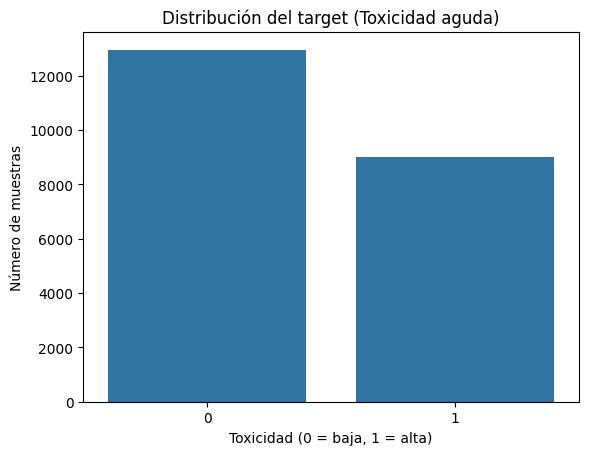

In [120]:
# Visualización de frecuencias
sns.countplot(x=df_trainval[target])
plt.title("Distribución del target (Toxicidad aguda)")
plt.xlabel("Toxicidad (0 = baja, 1 = alta)")
plt.ylabel("Número de muestras")
plt.show()

> Para más detalle, visitar `01_carga_y_exploracion.ipynb`. 

---

# 4 Exploracion de variables y seleccion preliminar de features
[Indice](#indice)

## 4.1 Comprension de variables

In [121]:
# Reporte de Variables
tb.data_report(df_trainval)

COL_N         test_id reference_number test_cas test_location  \
DATA_TYPE       int64            int64   object        object   
MISSINGS (%)      0.0              0.0      0.0           0.0   
UNIQUE_VALUES   20792             1505     1588             3   
CARDIN (%)      94.59             6.85     7.22          0.01   

COL_N         test_exposure_type test_control_type test_media_type  \
DATA_TYPE                 object            object          object   
MISSINGS (%)                 0.0               0.0             0.0   
UNIQUE_VALUES                  4                10               2   
CARDIN (%)                  0.02              0.05            0.01   

COL_N         test_application_freq_unit test_organism_lifestage result_id  \
DATA_TYPE                         object                  object     int64   
MISSINGS (%)                         0.0                     0.0       0.0   
UNIQUE_VALUES                         11                      34     21981   
CARDIN (%)                          0.05                    0.15     100.0   

COL_N          ... split_random split_occurrence split_scaffold-murcko  \
DATA_TYPE      ...       object           object                object   
MISSINGS (%)   ...          0.0              0.0                   0.0   
UNIQUE_VALUES  ...            6                5                     6   
CARDIN (%)     ...         0.03             0.02                  0.03   

COL_N         split_scaffold-murcko-loo-0 split_scaffold-murcko-loo-1  \
DATA_TYPE                          object                      object   
MISSINGS (%)                          0.0                         0.0   
UNIQUE_VALUES                           2                           2   
CARDIN (%)                           0.01                        0.01   

COL_N         split_scaffold-murcko-llo split_scaffold-generic  \
DATA_TYPE                        object                 object   
MISSINGS (%)                        0.0                    0.0   
UNIQUE_VALUES                         2                      6   
CARDIN (%)                         0.01                   0.03   

COL_N         split_scaffold-generic-loo-0 split_scaffold-generic-loo-1  \
DATA_TYPE                           object                       object   
MISSINGS (%)                           0.0                          0.0   
UNIQUE_VALUES                            2                            2   
CARDIN (%)                            0.01                         0.01   

COL_N         split_scaffold-generic-llo  
DATA_TYPE                         object  
MISSINGS (%)                         0.0  
UNIQUE_VALUES                          2  
CARDIN (%)                          0.01  

[4 rows x 1106 columns]

A cada variable del dataset se le ha asignado un segmento temático con el objetivo de estructurar el análisis y facilitar decisiones posteriores. Los segmentos definidos son:

- `identificador`: variables que actúan como claves, códigos únicos o referencias de estudio. No aportan valor predictivo.
- `experimental`: condiciones generales del test, como localización, tipo de medio, control, etc.
- `ensayo`: variables cuantitativas o cualitativas que describen aspectos del ensayo en sí (concentraciones, duraciones, temperaturas, resultados...).
- `taxonómico`: variables relacionadas con la clasificación biológica de la especie utilizada.
- `químico`: descriptores químicos o estructurales de la sustancia evaluada.
- `otros`: cualquier variable que no encaje en los anteriores.

## 4.2 Reduccion preliminar de features

In [122]:
# Clasificación automática preliminar
tipos_auto = tb.tipifica_variables(X_train, umbral_categoria=15, umbral_continua=10)

# Plantilla base para análisis cualitativo
plantilla_analisis = tipos_auto.copy()
plantilla_analisis["segmento"] = ""         # químico, taxonómico, experimental...
plantilla_analisis["expectativas"] = ""     # ¿aportará valor predictivo?
plantilla_analisis["conclusion"] = ""       # ¿mantener, revisar, eliminar?

In [123]:
# Clasificación general por segmento
plantilla_analisis["segmento"] = plantilla_analisis["nombre_variable"].apply(tb.asignar_segmento)
plantilla_analisis

nombre_variable      tipo_sugerido       segmento  \
0                          test_id  Numérica Continua  identificador   
1                 reference_number  Numérica Discreta  identificador   
2                         test_cas  Numérica Discreta   experimental   
3                    test_location         Categorica   experimental   
4               test_exposure_type         Categorica   experimental   
...                            ...                ...            ...   
1100     split_scaffold-murcko-llo            Binaria          otros   
1101        split_scaffold-generic         Categorica          otros   
1102  split_scaffold-generic-loo-0            Binaria          otros   
1103  split_scaffold-generic-loo-1            Binaria          otros   
1104    split_scaffold-generic-llo            Binaria          otros   

     expectativas conclusion  
0                             
1                             
2                             
3                             
4                             
...           ...        ...  
1100                          
1101                          
1102                          
1103                          
1104                          

[1105 rows x 5 columns]

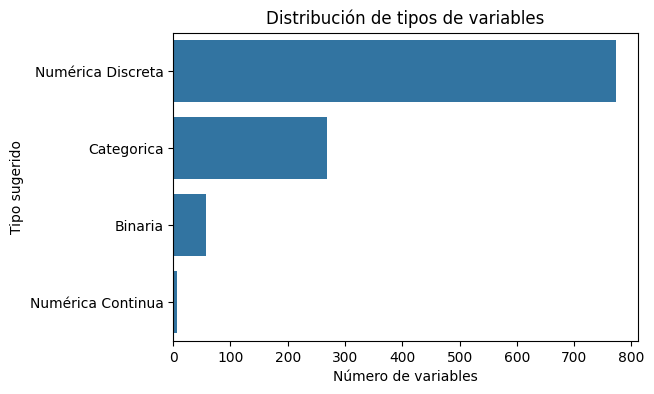

In [124]:
# Visualización de Proporción de variables por tipo sugerido
plt.figure(figsize=(6,4))
sns.countplot(data=plantilla_analisis, y="tipo_sugerido", order=plantilla_analisis["tipo_sugerido"].value_counts().index)
plt.title("Distribución de tipos de variables")
plt.xlabel("Número de variables")
plt.ylabel("Tipo sugerido")
plt.show()

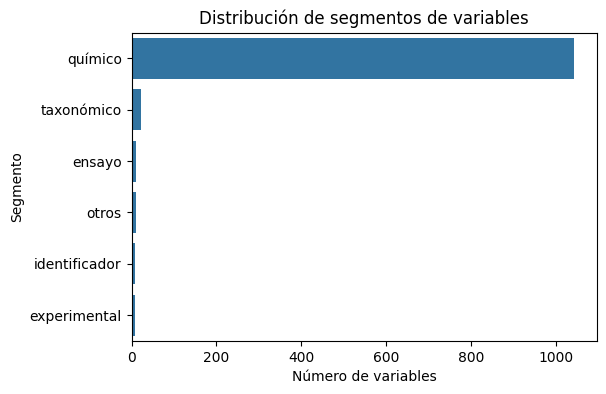

In [125]:
# Visualización de Proporción de variables por segmento
plt.figure(figsize=(6,4))
sns.countplot(data=plantilla_analisis, y="segmento", order=plantilla_analisis["segmento"].value_counts().index)
plt.title("Distribución de segmentos de variables")
plt.xlabel("Número de variables")
plt.ylabel("Segmento")
plt.show()

### Criterios aplicados hasta el momento para marcar eliminar
[Indice](#indice)

#### 1. **Identificadores (ID, codigos, referencias)**

    Variables que contienen términos como id, code, ref, number, name y cuyo único propósito es identificación.

#### 2. **Variables quimicas nominales**

    Columnas dentro del segmento “químico” que representan nombres, identificadores u otros atributos no numéricos o no estructurales.

In [126]:
# Eliminación de variables que no aportan valor predictivo o pueden inducir fugas
plantilla_analisis.loc[
    (plantilla_analisis["segmento"] == "identificador") |
    (plantilla_analisis["nombre_variable"].str.contains(
        "name|location|id|ref|code|identifier|inchi|inchikey|smiles|split",
        case=False, regex=True
    )),
    ["expectativas", "conclusion"]
] = ["nula", "eliminar"]

# Visualización rápida para comprobar los cambios
plantilla_analisis[
    plantilla_analisis["conclusion"] == "eliminar"
].head()

nombre_variable      tipo_sugerido       segmento expectativas conclusion
0            test_id  Numérica Continua  identificador         nula   eliminar
1   reference_number  Numérica Discreta  identificador         nula   eliminar
3      test_location         Categorica   experimental         nula   eliminar
9          result_id  Numérica Continua  identificador         nula   eliminar
20          tax_name  Numérica Discreta     taxonómico         nula   eliminar

#### 3. **Baja varianza**
[Indice](#indice)

    También se han identificado variables con varianza nula o extremadamente baja:

   - Las variables constantes (sin ninguna variación entre registros) se han marcado como eliminar.

    - Las variables donde un único valor domina en más del 99 % de los registros se han etiquetado como revisar.

    Este filtrado evita mantener variables redundantes o inútiles que podrían introducir ruido en las siguientes fases del análisis.

In [127]:
# Paso 1 – Detectar variables constantes
selector = VarianceThreshold(threshold=0)
selector.fit(X_train.select_dtypes(include=["number", "bool"]))

columnas_constantes = X_train.select_dtypes(include=["number", "bool"]).columns[~selector.get_support()].tolist()

##  Marcar como eliminar
plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(columnas_constantes),
    ["expectativas", "conclusion"]
] = ["nula", "eliminar"]


# Paso 2 – Detectar columnas con valor dominante (>99%)
umbral = 0.99 * len(X_train)

dominancia = X_train.apply(lambda x: x.value_counts(dropna=False).max())
casi_constantes = dominancia[dominancia > umbral].index.tolist()


# Paso 3 – Excluir variables binarias del marcado automático
binarias = plantilla_analisis[plantilla_analisis["tipo_sugerido"] == "Binaria"]["nombre_variable"].values
casi_constantes_filtradas = [col for col in casi_constantes if col not in binarias and col not in columnas_constantes]

## Marcar como revisar
plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(casi_constantes_filtradas),
    ["expectativas", "conclusion"]
] = ["muy baja", "revisar"]


##### Variables "a revisar" (casi constantes):
Se mostrará lo siguiente: 

- El valor dominante
- Su frecuencia absoluta
- Su porcentaje sobre el total

In [128]:
## 1. Variables marcadas como "revisar"
revisar = plantilla_analisis[plantilla_analisis["conclusion"] == "revisar"].copy()

## 2. Función robusta para calcular valor dominante
def calcular_dominancia(col):
    if col in X_train.columns:
        serie = X_train[col]
        freq_dom = serie.value_counts(dropna=False).max()
        val_dom = serie.value_counts(dropna=False).idxmax()
        total = serie.shape[0]
        return pd.Series({
            "valor_dominante": val_dom,
            "frecuencia": freq_dom,
            "total": total,
            "porcentaje_dominancia": round(freq_dom * 100 / total, 2)
        })
    else:
        return pd.Series({
            "valor_dominante": "fuera de X_train",
            "frecuencia": None,
            "total": None,
            "porcentaje_dominancia": None
        })

## 3. Aplicamos y conservamos índice correctamente
info_dominancia = revisar["nombre_variable"].apply(calcular_dominancia)
revisar = pd.concat([revisar.reset_index(drop=True), info_dominancia.reset_index(drop=True)], axis=1)

## 4. Ordenamos
revisar.sort_values("porcentaje_dominancia", ascending=False, inplace=True)

In [129]:
# ¿Variables con 100% de dominancia?
revisar["porcentaje_dominancia"].value_counts().sort_index()

porcentaje_dominancia
99.16     2
99.40     1
99.45     1
99.51     1
99.60     2
99.75     1
99.91     2
99.92     1
99.98     1
100.00    2
Name: count, dtype: int64

Ahora, se clasifican los valores dominantes en grupos para una mejor interpretación: por ejemplo, '0.0', 'True', 'fish', 'MOR' son valores simbólicos o poco informativos.

In [130]:
def clasifica_valor(val):
    if pd.isna(val):
        return "missing"
    val_str = str(val).strip().lower()
    if val_str in ["0", "0.0", "false", "true", "nan"]:
        return "simbólico vacío"
    elif val_str in ["mor", "fish", "test", "none"]:
        return "simbólico no informativo"
    elif len(val_str) > 50:
        return "cadena larga"
    else:
        return "informativo"

revisar["tipo_valor_dominante"] = revisar["valor_dominante"].apply(clasifica_valor)

In [131]:
# Se ordenan las columnas a revisar por su % de dominancia
cols_revisar = [
    "nombre_variable", "tipo_sugerido", "segmento", 
    "valor_dominante", "tipo_valor_dominante", 
    "frecuencia", "total", "porcentaje_dominancia"
]
revisar[cols_revisar].sort_values("porcentaje_dominancia", ascending=False)

nombre_variable      tipo_sugerido    segmento valor_dominante  \
0          result_effect         Categorica      ensayo             MOR   
1              tax_group         Categorica  taxonómico            fish   
7      chem_mordred_SdNH         Categorica     químico             0.0   
10     chem_mordred_SsSH         Categorica     químico             0.0   
3      chem_mordred_NddC         Categorica     químico             0.0   
6      chem_mordred_SddC         Categorica     químico             0.0   
11    chem_mordred_SdssS         Categorica     químico             0.0   
12   chem_mordred_n4Ring         Categorica     químico             0.0   
13  chem_mordred_n4ARing         Categorica     químico             0.0   
9    chem_mordred_SssssN         Categorica     químico             0.0   
5      chem_mordred_StCH  Numérica Discreta     químico             0.0   
2     chem_mordred_C2SP1         Categorica     químico             0.0   
4     chem_mordred_NaaNH         Categorica     químico             0.0   
8     chem_mordred_SaaNH  Numérica Discreta     químico             0.0   

        tipo_valor_dominante  frecuencia    total  porcentaje_dominancia  
0   simbólico no informativo     21981.0  21981.0                 100.00  
1   simbólico no informativo     21981.0  21981.0                 100.00  
7            simbólico vacío     21976.0  21981.0                  99.98  
10           simbólico vacío     21964.0  21981.0                  99.92  
3            simbólico vacío     21962.0  21981.0                  99.91  
6            simbólico vacío     21962.0  21981.0                  99.91  
11           simbólico vacío     21927.0  21981.0                  99.75  
12           simbólico vacío     21892.0  21981.0                  99.60  
13           simbólico vacío     21892.0  21981.0                  99.60  
9            simbólico vacío     21873.0  21981.0                  99.51  
5            simbólico vacío     21860.0  21981.0                  99.45  
2            simbólico vacío     21850.0  21981.0                  99.40  
4            simbólico vacío     21796.0  21981.0                  99.16  
8            simbólico vacío     21796.0  21981.0                  99.16

In [132]:
# Etiquetado de aquellas cuyo % de domincia > 99.5% y tipo de valor == "simbólico vacío"
umbral = 99
condicion_eliminar = (
    (revisar["porcentaje_dominancia"] >= umbral) &
    (revisar["tipo_valor_dominante"] == "simbólico vacío")
)
revisar.loc[condicion_eliminar, "conclusion"] = "eliminar"

In [133]:
# Integración final a la plantilla de análisis
plantilla_analisis.update(revisar.set_index("nombre_variable"))
plantilla_analisis

nombre_variable      tipo_sugerido       segmento  \
0                          test_id  Numérica Continua  identificador   
1                 reference_number  Numérica Discreta  identificador   
2                         test_cas  Numérica Discreta   experimental   
3                    test_location         Categorica   experimental   
4               test_exposure_type         Categorica   experimental   
...                            ...                ...            ...   
1100     split_scaffold-murcko-llo            Binaria          otros   
1101        split_scaffold-generic         Categorica          otros   
1102  split_scaffold-generic-loo-0            Binaria          otros   
1103  split_scaffold-generic-loo-1            Binaria          otros   
1104    split_scaffold-generic-llo            Binaria          otros   

     expectativas conclusion  
0            nula   eliminar  
1            nula   eliminar  
2                             
3            nula   eliminar  
4                             
...           ...        ...  
1100         nula   eliminar  
1101         nula   eliminar  
1102         nula   eliminar  
1103         nula   eliminar  
1104         nula   eliminar  

[1105 rows x 5 columns]

#### 4. **Missing values en features**
[Indice](#indice)
> Criterio: eliminar si tienen > 40 % de valores nulos.

In [134]:
# Calcular % de missing por columna
missing_ratio = X_train.isnull().mean().sort_values(ascending=False)

# Umbral de eliminación
umbral_missing = 0.4
vars_con_muchos_missing = missing_ratio[missing_ratio > umbral_missing].index.tolist()

# Marcamos en la plantilla
plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(vars_con_muchos_missing),
    ["expectativas", "conclusion"]
] = ["nula", "eliminar"]

# Visualización
plantilla_analisis[
    plantilla_analisis["nombre_variable"].isin(vars_con_muchos_missing)
][["nombre_variable", "tipo_sugerido", "segmento", "expectativas", "conclusion"]]


nombre_variable      tipo_sugerido segmento expectativas conclusion
14  result_conc1_mean_op            Binaria   ensayo         nula   eliminar
71       chem_pka_median  Numérica Discreta  químico         nula   eliminar

#### 5. **Columnas repetidas o redundantes**
[Indice](#indice)

> Identifica columnas que son exactamente iguales en todos los registros.

In [135]:
# Transponer para usar duplicated() por columnas
duplicadas_mask = X_train.T.duplicated()
columnas_duplicadas = X_train.columns[duplicadas_mask].tolist()

# Marcar como eliminar
plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(columnas_duplicadas),
    ["expectativas", "conclusion"]
] = ["duplicada", "eliminar"]

# Revisión
plantilla_analisis[
    plantilla_analisis["nombre_variable"].isin(columnas_duplicadas)
][["nombre_variable", "tipo_sugerido", "segmento", "expectativas", "conclusion"]]


nombre_variable      tipo_sugerido segmento expectativas  \
52                  chem_ws_binary         Categorica  químico    duplicada   
69            chem_mol2vec_allowed         Categorica  químico    duplicada   
382        chem_mordred_nHeavyAtom  Numérica Discreta  químico    duplicada   
564           chem_mordred_nBondsT         Categorica  químico    duplicada   
565           chem_mordred_nBondsA  Numérica Discreta  químico    duplicada   
...                            ...                ...      ...          ...   
1035       chem_mordred_n11FAHRing            Binaria  químico    duplicada   
1036       chem_mordred_n12FAHRing            Binaria  químico    duplicada   
1039            chem_mordred_SLogP  Numérica Discreta  químico    duplicada   
1066            chem_mordred_MWC01  Numérica Discreta  químico    duplicada   
1103  split_scaffold-generic-loo-1            Binaria    otros    duplicada   

     conclusion  
52     eliminar  
69     eliminar  
382    eliminar  
564    eliminar  
565    eliminar  
...         ...  
1035   eliminar  
1036   eliminar  
1039   eliminar  
1066   eliminar  
1103   eliminar  

[174 rows x 5 columns]

##### **Revisión manual de variables taxonómicas redundantes**
Este paso requiere mirar las columnas taxonómicas y quedarnos con aquellas más informativas/no redundantes.

In [136]:
# Ver todas las columnas del segmento taxonómico
taxonomicas = plantilla_analisis[plantilla_analisis["segmento"] == "taxonómico"]["nombre_variable"].tolist()
X_train[taxonomicas]  # Inspección manual

tax_all             tax_name  \
1      Actinopterygii Cypriniformes Cyprinidae Cyprin...          Common Carp   
2      Actinopterygii Cypriniformes Cyprinidae Cyprin...          Common Carp   
4      Actinopterygii Cypriniformes Cyprinidae Cyprin...          Common Carp   
5      Actinopterygii Cypriniformes Cyprinidae Cyprin...          Common Carp   
6      Actinopterygii Cypriniformes Cyprinidae Cyprin...          Common Carp   
...                                                  ...                  ...   
26101  Actinopterygii Cyprinodontiformes Nothobranchi...  Turquoise Killifish   
26102  Actinopterygii Cyprinodontiformes Nothobranchi...  Turquoise Killifish   
26103  Actinopterygii Cyprinodontiformes Nothobranchi...  Turquoise Killifish   
26112  Actinopterygii Perciformes Gobiidae Pomatoschi...            Sand Goby   
26113  Actinopterygii Perciformes Gobiidae Pomatoschi...            Sand Goby   

            tax_class           tax_order        tax_family       tax_genus  \
1      Actinopterygii       Cypriniformes        Cyprinidae        Cyprinus   
2      Actinopterygii       Cypriniformes        Cyprinidae        Cyprinus   
4      Actinopterygii       Cypriniformes        Cyprinidae        Cyprinus   
5      Actinopterygii       Cypriniformes        Cyprinidae        Cyprinus   
6      Actinopterygii       Cypriniformes        Cyprinidae        Cyprinus   
...               ...                 ...               ...             ...   
26101  Actinopterygii  Cyprinodontiformes  Nothobranchiidae  Nothobranchius   
26102  Actinopterygii  Cyprinodontiformes  Nothobranchiidae  Nothobranchius   
26103  Actinopterygii  Cyprinodontiformes  Nothobranchiidae  Nothobranchius   
26112  Actinopterygii         Perciformes          Gobiidae  Pomatoschistus   
26113  Actinopterygii         Perciformes          Gobiidae  Pomatoschistus   

      tax_species                  tax_gs tax_group  tax_pdm_available  ...  \
1          carpio         Cyprinus_carpio      fish               True  ...   
2          carpio         Cyprinus_carpio      fish               True  ...   
4          carpio         Cyprinus_carpio      fish               True  ...   
5          carpio         Cyprinus_carpio      fish               True  ...   
6          carpio         Cyprinus_carpio      fish               True  ...   
...           ...                     ...       ...                ...  ...   
26101     furzeri  Nothobranchius_furzeri      fish               True  ...   
26102     furzeri  Nothobranchius_furzeri      fish               True  ...   
26103     furzeri  Nothobranchius_furzeri      fish               True  ...   
26112     minutus  Pomatoschistus_minutus      fish               True  ...   
26113     minutus  Pomatoschistus_minutus      fish               True  ...   

      tax_eco_migrate5 tax_eco_migrate2 tax_ps_ampv tax_ps_ampkap  \
1        potamodromous        migration     0.01498        0.3392   
2        potamodromous        migration     0.01498        0.3392   
4        potamodromous        migration     0.01498        0.3392   
5        potamodromous        migration     0.01498        0.3392   
6        potamodromous        migration     0.01498        0.3392   
...                ...              ...         ...           ...   
26101     no_migration     no_migration     0.07375        0.9545   
26102     no_migration     no_migration     0.07375        0.9545   
26103     no_migration     no_migration     0.07375        0.9545   
26112     amphidromous        migration     0.01346        0.9548   
26113     amphidromous        migration     0.01346        0.9548   

      tax_ps_amppm  tax_lh_amd  tax_lh_lbcm  tax_lh_lpcm  tax_lh_licm  \
1            364.5     13870.0         0.70         25.1       130.00   
2            364.5     13870.0         0.70         25.1       130.00   
4            364.5     13870.0         0.70         25.1       130.00   
5            364.5     13870.0         0.70         25.1 

In [137]:
# Columnas taxonómicas redundantes que eliminaremos
columnas_redundantes_tax = ["tax_all", "tax_group", "tax_genus", "tax_species"]

# Aplicamos la decisión
plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(columnas_redundantes_tax),
    ["expectativas", "conclusion"]
] = ["redundante", "eliminar"]

se ha decidido eliminar las columnas `tax_all` y `tax_group` por contener información redundante:

- `tax_all` codifica familia, género y especie en una sola columna.
- `tax_group` representa un nivel taxonómico general poco informativo para predicción en este caso en particular, porque **no trabajaremos con el resto de datasets taxonómicos de ADORE**, que incluyen los grupos taxonómicos de algas y crustáceos.

→ Ambas han sido marcadas como `redundante` y `eliminar` en la plantilla de análisis.

### Checkpoint
Hasta este punto se ha llevado a cabo un proceso de selección y descarte de variables basado en **criterios estructurales**, es decir, sin tener en cuenta aún su relación directa con el target. Los criterios aplicados incluyen:

- Eliminación de identificadores y atributos nominales sin valor predictivo
- Eliminación de variables constantes o casi constantes
- Detección de columnas con más del 40 % de valores ausentes
- Eliminación de columnas duplicadas
- Revisión de la taxonomía para evitar redundancias

A continuación, se da paso a la **evaluación predictiva de features**, donde se analizará la relevancia de cada variable respecto al target (`result_conc1_mean_binary`) mediante:

6. Correlación lineal (Pearson)
7. Feature importance con Random Forest
8. Tests estadísticos univariados (SelectKBest)

#### 6. **Correlacion lineal con el target (pearson)**
[Indice](#indice)

Objetivo: Identificar variables que tienen poca o nula correlación lineal con el target binario `result_conc1_mean_binary`, y por tanto podrían ser descartables si no aportan valor predictivo.

In [138]:
# Selección de variables numéricas 
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()

# Añadimos el target temporalmente para correlacionar
df_temp = X_train[num_cols].copy()
df_temp["target"] = y_train

# Correlación de Pearson
correlaciones = df_temp.corr(method='pearson')["target"].drop("target")

# Umbral de corte para baja correlación lineal
correlaciones_bajas = correlaciones[correlaciones.abs() < 0.1].sort_values()

In [139]:
# Reasignar la conclusión solo si NO están ya marcadas como 'eliminar'
# Versión correcta con protección
plantilla_analisis.loc[
    (plantilla_analisis["nombre_variable"].isin(correlaciones_bajas.index)) &
    (~plantilla_analisis["conclusion"].isin(["eliminar"])),
    ["expectativas", "conclusion"]
] = ["muy baja (corr)", "revisar"]

In [140]:
# Visualización de variables marcadas por correlación baja
filtro_corr = plantilla_analisis["expectativas"] == "muy baja (corr)"

# Cuántas hay
print(f"Variables con muy baja correlación con el target: {filtro_corr.sum()}")

# Visualizamos tabla
display(
    plantilla_analisis[filtro_corr][[
        "nombre_variable", "segmento", "tipo_sugerido", "expectativas", "conclusion"
    ]].sort_values("segmento")
)

Variables con muy baja correlación con el target: 284


nombre_variable    segmento      tipo_sugerido     expectativas  \
12  result_obs_duration_mean      ensayo         Categorica  muy baja (corr)   
15         result_conc1_mean      ensayo  Numérica Continua  muy baja (corr)   
16     result_conc1_mean_mol      ensayo  Numérica Continua  muy baja (corr)   
17             media_ph_mean      ensayo  Numérica Discreta  muy baja (corr)   
18    media_temperature_mean      ensayo  Numérica Discreta  muy baja (corr)   
..                       ...         ...                ...              ...   
39               tax_lh_lbcm  taxonómico  Numérica Discreta  muy baja (corr)   
38                tax_lh_amd  taxonómico  Numérica Discreta  muy baja (corr)   
37              tax_ps_amppm  taxonómico  Numérica Discreta  muy baja (corr)   
36             tax_ps_ampkap  taxonómico  Numérica Discreta  muy baja (corr)   
35               tax_ps_ampv  taxonómico  Numérica Discreta  muy baja (corr)   

   conclusion  
12    revisar  
15    revisar  
16    revisar  
17    revisar  
18    revisar  
..        ...  
39    revisar  
38    revisar  
37    revisar  
36    revisar  
35    revisar  

[284 rows x 5 columns]

In [141]:
# Top variables más correlacionadas
correlaciones.abs().sort_values(ascending=False).head(15)

result_conc1_mean_log        0.807384
result_conc1_mean_mol_log    0.801810
chem_mordred_ZMIC0           0.537682
chem_mordred_ZMIC1           0.532275
chem_mordred_ATS4Z           0.514942
chem_mordred_FilterItLogS    0.514485
chem_mordred_LabuteASA       0.512196
chem_mw                      0.510472
chem_mordred_Sm              0.510397
chem_mordred_MW              0.508444
chem_mordred_ATS4m           0.507988
chem_mordred_ATS2Z           0.500132
chem_mordred_ATS5m           0.499871
chem_mordred_ATS2m           0.496339
chem_mordred_ATS3Z           0.496087
Name: target, dtype: float64

In [142]:
# Clasificación de las expectativas en categorías
def clasificar_expectativa(val):
    if pd.isna(val):
        return "sin etiqueta"
    val = val.lower()
    if "nula" in val:
        return "nula"
    elif "corr" in val:
        return "muy baja (corr)"
    elif "muy baja" in val:
        return "muy baja"
    elif "duplicada" in val:
        return "duplicada"
    else:
        return val

plantilla_analisis["grupo_expectativa"] = plantilla_analisis["expectativas"].apply(clasificar_expectativa)

# Tabla resumen de cruce: grupo_expectativa vs conclusion
resumen = plantilla_analisis.groupby(["grupo_expectativa", "conclusion"]).size().unstack(fill_value=0)
display(resumen)


conclusion              eliminar  revisar
grupo_expectativa                        
                   608         0        0
duplicada            0       174        0
muy baja             0         0        1
muy baja (corr)      0         0      284
nula                 0        34        0
redundante           0         4        0

##### Resumen de decisiones de feature selection estructural

Se ha generado una tabla resumen cruzando las distintas **etiquetas de expectativas** (criterio aplicado) con las **conclusiones tomadas** (`mantener`, `revisar`, `eliminar`). Esto permite comprobar si alguna variable ha sido marcada por múltiples criterios y verificar si las decisiones finales son coherentes.

Además, se ha reasegurado que ninguna variable previamente marcada como `eliminar` (por ejemplo, por tener demasiados missing, ser constante, duplicada, etc.) haya sido sobrescrita por etiquetas más laxas como `revisar`.

Este checkpoint garantiza que la reducción de features basada en estructura es **consistente, trazable y robusta** antes de proceder.

#### 7. **Feature importance con Random Forest**
[Indice](#indice)

Estas columnas:

- `result_conc1_mean`

- `result_conc1_mean_log`

- `result_conc1_mean_mol_log`

...son versiones transformadas del mismo valor que se usa para construir el target binario result_conc1_mean_binary.

Dado que este target binario fue generado a partir de esos valores, mantener las columnas originales en el set de features implica que el modelo tendría acceso directo a la respuesta continua real.

In [143]:
# 1. Marcar columnas con fuga de información
leak_cols = [
    "result_conc1_type",
    "result_conc1_mean",
    "result_conc1_mean_log",
    "result_conc1_mean_mol",
    "result_conc1_mean_mol_log"
]

plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(leak_cols),
    ["expectativas", "conclusion"]
] = ["leak (target)", "eliminar"]

# 2. Eliminar del set de entrenamiento
X_train_corr = X_train.drop(columns=leak_cols)


- **Paso 1: Selección de features válidas**

    Usamos únicamente columnas con `conclusion != "eliminar"` en plantilla_analisis.

In [144]:
# Seleccionar columnas válidas según la plantilla
features_validas = plantilla_analisis[
    plantilla_analisis["conclusion"] != "eliminar"
]["nombre_variable"].tolist()

X_validas = X_train[features_validas].copy()

In [145]:
# Confirmar que las columnas eliminadas están en la plantilla
eliminadas = set(X_train.columns) - set(features_validas)
print("Columnas que deberían eliminarse pero aún están presentes:", eliminadas)


Columnas que deberían eliminarse pero aún están presentes: {'chem_mordred_n3aHRing', 'chem_mordred_NssPH', 'split_random', 'chem_mordred_SddssSe', 'tax_all', 'chem_mordred_nHeavyAtom', 'chem_mordred_SssPbH2', 'chem_mordred_n9AHRing', 'test_cas_name', 'chem_inchikey', 'chem_mordred_n5FHRing', 'chem_mordred_NsLi', 'chem_mordred_n12FAHRing', 'chem_mordred_nBridgehead', 'chem_mordred_n4aRing', 'chem_mordred_n12AHRing', 'chem_mordred_n4FRing', 'chem_mordred_n11aRing', 'test_location', 'chem_mordred_SMR_VSA8', 'chem_mordred_SsGeH3', 'chem_mordred_SsssSiH', 'chem_mordred_SssAsH', 'result_conc1_type', 'chem_mordred_n9aHRing', 'split_scaffold-murcko-loo-1', 'chem_mordred_n8aRing', 'chem_mordred_n12FARing', 'chem_mordred_n4FaHRing', 'split_scaffold-generic-loo-1', 'chem_mordred_n11HRing', 'chem_mordred_n4FHRing', 'tax_name', 'chem_dtxsid', 'split_scaffold-murcko-loo-0', 'chem_mordred_NsssAs', 'chem_mordred_n4FARing', 'chem_mol2vec_allowed', 'chem_mordred_NssSe', 'chem_mordred_n12aRing', 'chem_pc

- **Paso 2: Preprocesamiento básico**

    Transformamos las categóricas (si hay) con OneHotEncoder para que el modelo pueda manejarlas.

In [146]:
# Detectar tipo de variables
cat_cols = X_validas.select_dtypes(include="object").columns.tolist()
num_cols = X_validas.select_dtypes(include="number").columns.tolist()

# Pipeline de transformación
preprocesado = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
    remainder="drop"
)


- **Paso 3: Entrenar modelo Random Forest**

In [147]:
# Pipeline completo
modelo_rf = make_pipeline(preprocesado, RandomForestClassifier(random_state=42, n_estimators=100))

# Entrenamos
modelo_rf.fit(X_validas, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['result_obs_duration_mean',
                                                   'media_ph_mean',
                                                   'media_temperature_mean',
                                                   'tax_ps_ampv',
                                                   'tax_ps_ampkap',
                                                   'tax_ps_amppm', 'tax_lh_amd',
                                                   'tax_lh_lbcm', 'tax_lh_lpcm',
                                                   'tax_lh_licm',
                                                   'tax_lh_ri#/d', 'chem_mw',
                                                   'chem_mp', 'chem_ws',
                                                   'chem_pcp_heavy_atom_count',
                                                   'che...
                                                   'test_application_freq_unit',
                                                   'test_organism_lifestage',
                                                   'result_effect',
                                                   'result_endpoint',
                                                   'tax_class', 'tax_order',
                                                   'tax_family', 'tax_gs',
                                                   'tax_eco_climate',
                                                   'tax_eco_ecozone',
                                                   'tax_eco_food',
                                                   'tax_eco_migrate5',
                                                   'tax_eco_migrate2',
                                                   'chem_sf', 'chem_pcp_fp',
                                                   'chem_MACCS_fp',
                                                   'chem_Morgan_fp',
                                                   'chem_ToxPrint_fp'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

- **Paso 4: Obtener importancias**

In [148]:
# Obtener nombres de columnas tras transformación
feature_names_transformadas = modelo_rf.named_steps["columntransformer"].get_feature_names_out()

# Obtener importancias
importancias = modelo_rf.named_steps["randomforestclassifier"].feature_importances_

# Construimos DataFrame ordenado
importancia_df = pd.DataFrame({
    "feature": feature_names_transformadas,
    "importance": importancias
}).sort_values("importance", ascending=False)


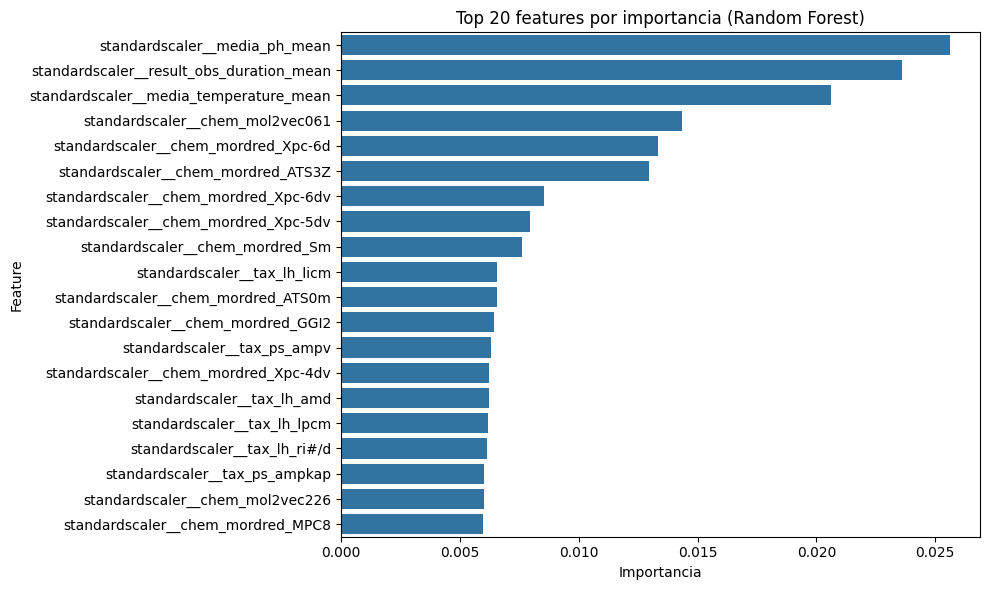

In [149]:
# Visualización: Top 20
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia_df.head(20), x="importance", y="feature")
plt.title("Top 20 features por importancia (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


- **Paso 5: Asignar las importancias a la plantilla_analisis**

In [150]:
# Asociar importancias con nombres originales

# Recuperar nombres originales de features (antes del preprocesado)
from sklearn.utils import Bunch

# Obtener nombres desde el transformador
transformer = modelo_rf.named_steps["columntransformer"]

# Construimos lista ordenada de nombres originales (respetando orden de salida)
nombres_transformadas = transformer.get_feature_names_out()

# DataFrame con nombres originales + importancia
df_importancias = pd.DataFrame({
    "nombre_transformada": nombres_transformadas,
    "importancia": modelo_rf.named_steps["randomforestclassifier"].feature_importances_
})

# Extraemos la variable original (antes de transformación)
df_importancias["nombre_variable"] = df_importancias["nombre_transformada"].apply(lambda x: x.split("__")[-1])

# Agregamos por variable original
importancia_agregada = df_importancias.groupby("nombre_variable")["importancia"].sum().sort_values(ascending=False).reset_index()

# Visualización
display(importancia_agregada.head(15))


nombre_variable  importancia
0              media_ph_mean     0.025601
1   result_obs_duration_mean     0.023617
2     media_temperature_mean     0.020632
3            chem_mol2vec061     0.014354
4        chem_mordred_Xpc-6d     0.013335
5         chem_mordred_ATS3Z     0.012960
6       chem_mordred_Xpc-6dv     0.008557
7       chem_mordred_Xpc-5dv     0.007961
8            chem_mordred_Sm     0.007637
9                tax_lh_licm     0.006548
10        chem_mordred_ATS0m     0.006548
11         chem_mordred_GGI2     0.006439
12               tax_ps_ampv     0.006331
13      chem_mordred_Xpc-4dv     0.006244
14                tax_lh_amd     0.006238

In [151]:
# Guardamos las top 20 features por RF
top_rf = importancia_agregada.head(20).copy()

In [152]:
# Forzar que estén marcadas como mantener en la plantilla
plantilla_analisis.loc[
    plantilla_analisis["nombre_variable"].isin(top_rf["nombre_variable"]),
    ["expectativas", "conclusion"]
] = ["alta (RF)", "mantener"]

In [153]:
# Fusionamos con plantilla
plantilla_analisis = plantilla_analisis.merge(importancia_agregada, on="nombre_variable", how="left")

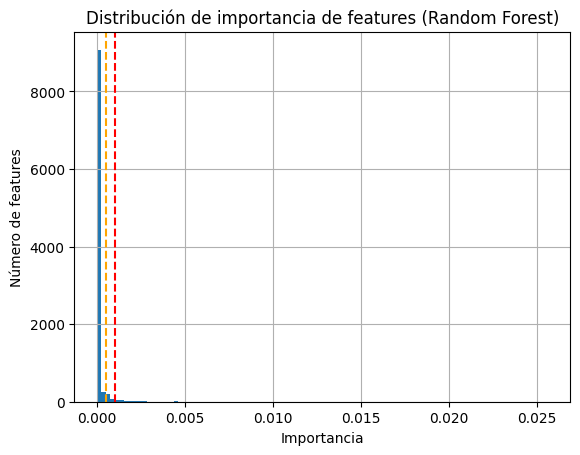

In [154]:
df_importancias["importancia"].hist(bins=100)
plt.axvline(x=0.001, color='red', linestyle='--')
plt.axvline(x=0.0005, color='orange', linestyle='--')
plt.xlabel("Importancia")
plt.ylabel("Número de features")
plt.title("Distribución de importancia de features (Random Forest)")
plt.show()

Distribución fuertemente sesgada a la izquierda: la mayoría de las features tienen importancia casi nula.

Para este tipo de distribución, el método del percentil es más objetivo y robusto que un corte absoluto por valor, porque:

1. Se adapta a la escala real del modelo.

2. Evita sesgos cuando el total de features es muy grande.

3. Permite mantener una fracción razonable de variables con baja importancia, sin arrasar con todo.

In [155]:
# Calcular umbral por percentil
umbral_percentil = df_importancias["importancia"].quantile(0.25)

# Aplicarlo en la plantilla si no están ya eliminadas
plantilla_analisis.loc[
    (plantilla_analisis["importancia"] <= umbral_percentil) &
    (~plantilla_analisis["conclusion"].isin(["eliminar"])),
    ["expectativas", "conclusion"]
] = ["muy baja (imp)", "revisar"]

In [156]:
# Variables marcadas por baja importancia
filtro_imp = plantilla_analisis["expectativas"] == "muy baja (imp)"
print(f"Variables con importancia muy baja: {filtro_imp.sum()}")

plantilla_analisis[filtro_imp][[
    "nombre_variable", "segmento", "tipo_sugerido", "importancia", "conclusion"
]].sort_values("importancia")


Variables con importancia muy baja: 19


nombre_variable segmento tipo_sugerido  importancia conclusion
396            chem_mordred_nI  químico       Binaria          0.0    revisar
651          chem_mordred_NdNH  químico       Binaria          0.0    revisar
673         chem_mordred_NsssP  químico       Binaria          0.0    revisar
752         chem_mordred_SsssP  químico       Binaria          0.0    revisar
906        chem_mordred_n8Ring  químico       Binaria          0.0    revisar
910       chem_mordred_n12Ring  químico       Binaria          0.0    revisar
911      chem_mordred_nG12Ring  químico       Binaria          0.0    revisar
913       chem_mordred_n3HRing  químico       Binaria          0.0    revisar
917       chem_mordred_n7HRing  químico       Binaria          0.0    revisar
918       chem_mordred_n8HRing  químico       Binaria          0.0    revisar
923     chem_mordred_nG12HRing  químico       Binaria          0.0    revisar
976       chem_mordred_n7FRing  químico       Binaria          0.0    revisar
977       chem_mordred_n8FRing  químico       Binaria          0.0    revisar
980      chem_mordred_n11FRing  químico       Binaria          0.0    revisar
987      chem_mordred_n7FHRing  químico       Binaria          0.0    revisar
991     chem_mordred_n11FHRing  químico       Binaria          0.0    revisar
992     chem_mordred_n12FHRing  químico       Binaria          0.0    revisar
1015  chem_mordred_nG12FaHRing  químico       Binaria          0.0    revisar
1023    chem_mordred_n10FARing  químico       Binaria          0.0    revisar

### 8. **SelectKBest (test estadistico univariado)**
[Indice](#indice)

Este método aplica un test estadístico univariado entre cada feature y el target, para estimar si su relación es significativa.

In [157]:
# 1. Selección de variables numéricas
num_cols = X_train_corr.select_dtypes(include=["number"]).columns.tolist()

# 2. Eliminamos columnas con valores NaN para que el test funcione
X_kbest = X_train_corr[num_cols].dropna(axis=1)
cols_kbest = X_kbest.columns.tolist()

# 3. Aplicamos el test ANOVA (f_classif)
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_kbest, y_train)

# 4. Guardamos resultados
scores = selector.scores_
pvalues = selector.pvalues_

df_kbest = pd.DataFrame({
    "nombre_variable": cols_kbest,
    "score_f": scores,
    "p_value": pvalues
}).sort_values("p_value")

# 5. Aplicamos criterio de filtrado (p > 0.1 se considera irrelevante)
irrelevantes = df_kbest[df_kbest["p_value"] > 0.1]["nombre_variable"].tolist()

# 6. Etiquetado en plantilla si no están ya como "eliminar"
plantilla_analisis.loc[
    (plantilla_analisis["nombre_variable"].isin(irrelevantes)) &
    (~plantilla_analisis["conclusion"].isin(["eliminar"])),
    ["expectativas", "conclusion"]
] = ["muy baja (stat)", "revisar"]

# 7. Visualización rápida
plantilla_analisis[
    plantilla_analisis["expectativas"] == "muy baja (stat)"
][["nombre_variable", "segmento", "tipo_sugerido", "expectativas", "conclusion"]].head()

nombre_variable    segmento      tipo_sugerido     expectativas  \
36     tax_ps_ampkap  taxonómico  Numérica Discreta  muy baja (stat)   
190  chem_mol2vec115     químico  Numérica Discreta  muy baja (stat)   
200  chem_mol2vec125     químico  Numérica Discreta  muy baja (stat)   
215  chem_mol2vec140     químico  Numérica Discreta  muy baja (stat)   
224  chem_mol2vec149     químico  Numérica Discreta  muy baja (stat)   

    conclusion  
36     revisar  
190    revisar  
200    revisar  
215    revisar  
224    revisar

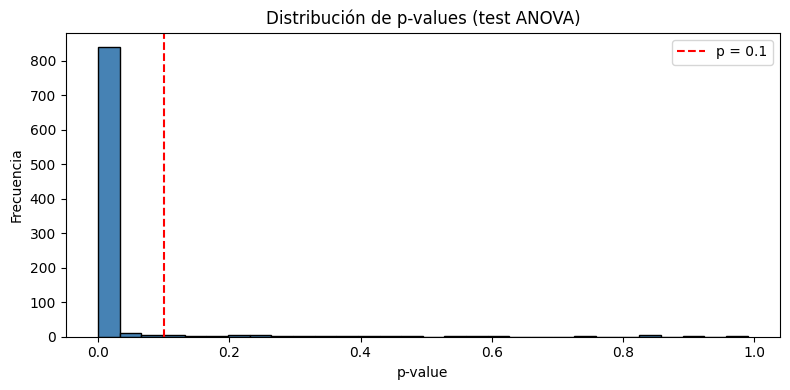

In [158]:
# Histograma de p-values
plt.figure(figsize=(8, 4))
plt.hist(df_kbest["p_value"], bins=30, color="steelblue", edgecolor="black")
plt.axvline(0.1, color="red", linestyle="--", label="p = 0.1")
plt.title("Distribución de p-values (test ANOVA)")
plt.xlabel("p-value")
plt.ylabel("Frecuencia")
plt.legend()
plt.tight_layout()
plt.show()

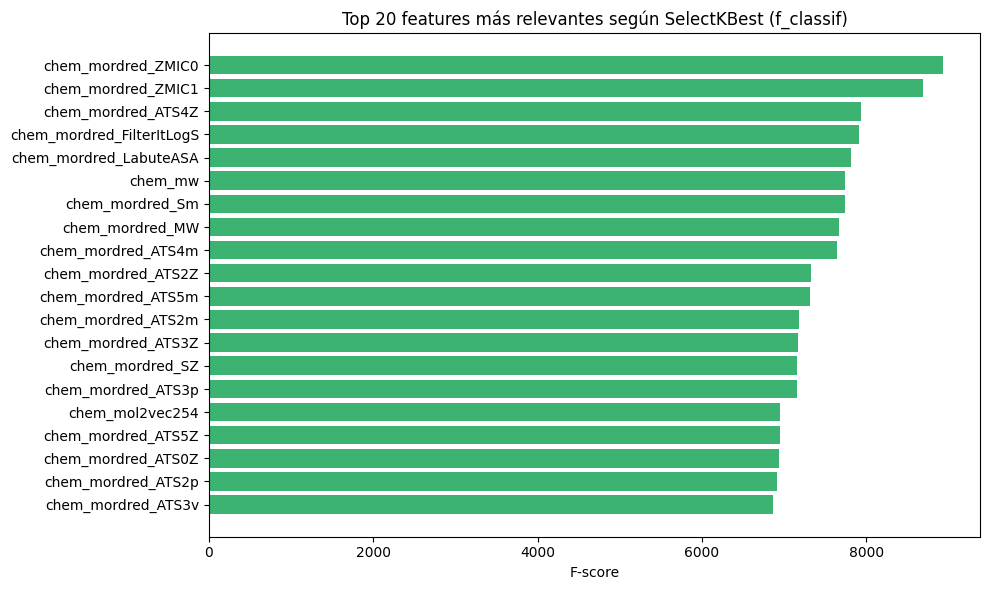

In [159]:
# Top 20 features más relevantes según SelectKBest (score F)
top_features = df_kbest.sort_values("score_f", ascending=False).head(20)

plt.figure(figsize=(10, 6))
plt.barh(top_features["nombre_variable"][::-1], top_features["score_f"][::-1], color="mediumseagreen")
plt.xlabel("F-score")
plt.title("Top 20 features más relevantes según SelectKBest (f_classif)")
plt.tight_layout()
plt.show()

In [160]:
# Guardado de las top 20 features según SelectKBest
top_kbest = df_kbest.head(20).copy()

## Cierre de la reduccion preliminar de features
[Indice](#indice)

Se aplicó una primera selección de variables para reducir la complejidad del dataset antes del modelado. Esta selección combinó criterios:

- **Estructurales**: eliminación de identificadores, columnas constantes, duplicadas o con demasiados valores nulos.
- **Predictivos**: baja correlación con el target, baja importancia según Random Forest o SelectKBest.

Las variables marcadas como `"revisar"` no fueron eliminadas aún: podrían aportar valor combinado o depender del preprocesado. Su utilidad se reevaluará en la fase de modelado.

>Detalles completos disponibles en el notebook auxiliar `variables_features.ipynb`.


In [161]:
# Etiquetar como 'mantener' tanto NaN como cadenas vacías
plantilla_analisis.loc[
    plantilla_analisis["conclusion"].isna() | (plantilla_analisis["conclusion"] == ""),
    ["expectativas", "conclusion"]
] = ["mantener", "mantener"]

In [162]:
# Visualizar resumen
resumen_final = plantilla_analisis["conclusion"].value_counts(dropna=False).to_frame("n_variables")
display(resumen_final)

n_variables
conclusion             
mantener            612
revisar             276
eliminar            217

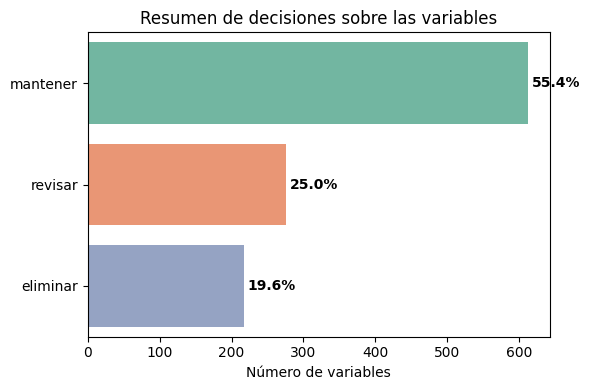

In [163]:
# Calcular resumen con porcentajes
resumen_final = (
    plantilla_analisis["conclusion"]
    .value_counts()
    .rename_axis("Conclusión")
    .to_frame("n_variables")
    .reset_index()
)
resumen_final["%"] = (resumen_final["n_variables"] / resumen_final["n_variables"].sum() * 100).round(1)

# Plot con anotaciones
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=resumen_final, x="n_variables", y="Conclusión", palette="Set2")

# Añadir etiquetas con porcentaje
for i, row in resumen_final.iterrows():
    ax.text(
        row["n_variables"] + 5,
        i,
        f'{row["%"]}%',
        va="center",
        fontsize=10,
        fontweight="bold"
    )

plt.title("Resumen de decisiones sobre las variables")
plt.xlabel("Número de variables")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Resumen final de decisiones sobre las variables
[Indice](#indice)

En este gráfico se visualiza el número total de variables asignadas a cada una de las siguientes categorías:

- **Mantener**: se consideran válidas y serán utilizadas para el modelado.
- **Eliminar**: se descartan por ser identificadores, altamente correlacionadas, con dominancia, sin información útil, etc.
- **Revisar**: muestran comportamiento dudoso (baja importancia, bajo poder estadístico, etc.), y podrían ser descartadas o transformadas tras una revisión más profunda.

Este resumen sintetiza todo el análisis preliminar de features y las evaluaciones previas a los análisis uni y bivariantes.

> Para más información sobre este proceso, visitar `_02_Variables_Features.ipynb`. 

---

# 5 Exploratory Data Analysis
[Indice](#indice)

### Preparacion Previa

In [164]:
# 1. Filtrado de variables válidas para EDA

# Selección de las variables marcadas como "mantener"
vars_mantener = plantilla_analisis.query("conclusion == 'mantener'")["nombre_variable"].tolist()

# Nuevo DataFrame solo con esas columnas
X_train_validadas = X_train[vars_mantener].copy()
print(f"Variables seleccionadas para EDA: {len(vars_mantener)}\n")

Variables seleccionadas para EDA: 612



In [165]:
# 2. Separación por tipo de variable

# Separar en numéricas y categóricas 
vars_numericas = X_train_validadas.select_dtypes(include=['float64', 'int64']).columns.tolist()
vars_categoricas = X_train_validadas.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"Variables numéricas: {len(vars_numericas)}")
print(f"Variables categóricas: {len(vars_categoricas)}")

# Vista previa rápida
X_train_validadas[vars_numericas].describe().T.round(2)


Variables numéricas: 591
Variables categóricas: 21


count     mean      std     min      25%      50%  \
result_obs_duration_mean  21981.0    67.52    31.03   24.00    24.00    96.00   
media_ph_mean             13669.0     7.50     0.55    3.00     7.20     7.40   
media_temperature_mean    16468.0    18.75     5.88    1.60    12.00    20.00   
tax_ps_ampv               21981.0     0.04     0.03    0.01     0.02     0.04   
tax_lh_amd                21981.0  4587.88  4205.54  112.00  1825.00  3468.00   
...                           ...      ...      ...     ...      ...      ...   
chem_mordred_AMW          21981.0    10.24     4.28    4.31     7.36     9.09   
chem_mordred_WPol         21981.0    21.95    13.18    0.00    13.00    21.00   
chem_mordred_Zagreb1      21981.0    75.82    37.04    2.00    54.00    72.00   
chem_mordred_Zagreb2      21981.0    87.65    48.50    1.00    56.00    80.00   
chem_mordred_mZagreb2     21981.0     3.50     1.34    0.75     2.67     3.47   

                              75%       max  
result_obs_duration_mean    96.00     96.00  
media_ph_mean                7.80     10.00  
media_temperature_mean      24.60     40.00  
tax_ps_ampv                  0.06      0.22  
tax_lh_amd                4015.00  54750.00  
...                           ...       ...  
chem_mordred_AMW            11.72     49.95  
chem_mordred_WPol           30.00    104.00  
chem_mordred_Zagreb1        98.00    230.00  
chem_mordred_Zagreb2       112.00    323.00  
chem_mordred_mZagreb2        4.37      9.08  

[591 rows x 8 columns]

 Hay 604 variables marcadas como "mantener". Analizarlas todas manualmente sería inviable y contraproducente. La mejor estrategia para priorizar es:

- Priorizar las más relevantes según modelos previos
    - `RandomForestClassifier.feature_importances_`
    - `SelectKBest `

Estrategia:
Crear un ranking combinado y seleccionar el top 20 de cada tipo (numéricas y categóricas).

In [166]:
# Priorización de variables por importancia combinada

# 1. Cargar archivos con rankings
rf = pd.read_csv("./src/data_sample/features_rf.csv")
kbest = pd.read_csv("./src/data_sample/features_kbest.csv")

# 2. Limpiar nombres de variables transformadas en RF
rf["nombre_variable"] = rf["feature"].apply(lambda x: x.split("__")[-1])

# 3. Calcular rankings individuales
rf["ranking_rf"] = rf["importance"].rank(ascending=False).astype(int)
kbest["ranking_kbest"] = kbest["score_f"].rank(ascending=False).astype(int)

# 4. Unir rankings por nombre original
df_merge = pd.merge(
    rf[["nombre_variable", "ranking_rf"]],
    kbest[["nombre_variable", "ranking_kbest"]],
    on="nombre_variable",
    how="outer"
)

# 5. Definir variables a analizar (Top RF + KBest + prioritarias)
prioritarias = [
    "tax_gs",                   
    "test_exposure_type",
    "test_organism_lifestage",
    "result_endpoint",
    "tax_family",
    "tax_eco_migrate2"
]
top_rf = rf["nombre_variable"].tolist()
top_kbest = kbest["nombre_variable"].tolist()
vars_analizar = list(set(top_rf + top_kbest + prioritarias))

# 6. Filtrar y ordenar por ranking combinado
df_merge["ranking_combinado"] = df_merge[["ranking_rf", "ranking_kbest"]].min(axis=1)
df_ordenadas = df_merge[df_merge["nombre_variable"].isin(vars_analizar)].copy()
df_ordenadas = df_ordenadas.sort_values("ranking_combinado").reset_index(drop=True)

# 7. Lista final ordenada de variables
vars_analizar_ordenadas = df_ordenadas["nombre_variable"].tolist()

# 8. Asegurar que las prioritarias estén incluidas
for var in prioritarias:
    if var not in vars_analizar_ordenadas:
        vars_analizar_ordenadas.append(var)

# 9. Visualizar resumen
print(f"Variables ordenadas para análisis (incluyendo prioritarias): {len(vars_analizar_ordenadas)}")


Variables ordenadas para análisis (incluyendo prioritarias): 46


#### Priorización de variables – Importancia combinada

Se creó un ranking conjunto a partir de Random Forest (`importance`) y SelectKBest (`score_f`), complementado con variables seleccionadas por conocimiento experto. Esto permitió enfocar el análisis en las variables más representativas y con mayor potencial predictivo.

#### Inclusión de variables categóricas prioritarias

Algunas variables categóricas clave (`test_exposure_type`, `result_endpoint`, `tax_order`, etc.) fueron incorporadas manualmente por su alta relevancia biológica, ecológica o regulatoria, a pesar de no destacar en rankings automáticos.

Su análisis permite controlar sesgos, mejorar la interpretabilidad del modelo y favorecer su generalización a condiciones experimentales diversas.

## 5.1 **Analisis univariante**
[Indice](#indice)

### 5.1.1 Variables numericas

Exploramos la distribución de las variables más representativas, comenzando por las variables numéricas.

Se buscarán patrones de asimetría, presencia de outliers, concentraciones extremas o valores dominantes que puedan afectar al modelado.

In [167]:
# Filtrar solo las variables numéricas que aparecen en el ranking ordenado
vars_num_analizar = [var for var in vars_analizar_ordenadas if var in vars_numericas]

print(f"Número de variables numéricas a analizar: {len(vars_num_analizar)}")

Número de variables numéricas a analizar: 38


In [168]:
# Clasificamos las variables según su familia
def clasificar_variable(nombre):
    if nombre.startswith("chem_mordred_"):
        return "mordred"
    elif nombre.startswith("chem_mol2vec"):
        return "mol2vec"
    elif nombre.startswith("tax_"):
        return "tax"
    elif nombre.startswith("media_"):
        return "media"
    elif nombre.startswith("result_"):
        return "result"
    else:
        return "otros"

# DataFrame con clasificación
resumen_final_39 = pd.DataFrame({
    "Variable": vars_num_analizar,
    "Familia": [clasificar_variable(v) for v in vars_num_analizar]
})

# Diccionario de grupos
grupos_variables = {
    familia: resumen_final_39[resumen_final_39["Familia"] == familia]["Variable"].tolist()
    for familia in resumen_final_39["Familia"].unique()
}

grupos_variables

{'media': ['media_ph_mean', 'media_temperature_mean'],
 'mordred': ['chem_mordred_Zagreb1',
  'chem_mordred_TSRW10',
  'chem_mordred_ATSC0d',
  'chem_mordred_TMWC10',
  'chem_mordred_Xpc-6d',
  'chem_mordred_mZagreb2',
  'chem_mordred_ATS3Z',
  'chem_mordred_Xpc-6dv',
  'chem_mordred_SRW05',
  'chem_mordred_Xpc-5dv',
  'chem_mordred_Sm',
  'chem_mordred_SRW02',
  'chem_mordred_SRW07',
  'chem_mordred_ATS0m',
  'chem_mordred_SRW04',
  'chem_mordred_GGI2',
  'chem_mordred_JGI10',
  'chem_mordred_MWC07',
  'chem_mordred_Xpc-4dv',
  'chem_mordred_SRW06',
  'chem_mordred_MWC08',
  'chem_mordred_MWC09',
  'chem_mordred_MWC10',
  'chem_mordred_SRW03',
  'chem_mordred_MPC8',
  'chem_mordred_NssssC'],
 'result': ['result_obs_duration_mean'],
 'mol2vec': ['chem_mol2vec061',
  'chem_mol2vec012',
  'chem_mol2vec057',
  'chem_mol2vec226'],
 'tax': ['tax_lh_licm',
  'tax_ps_ampv',
  'tax_lh_amd',
  'tax_lh_lpcm',
  'tax_lh_ri#/d']}

In [169]:
# Crear el DataFrame con variables numéricas a analizar 
df_modelo = X_train_validadas[vars_num_analizar].copy()

Visualizando grupo: media con 2 variables


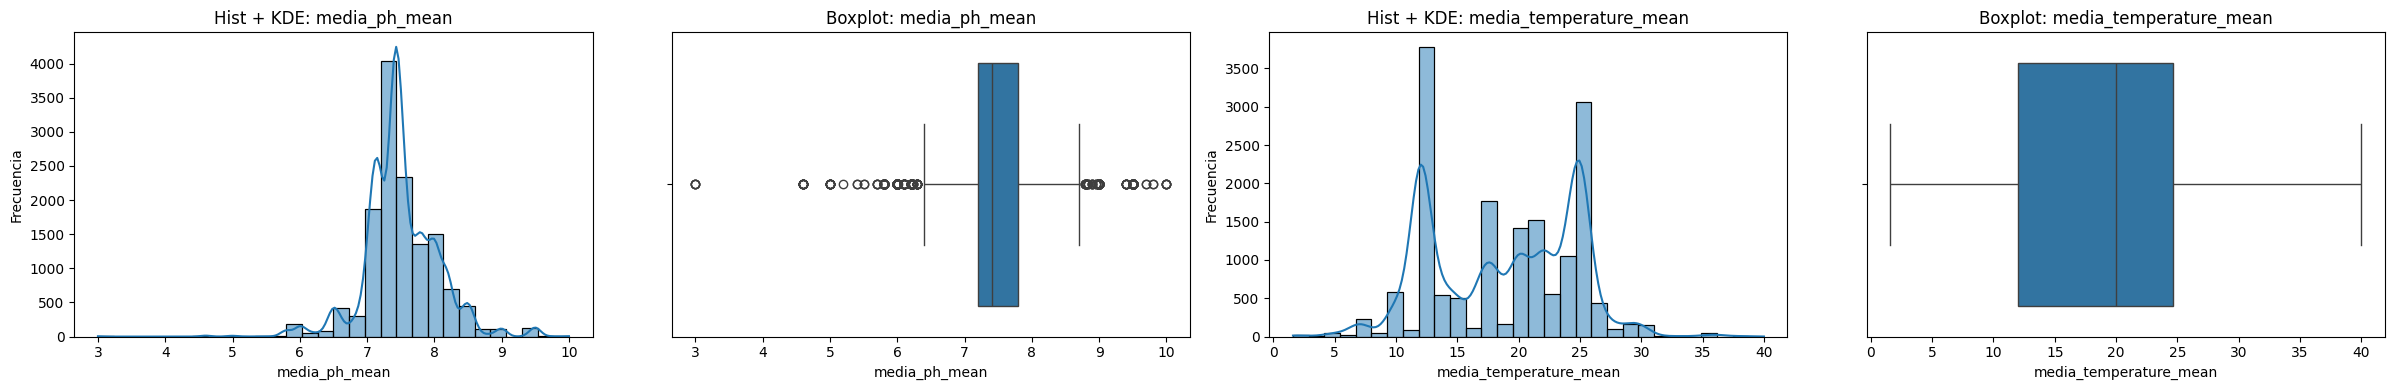

Visualizando grupo: mordred con 26 variables


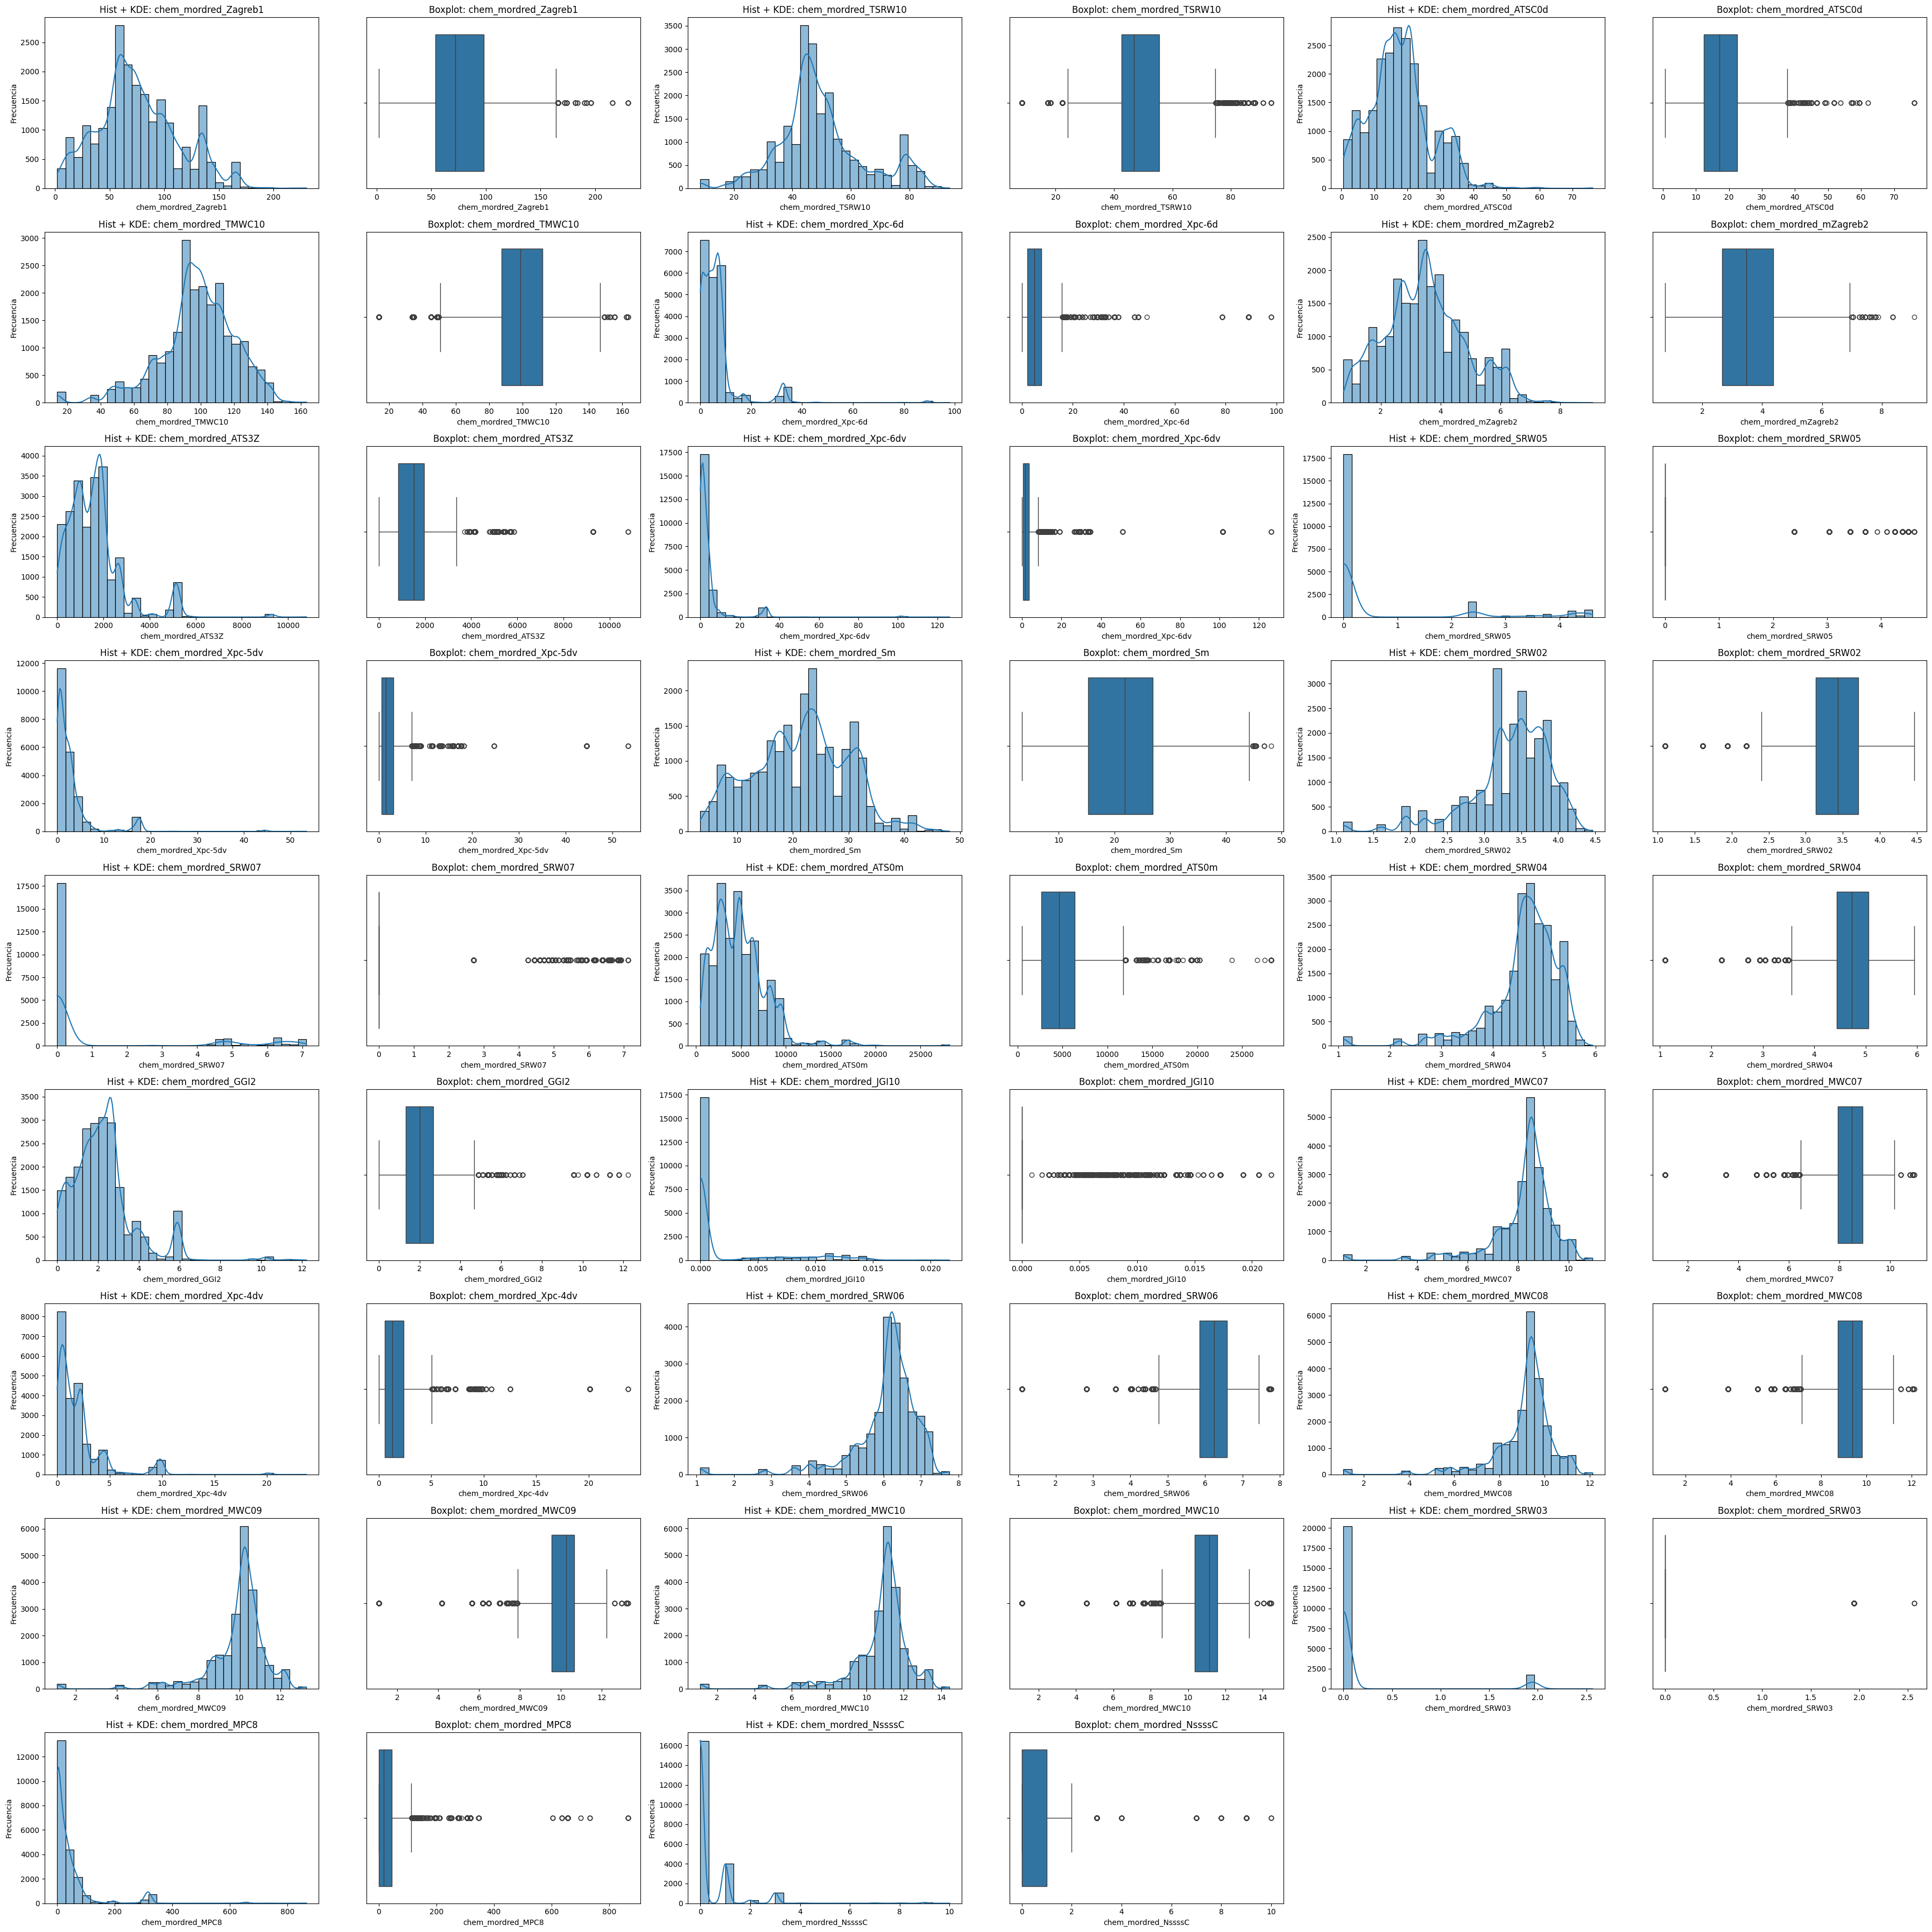

Visualizando grupo: result con 1 variables


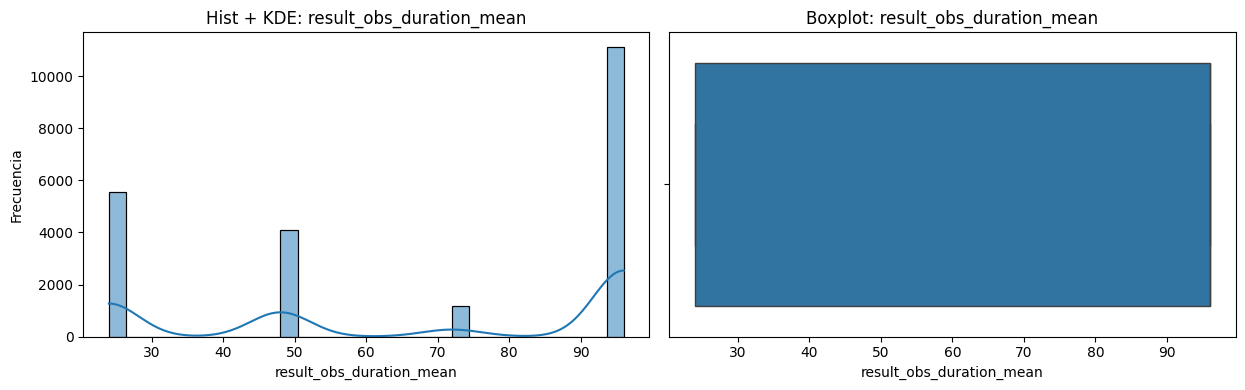

Visualizando grupo: mol2vec con 4 variables


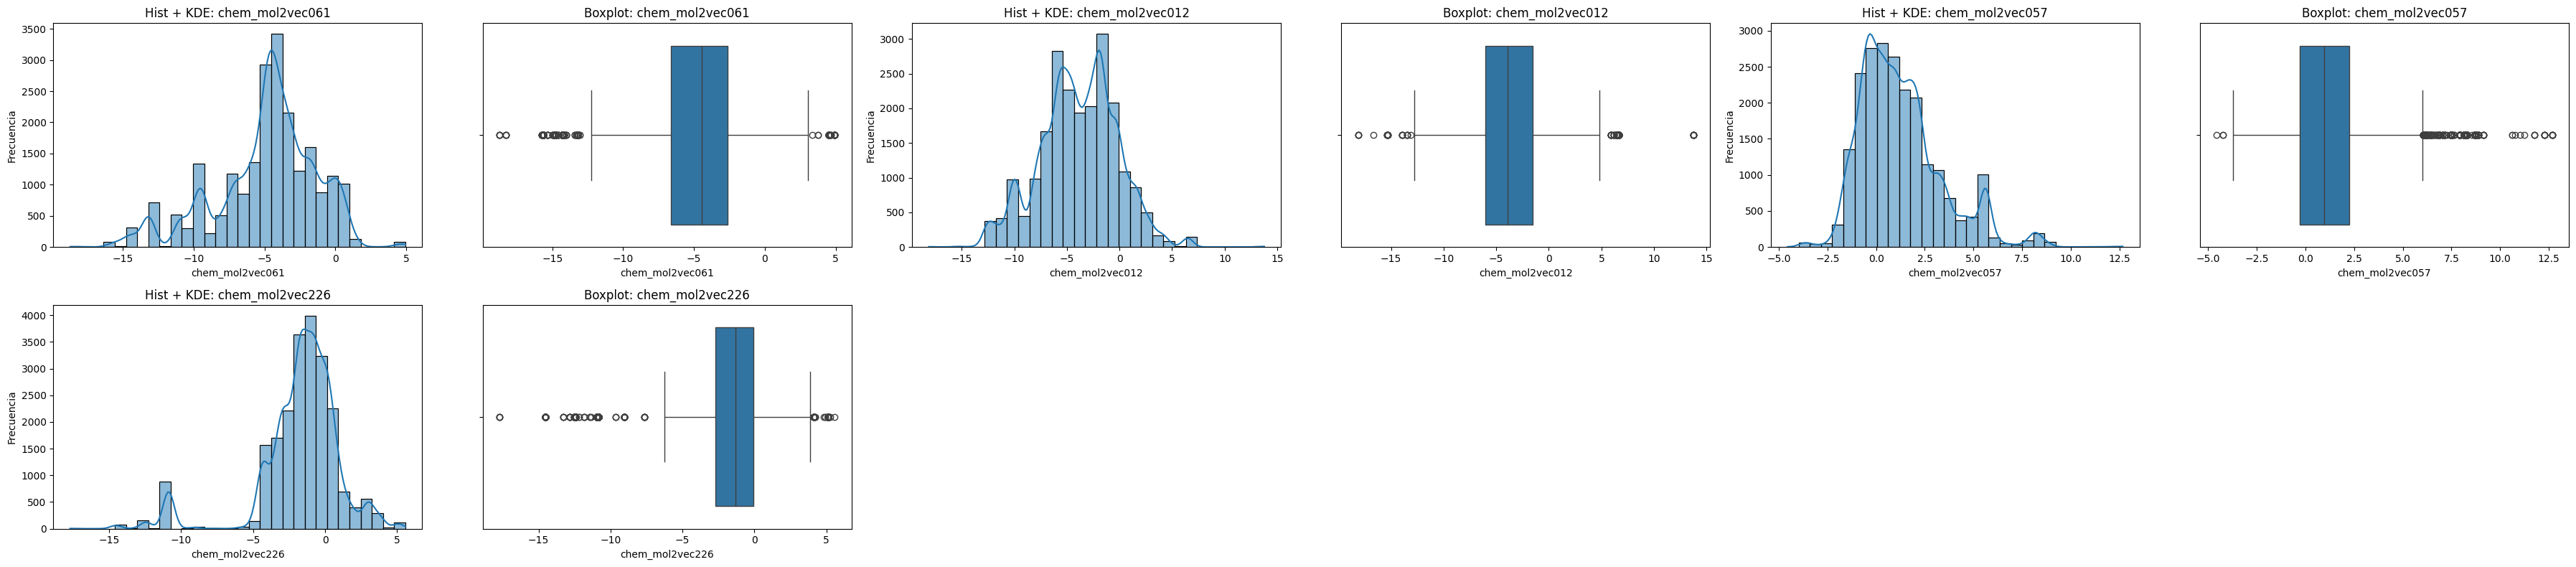

Visualizando grupo: tax con 5 variables


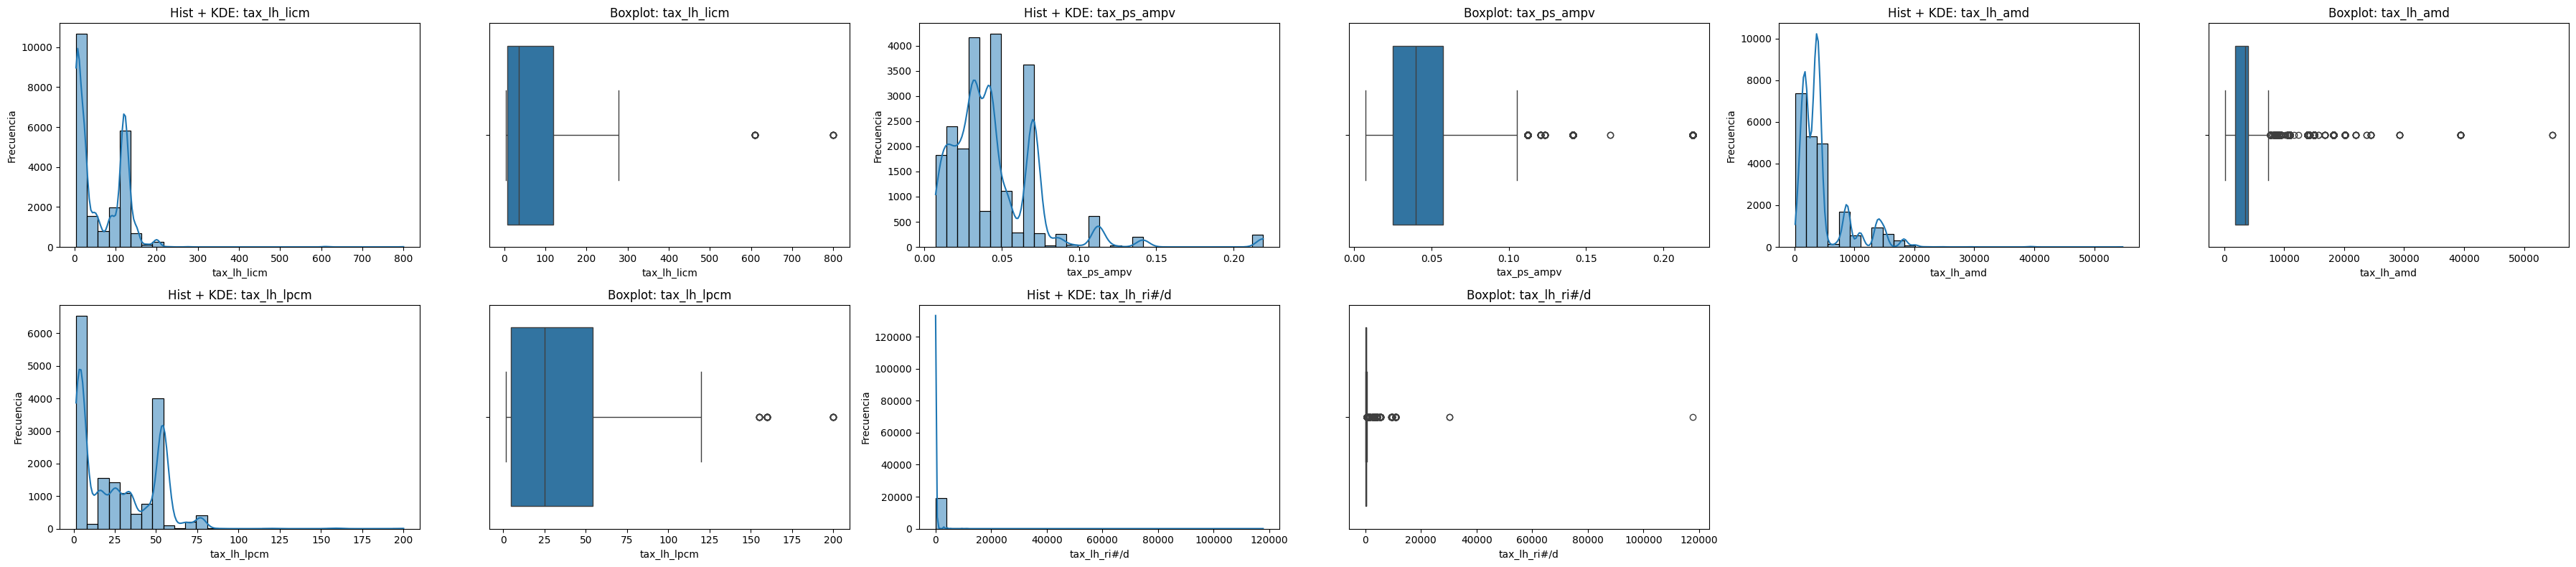

In [170]:
# Visualización
for familia, variables in grupos_variables.items():
    print(f"Visualizando grupo: {familia} con {len(variables)} variables")
    eda.plot_num_univar_grouped(df_modelo, variables, n_cols=3, bins=30)

#### Cierre del análisis univariante – Variables numéricas

Tras analizar individualmente las **39 variables numéricas** preseleccionadas, se establecieron las siguientes conclusiones clave para orientar los siguientes pasos del pipeline:

##### Observaciones generales

- La mayoría de variables presentan distribuciones **asimétricas o sesgadas a la derecha**, con outliers frecuentes.
- Algunas variables químicas (`chem_mordred_*`) y taxonómicas (`tax_*`) presentan rangos muy amplios o concentraciones extremas que podrían afectar modelos sensibles a la escala.
- Las variables `mol2vec` (embeddings moleculares) mostraron formas razonablemente estables y **no requieren transformaciones**.

##### Decisiones de preprocesado

- **Transformación logarítmica o raíz cuadrada** recomendada para ~15 variables con sesgo y outliers relevantes.
- **Escalado opcional** (MinMax o StandardScaler) aplicable a unas 13 variables, especialmente para modelos que lo requieren.
- **Binning o categorización** sugerido solo en 2 casos puntuales con distribuciones multimodales.
- Ninguna variable fue eliminada en esta fase, pero se detectaron **posibles redundancias** dentro de familias (`SRW`, `Xpc`, `MWC`, etc.) a revisar tras el análisis de correlaciones.

A partir de estas observaciones se avanza al análisis bivariante frente al target `result_conc1_mean_binary`, con el fin de evaluar el poder predictivo de cada variable y refinar la selección de atributos.

In [171]:
# Crear el DataFrame con variables numéricas a analizar + target
df_modelo[target] = y_train.copy()

print(df_modelo.shape)  # debería mostrar (n_filas, 40) -> 39 features + 1 target
df_modelo.columns.tolist()[-1]  # debería ser 'result_conc1_mean_binary'

(21981, 39)


'result_conc1_mean_binary'

### 5.1.2 Variables categoricas
[Indice](#indice)

In [172]:
# Selección de variables categóricas relevantes
vars_cat_analizar = [var for var in vars_analizar_ordenadas if var in vars_categoricas]
print(f"Número de variables categóricas a analizar: {len(vars_cat_analizar)}")

Número de variables categóricas a analizar: 6


In [173]:
# Añadirlas a df_modelo desde X_train_validadas
df_modelo = pd.concat([
    df_modelo,
    X_train_validadas[vars_cat_analizar]
], axis=1)

# Verificación
print(df_modelo.shape)
df_modelo[vars_cat_analizar].head()

(21981, 45)


tax_gs test_exposure_type test_organism_lifestage result_endpoint  \
1  Cyprinus_carpio                  S                      NR            LC50   
2  Cyprinus_carpio                  S                      NR            LC50   
4  Cyprinus_carpio                  S                      NR            LC50   
5  Cyprinus_carpio                  S                      NR            LC50   
6  Cyprinus_carpio                  S                      NR            LC50   

   tax_family tax_eco_migrate2  
1  Cyprinidae        migration  
2  Cyprinidae        migration  
4  Cyprinidae        migration  
5  Cyprinidae        migration  
6  Cyprinidae        migration

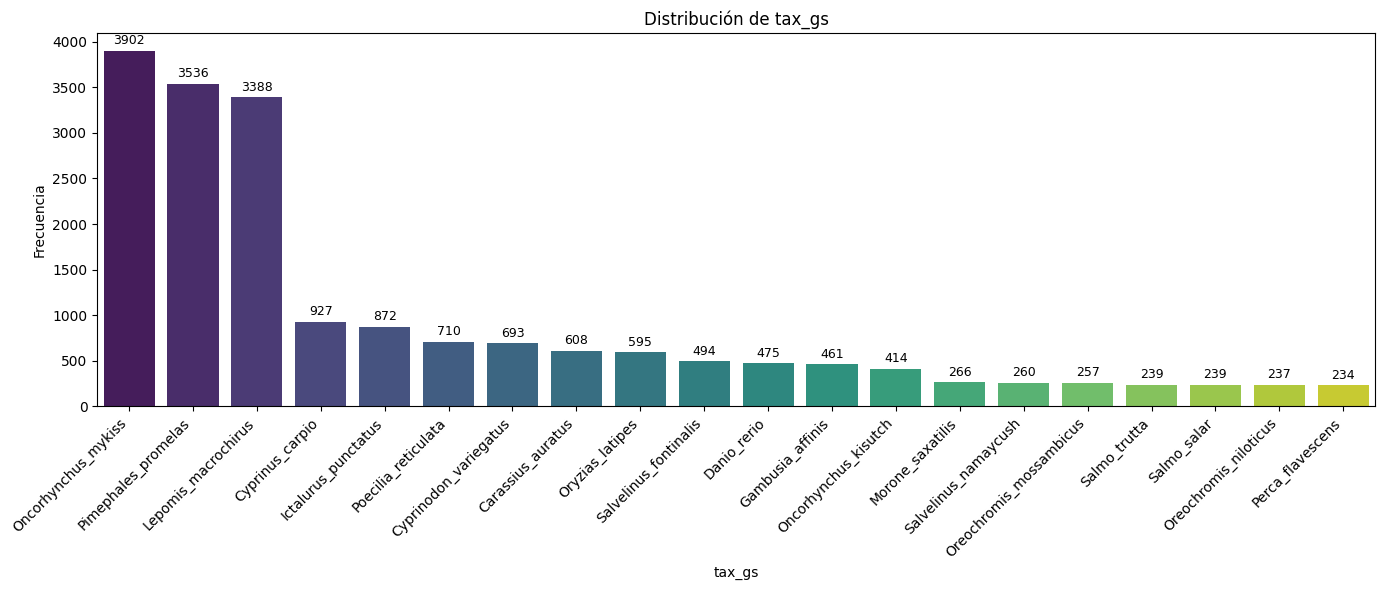

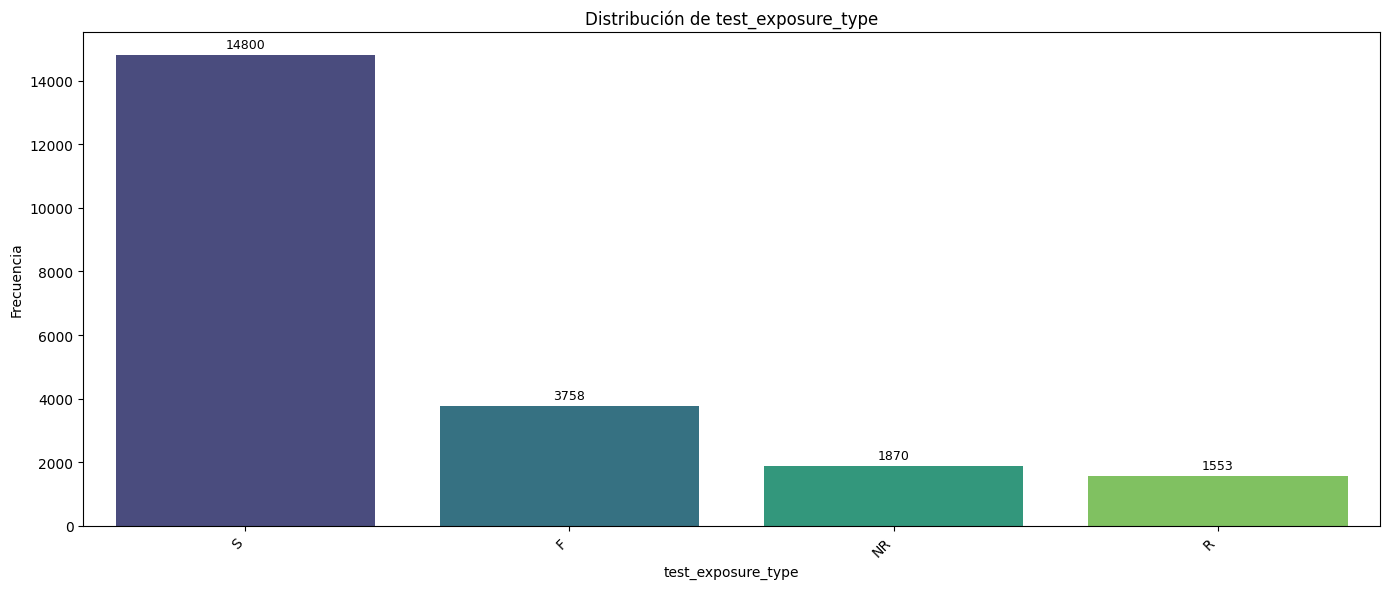

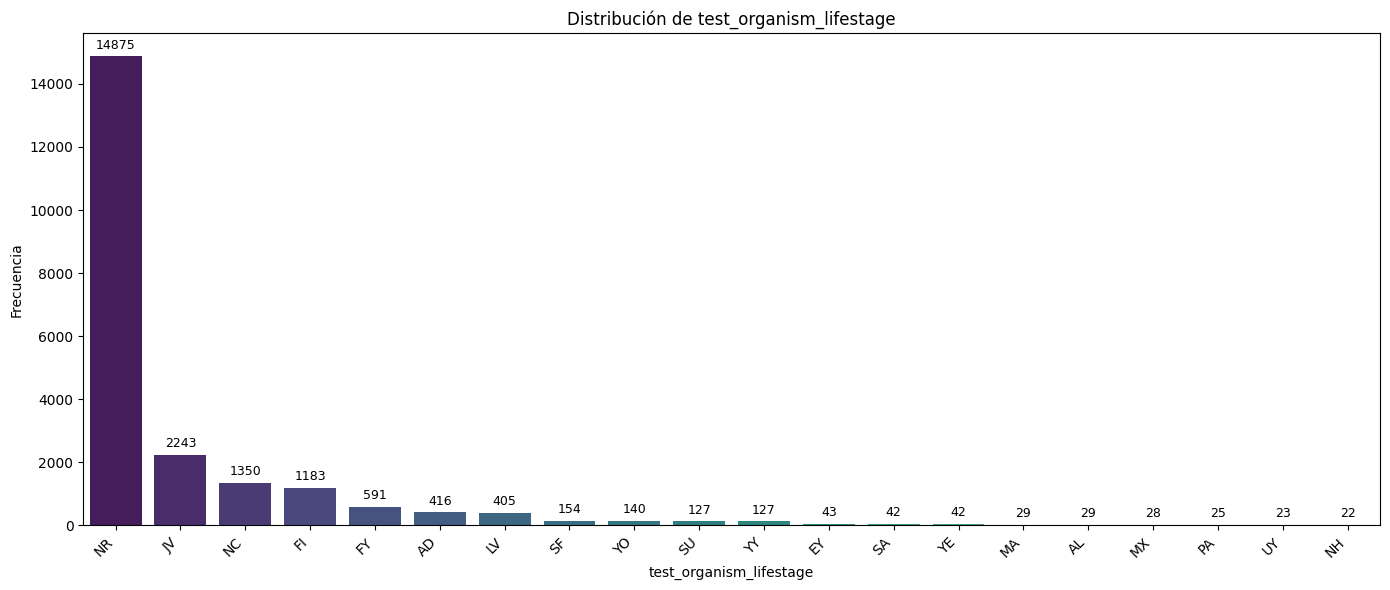

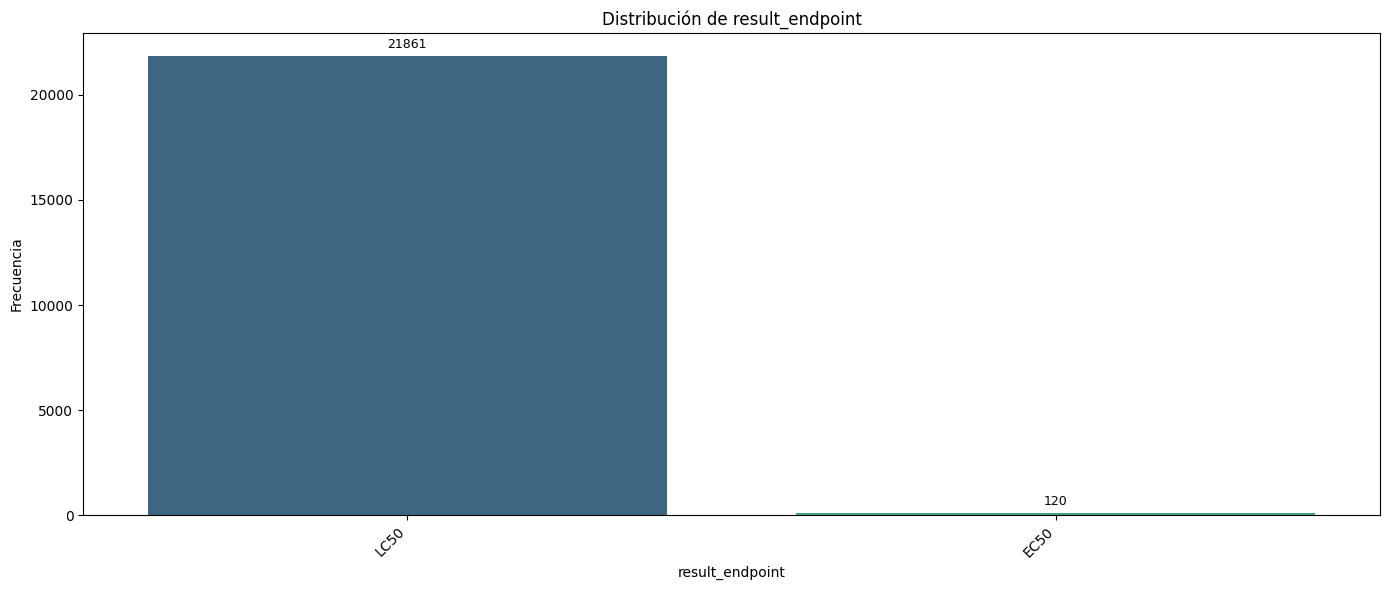

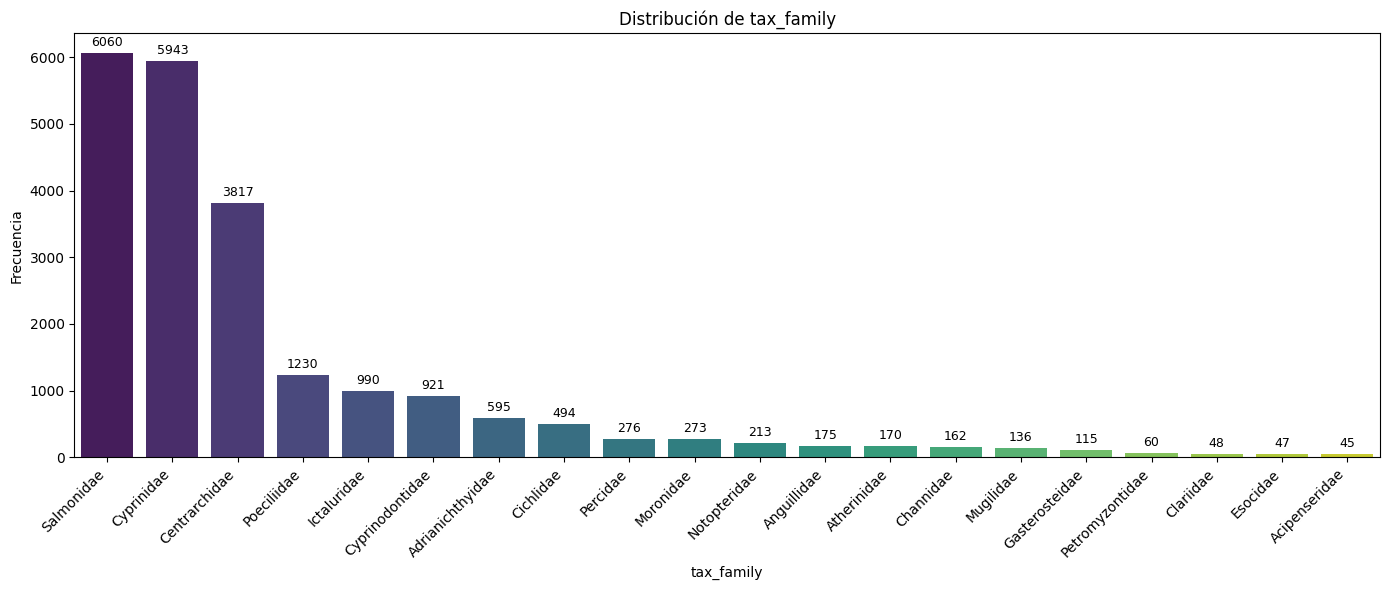

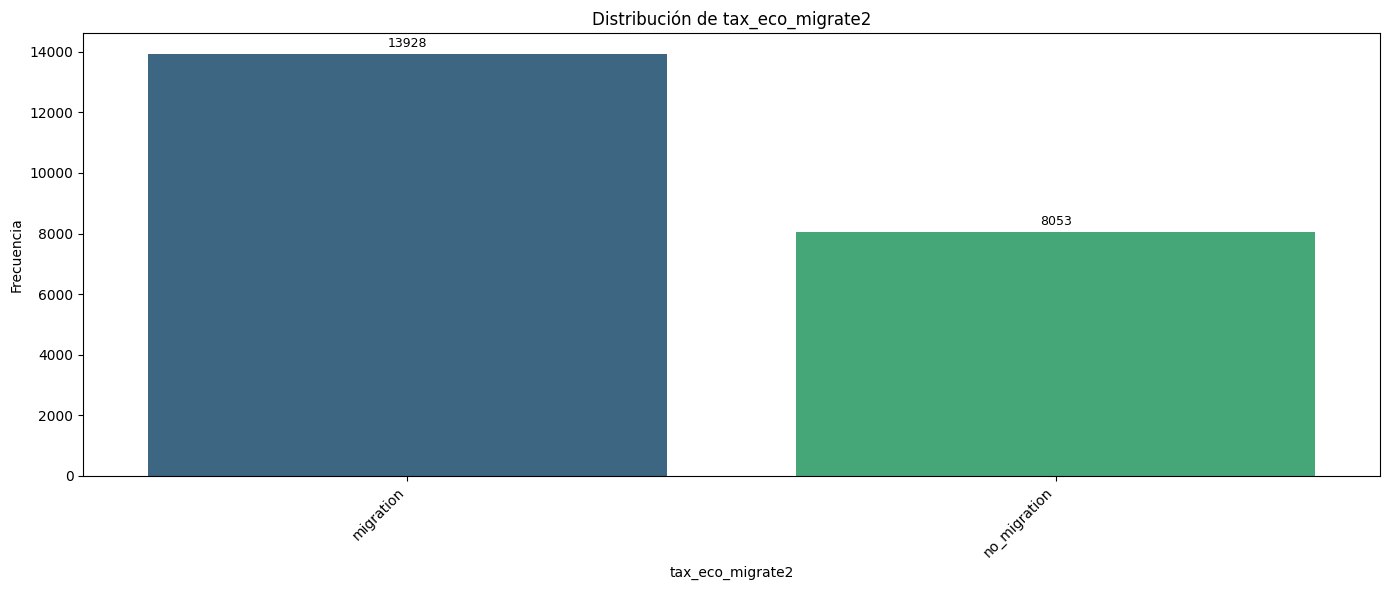

In [174]:
# Visualización univariante
eda.plot_cat_univar(X_train_validadas, vars=vars_cat_analizar, top=20, show_values=True)

## 5.2  **Analisis Bivariante**
[Indice](#indice)

### 5.2.1 Variables numericas vs. target

Tras el análisis univariante, se han clasificado las 39 variables numéricas en cinco familias funcionales en función de su naturaleza y origen:

| Familia         | Descripción                                                                 |
|-----------------|------------------------------------------------------------------------------|
| `chem_mordred`  | Descriptores moleculares clásicos calculados con Mordred                   |
| `chem_mol2vec`  | Embeddings vectoriales a partir de representaciones SMILES (`mol2vec`)     |
| `tax`           | Variables taxonómicas (distancias filogenéticas, diversidad, conservación) |
| `media`         | Condiciones experimentales  (pH, temperatura)                         |
| `result`        | Duración de los ensayos de toxicidad                                       |

Esta clasificación permite detectar patrones según el tipo de variable y organizar el análisis.  
El objetivo es evaluar su relación con el target binario `result_conc1_mean_binary` mediante:

- Visualización (violin/boxplots)
- Pruebas estadísticas (ANOVA, U Mann-Whitney)
- AUC

Esto facilitará la selección de variables informativas y el descarte de las irrelevantes.


>Colores:
    🔴 cumple AUC y p-valor
    🟡 solo p-valor significativo
    🔵 solo AUC alto
    ⚫ no destaca


 Analizando grupo: media


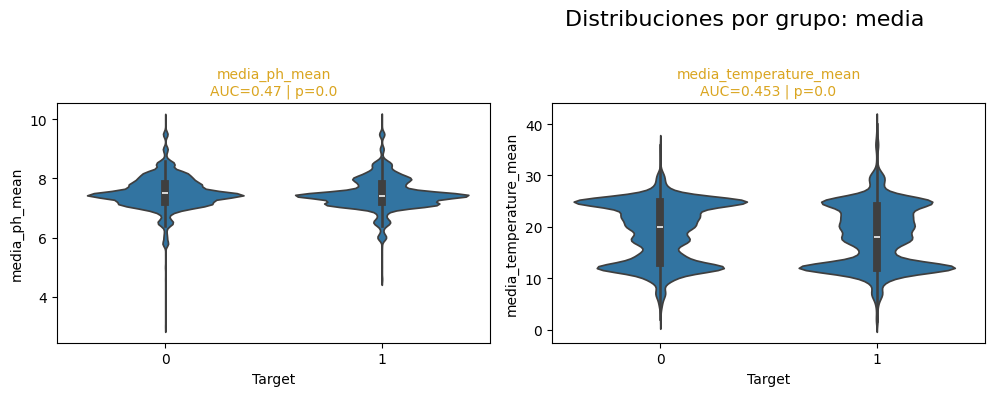


 Analizando grupo: mordred


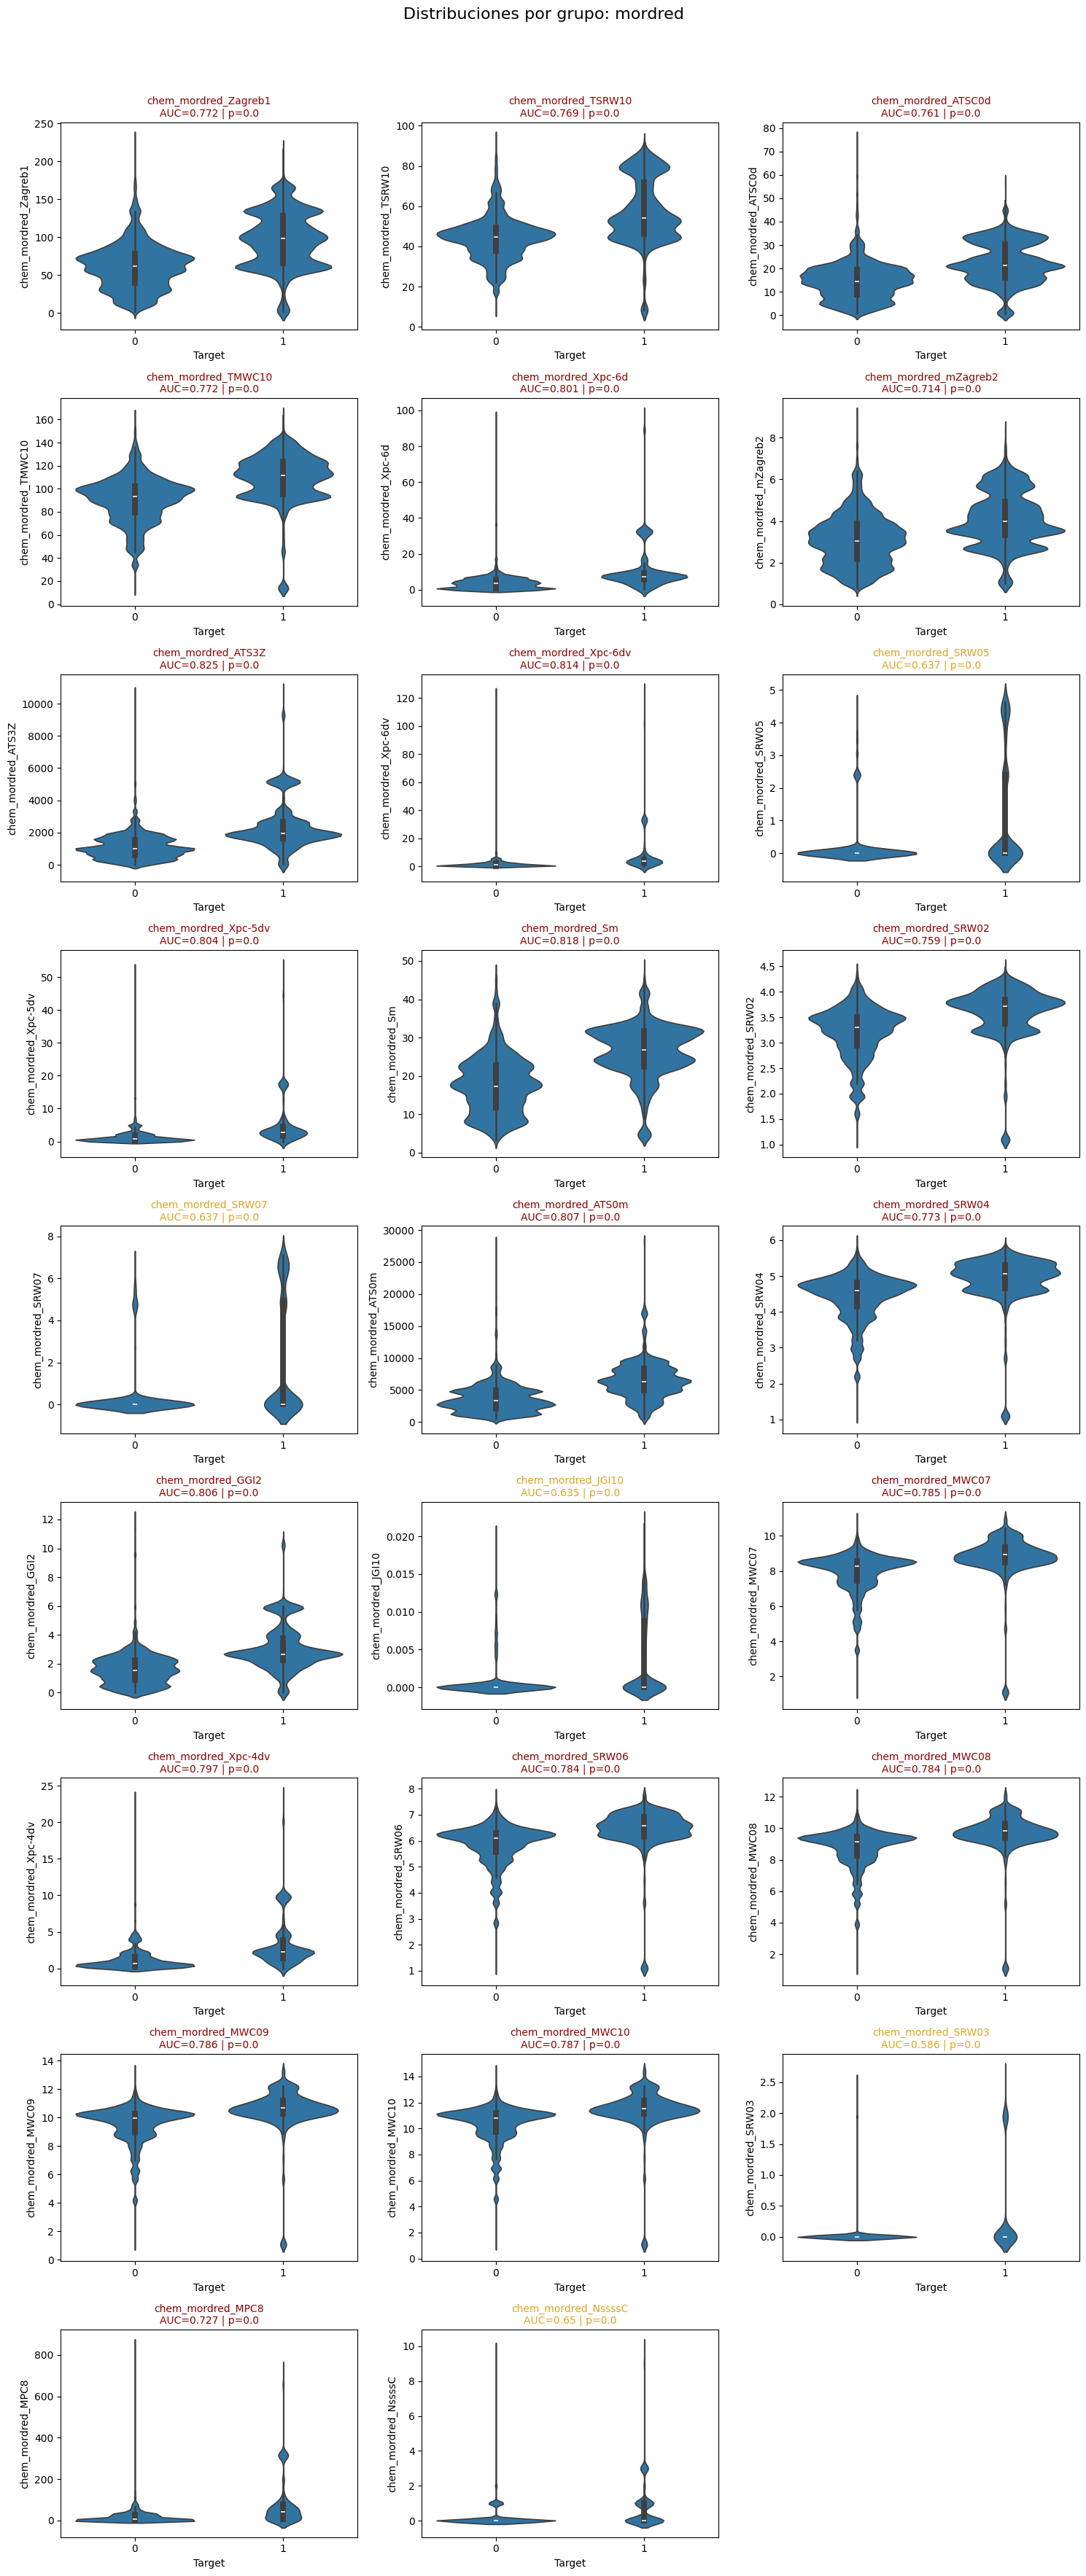


 Analizando grupo: result


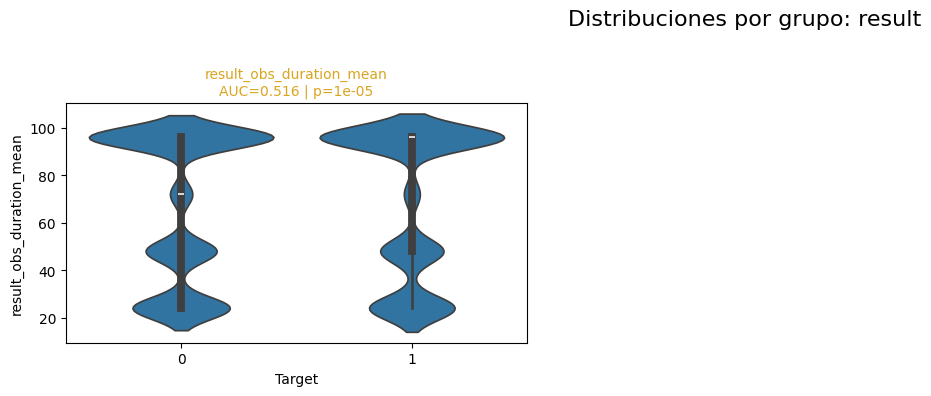


 Analizando grupo: mol2vec


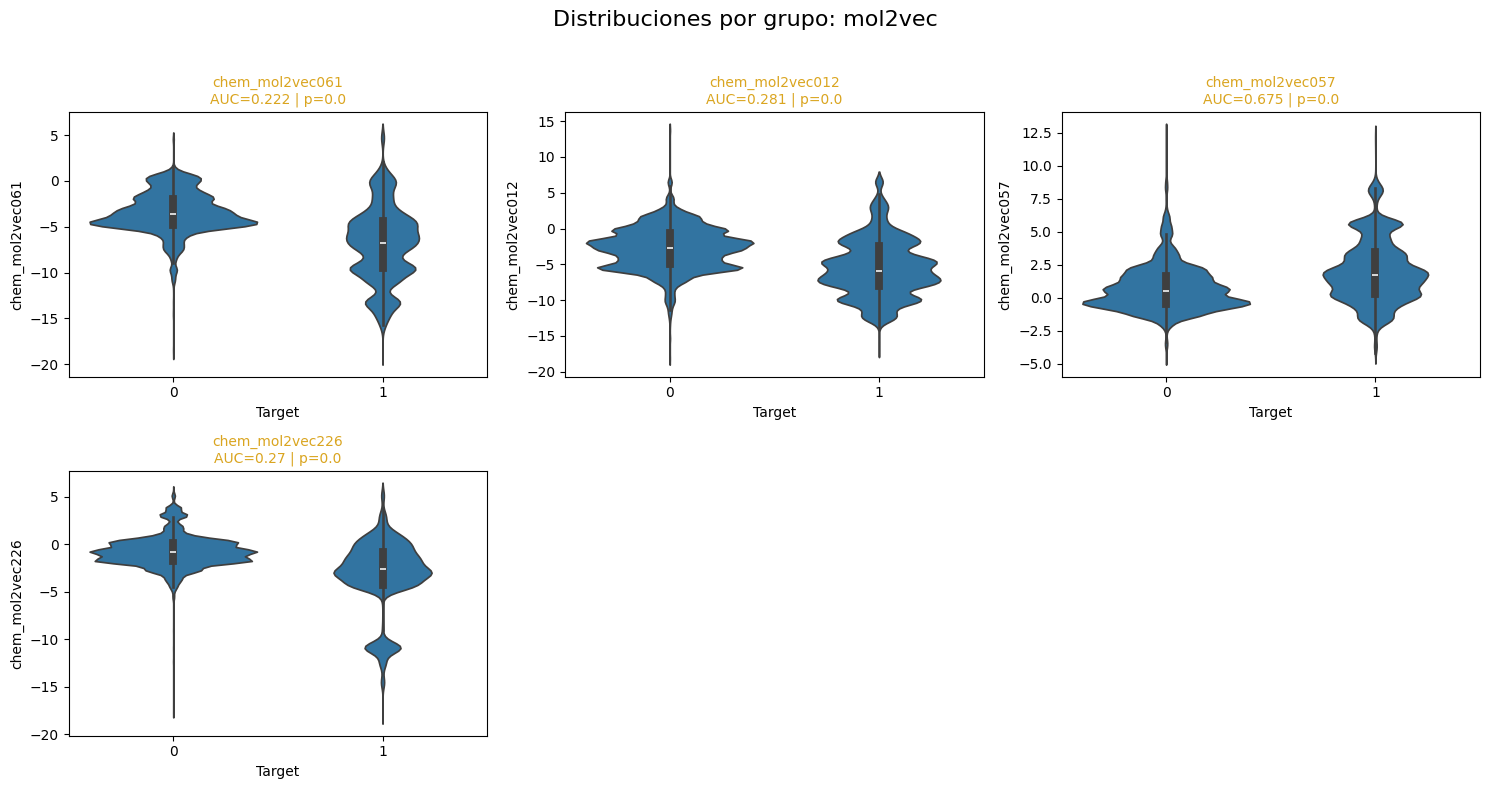


 Analizando grupo: tax


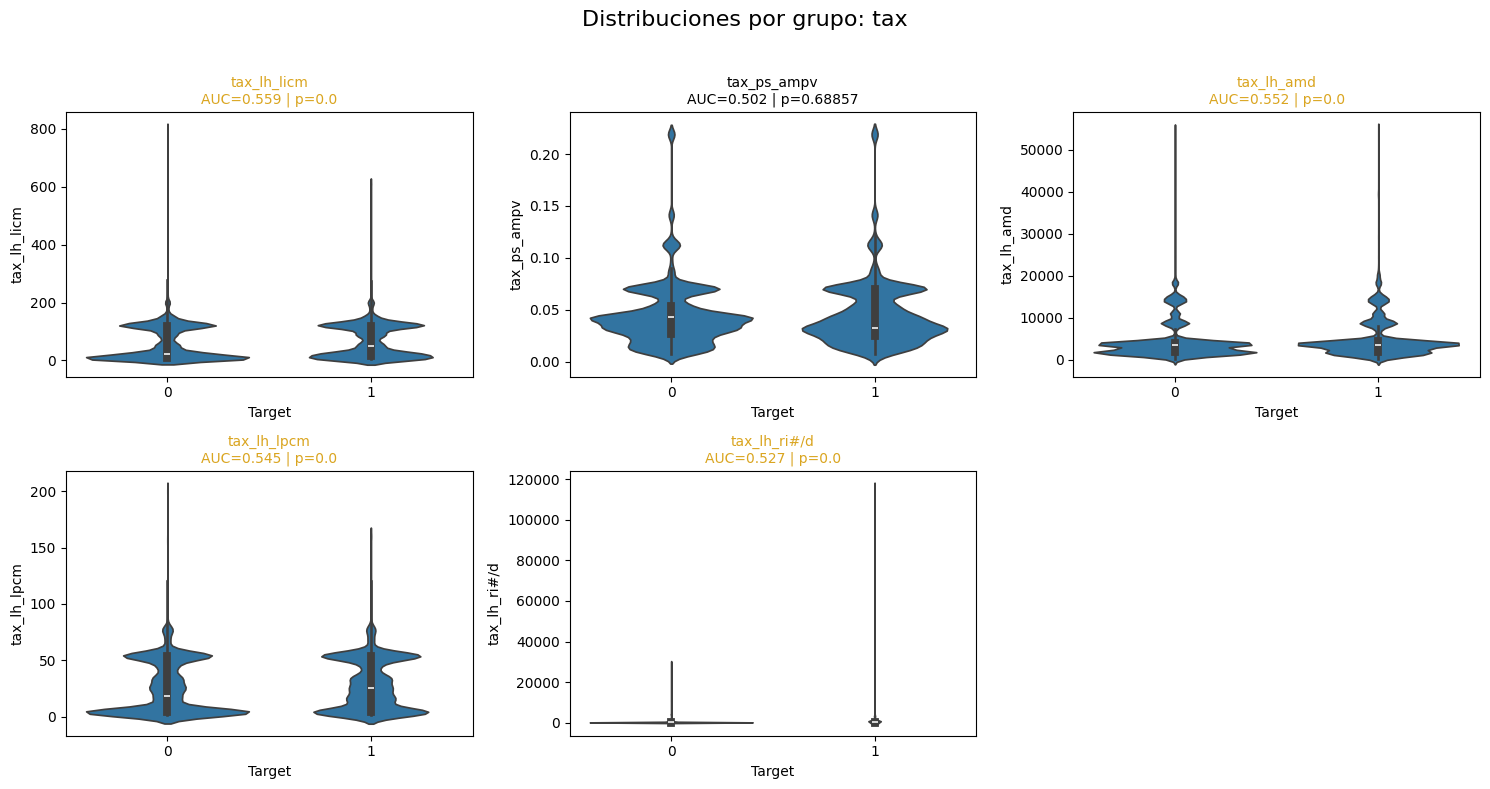

In [175]:
# Inicializar un DataFrame vacío para acumular resultados
resultados_bivariantes = pd.DataFrame()

# Iterar por cada grupo (familia)
for familia, variables in grupos_variables.items():
    print(f"\n Analizando grupo: {familia}")
    
    # 1. Análisis bivariante con métricas
    resultados = eda.analisis_bivariante_grupo(
        df=df_modelo,
        variables=variables,
        target="result_conc1_mean_binary",
        group_name=familia, 
        plot=False  # desactiva los plots individuales
    )
    
    #2. Acumular resultados
    resultados_bivariantes = pd.concat([resultados_bivariantes, resultados], ignore_index=True)
    
    # 3. Mostrar violinplots agrupados con AUC y p-valor
    eda.plot_violin_grouped(
        df=df_modelo,
        variables=variables,
        target="result_conc1_mean_binary",
        group_name=familia,
        df_resultados=resultados,
        auc_threshold=0.7,            
        pval_threshold=0.05
)

#### Conclusiones preliminares del análisis bivariante

Análisis realizado sobre 39 variables frente al target binario (`result_conc1_mean_binary`), agrupadas por funcionalidad. Evaluación basada en:  
- AUC (Area Under Curve)
- p-valor de test estadístico
- Forma de la distribución (violin plots)

| Grupo         | Variables Evaluadas                                                                                     | Variables a Conservar                                           | Variables a Descartar                                                                                  | Conclusión                                                                                                                                       |
|---------------|----------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|
| `media`       | `media_ph_mean`, `media_temperature_mean`                                                               | –                                                                | `media_ph_mean`, `media_temperature_mean`                                                               | No aportan señal predictiva. AUC < 0.5 pese a p-valor significativo. → **Descartar**                                                             |
| `mordred`     | Descriptores moleculares (39 vars analizadas)                                                           | `Zagreb1`, `TSRW10`, `ATSC0d`, `TMWC10`, `mZagreb2`, `ATS3Z`, `Xpc-6dv`, `Xpc-5dv`, `Xpc-6d`, `Sm`, `SRW02`, `SRW04`, `SRW06`, `MWC07`, `MWC08`, `MWC09`, `MWC10`, `ATS0m`, `GGI2`, `MPC8` | `SRW03`, `SRW05`, `SRW07`, `JGI10`, `NssssC`                                                             | Grupo más informativo. Múltiples variables con AUC > 0.75 y buena separación. Se recomienda revisar colinealidad (ej. MWC*, Xpc*).               |
| `result`      | `result_obs_duration_mean`                                                                              | –                                                                | `result_obs_duration_mean`                                                                              | AUC ≈ 0.51 y sin diferencia visual clara. Variable irrelevante → **Descartar**                                                                   |
| `mol2vec`     | `mol2vec057`, `mol2vec012`, `mol2vec061`, `mol2vec226`                                                  | `mol2vec057`                                                    | `mol2vec012`, `mol2vec061`, `mol2vec226`                                                                | Solo `mol2vec057` muestra una separación moderada (AUC ≈ 0.675). Resto no informativas → **Conservar solo `mol2vec057`**                         |
| `tax`         | `tax_lh_licm`, `tax_lh_amd`, `tax_lh_lpcm`, `tax_lh_ri#/d`, `tax_ps_ampv`, `tax_ps_ampkap`              | –                                                                | Todas                                                                                                   | AUC entre 0.50 y 0.56 sin separación útil. No aportan valor predictivo → **Descartar**                                                           |


#### Subconjunto de variables contextuales retenidas

Aunque variables como `tax_*`, `media_*` y `result_*` no son predictoras fuertes por sí solas (AUC bajo), se conservarán algunas por su posible valor contextual (e.g., especie, temperatura, pH), especialmente en tareas con datos diversos. Su utilidad se evaluará en etapas posteriores mediante validación cruzada.


#### Colinealidad
[Indice](#indice)

Una vez completado el análisis univariante y bivariante, se procede a revisar la colinealidad entre las variables numéricas seleccionadas. La colinealidad (o multicolinealidad) se refiere a la presencia de fuertes correlaciones entre pares de variables, lo que puede provocar inestabilidad en los modelos de machine learning, especialmente aquellos basados en coeficientes (e.g., regresión logística).

En este análisis:

- Se calcula la matriz de correlación de Pearson entre todas las variables numéricas del dataset modelable (`df_modelo`).
- Se identifican pares con correlación absoluta mayor o igual a `0.9`.
- Para cada par correlacionado, se sugiere eliminar la variable menos útil según el criterio de mayor `AUC univariado`, obtenido del análisis bivariante.

Este procedimiento permite reducir la redundancia informativa y prevenir sobreajuste, conservando aquellas variables con mayor poder predictivo individual.

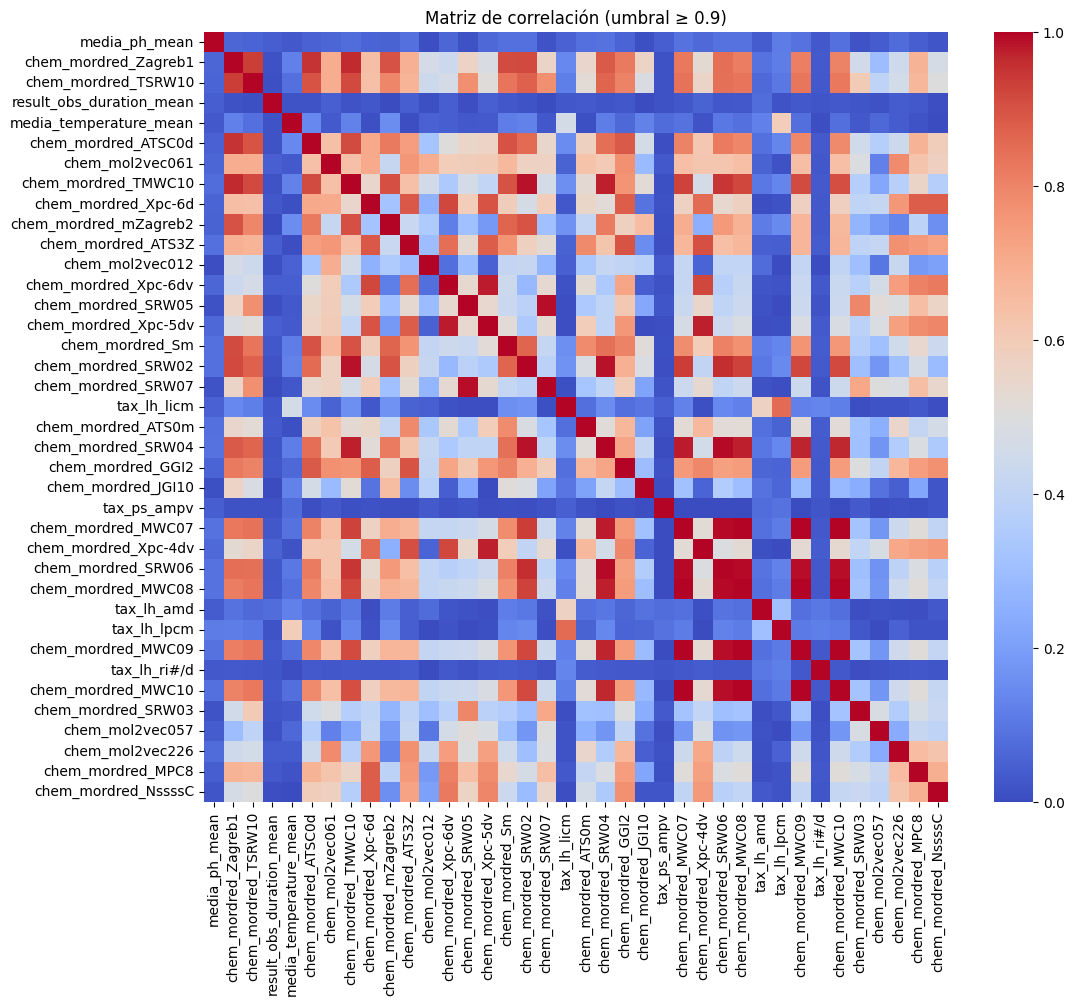

Variable 1             Variable 2  Correlación
42    chem_mordred_MWC09     chem_mordred_MWC10     0.999765
40    chem_mordred_MWC08     chem_mordred_MWC09     0.999753
34    chem_mordred_MWC07     chem_mordred_MWC08     0.999597
41    chem_mordred_MWC08     chem_mordred_MWC10     0.999518
35    chem_mordred_MWC07     chem_mordred_MWC09     0.999289
36    chem_mordred_MWC07     chem_mordred_MWC10     0.998443
33    chem_mordred_MWC07     chem_mordred_SRW06     0.994586
37    chem_mordred_SRW06     chem_mordred_MWC08     0.993379
29    chem_mordred_SRW04     chem_mordred_SRW06     0.992328
38    chem_mordred_SRW06     chem_mordred_MWC09     0.991040
39    chem_mordred_SRW06     chem_mordred_MWC10     0.989778
20    chem_mordred_SRW05     chem_mordred_SRW07     0.988867
9    chem_mordred_TMWC10     chem_mordred_SRW02     0.986253
22    chem_mordred_SRW02     chem_mordred_SRW04     0.985305
18  chem_mordred_Xpc-6dv   chem_mordred_Xpc-5dv     0.980034
28    chem_mordred_SRW04     chem_mordred_MWC07     0.978656
30    chem_mordred_SRW04     chem_mordred_MWC08     0.974767
10   chem_mordred_TMWC10     chem_mordred_SRW04     0.973513
21  chem_mordred_Xpc-5dv   chem_mordred_Xpc-4dv     0.972801
31    chem_mordred_SRW04     chem_mordred_MWC09     0.970699
32    chem_mordred_SRW04     chem_mordred_MWC10     0.967576
2   chem_mordred_Zagreb1    chem_mordred_TMWC10     0.962995
24    chem_mordred_SRW02     chem_mordred_SRW06     0.957353
1   chem_mordred_Zagreb1    chem_mordred_ATSC0d     0.951804
12   chem_mordred_TMWC10     chem_mordred_SRW06     0.946460
0   chem_mordred_Zagreb1    chem_mordred_TSRW10     0.935959
23    chem_mordred_SRW02     chem_mordred_MWC07     0.934575
25    chem_mordred_SRW02     chem_mordred_MWC08     0.926627
11   chem_mordred_TMWC10     chem_mordred_MWC07     0.925801
26    chem_mordred_SRW02     chem_mordred_MWC09     0.920869
19  chem_mordred_Xpc-6dv   chem_mordred_Xpc-4dv     0.919566
16   chem_mordred_Xpc-6d   chem_mordred_Xpc-6dv     0.918600
13   chem_mordred_TMWC10     chem_mordred_MWC08     0.918327
5    chem_mordred_TSRW10    chem_mordred_TMWC10     0.917005
4   chem_mordred_Zagreb1     chem_mordred_SRW02     0.914895
27    chem_mordred_SRW02     chem_mordred_MWC10     0.914858
14   chem_mordred_TMWC10     chem_mordred_MWC09     0.912556
6    chem_mordred_ATSC0d    chem_mordred_TMWC10     0.911909
3   chem_mordred_Zagreb1        chem_mordred_Sm     0.911480
15   chem_mordred_TMWC10     chem_mordred_MWC10     0.906939
17    chem_mordred_ATS3Z   chem_mordred_Xpc-4dv     0.906014
7    chem_mordred_TMWC10  chem_mordred_mZagreb2     0.905345
8    chem_mordred_TMWC10        chem_mordred_Sm     0.900600

In [176]:
# Ejecutar análisis de colinealidad
df_pares_colineales = eda.analizar_colinealidad(
    df=df_modelo,
    variables=vars_num_analizar,
    umbral=0.9,
    mostrar_heatmap=True
)

# Mostrar resultados si hay
if df_pares_colineales.empty:
    print("No se encontraron pares colineales con ese umbral.")
else:
    display(df_pares_colineales)

In [177]:
# Generar sugerencias para limpieza de colinealidad
df_log_colinealidad, variables_a_eliminar = eda.sugerir_variables_a_eliminar_opt(
    df_pares_correlados=df_pares_colineales,
    df_resultados=resultados_bivariantes,
    criterio="AUC_univariado"
)

# Visualizar log explicativo
display(df_log_colinealidad)

# Lista final única
print("Variables a eliminar:", variables_a_eliminar)

Variable_1             Variable_2  Correlación  \
0     chem_mordred_MWC09     chem_mordred_MWC10     0.999765   
1     chem_mordred_MWC08     chem_mordred_MWC09     0.999753   
2     chem_mordred_MWC07     chem_mordred_MWC09     0.999289   
3     chem_mordred_MWC07     chem_mordred_SRW06     0.994586   
4     chem_mordred_SRW04     chem_mordred_SRW06     0.992328   
5     chem_mordred_SRW05     chem_mordred_SRW07     0.988867   
6    chem_mordred_TMWC10     chem_mordred_SRW02     0.986253   
7   chem_mordred_Xpc-6dv   chem_mordred_Xpc-5dv     0.980034   
8    chem_mordred_TMWC10     chem_mordred_SRW04     0.973513   
9   chem_mordred_Xpc-5dv   chem_mordred_Xpc-4dv     0.972801   
10  chem_mordred_Zagreb1    chem_mordred_ATSC0d     0.951804   
11  chem_mordred_Zagreb1    chem_mordred_TSRW10     0.935959   
12   chem_mordred_Xpc-6d   chem_mordred_Xpc-6dv     0.918600   
13  chem_mordred_Zagreb1        chem_mordred_Sm     0.911480   
14   chem_mordred_TMWC10  chem_mordred_mZagreb2     0.905345   

    AUC_univariado_chem_mordred_MWC09  AUC_univariado_chem_mordred_MWC10  \
0                               0.786                              0.787   
1                               0.786                                NaN   
2                               0.786                                NaN   
3                                 NaN                                NaN   
4                                 NaN                                NaN   
5                                 NaN                                NaN   
6                                 NaN                                NaN   
7                                 NaN                                NaN   
8                                 NaN                                NaN   
9                                 NaN                                NaN   
10                                NaN                                NaN   
11                                NaN                                NaN   
12                                NaN                                NaN   
13                                NaN                                NaN   
14                                NaN                                NaN   

               A_eliminar  AUC_univariado_chem_mordred_MWC08  \
0      chem_mordred_MWC09                                NaN   
1      chem_mordred_MWC08                              0.784   
2      chem_mordred_MWC07                                NaN   
3      chem_mordred_SRW06                                NaN   
4      chem_mordred_SRW04                                NaN   
5      chem_mordred_SRW07                                NaN   
6      chem_mordred_SRW02                                NaN   
7    chem_mordred_Xpc-5dv                                NaN   
8     chem_mordred_TMWC10                                NaN   
9    chem_mordred_Xpc-4dv                                NaN   
10    chem_mordred_ATSC0d                                NaN   
11    chem_mordred_TSRW10                                NaN   
12    chem_mordred_Xpc-6d                                NaN   
13   chem_mordred_Zagreb1                                NaN   
14  chem_mordred_mZagreb2                                NaN   

    AUC_univariado_chem_mordred_MWC07  AUC_univariado_chem_mordred_SRW06  \
0                                 NaN                                NaN   
1                                 NaN                                NaN   
2                               0.785                                NaN   
3                               0.785                              0.784   
4                                 NaN                              0.784   
5                                 NaN                                NaN   
6                                 NaN                                NaN   
7                                 NaN                                NaN   
8                                 NaN                          

Variables a eliminar: ['chem_mordred_SRW02', 'chem_mordred_Xpc-5dv', 'chem_mordred_Xpc-4dv', 'chem_mordred_mZagreb2', 'chem_mordred_MWC08', 'chem_mordred_SRW04', 'chem_mordred_TMWC10', 'chem_mordred_SRW07', 'chem_mordred_ATSC0d', 'chem_mordred_Xpc-6d', 'chem_mordred_TSRW10', 'chem_mordred_MWC07', 'chem_mordred_SRW06', 'chem_mordred_Zagreb1', 'chem_mordred_MWC09']


### 5.2.2 Variables categoricas vs Target

In [178]:
# Verificación de variables categóricas en X_train_validadas

# Detectar automáticamente columnas categóricas (tipo object o category)
vars_categoricas_detectadas = X_train_validadas.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

# Mostrar resultado
print("Variables categóricas detectadas:")
print(vars_categoricas_detectadas)

Variables categóricas detectadas:
['test_cas', 'test_exposure_type', 'test_control_type', 'test_media_type', 'test_application_freq_unit', 'test_organism_lifestage', 'result_endpoint', 'tax_class', 'tax_order', 'tax_family', 'tax_gs', 'tax_eco_climate', 'tax_eco_ecozone', 'tax_eco_food', 'tax_eco_migrate5', 'tax_eco_migrate2', 'chem_sf', 'chem_pcp_fp', 'chem_MACCS_fp', 'chem_Morgan_fp', 'chem_ToxPrint_fp']


In [179]:
vars_cat_analizar = [var for var in vars_categoricas_detectadas if var in vars_analizar_ordenadas]

print("\n Variables categóricas seleccionadas para análisis:")
print(vars_cat_analizar)


 Variables categóricas seleccionadas para análisis:
['test_exposure_type', 'test_organism_lifestage', 'result_endpoint', 'tax_family', 'tax_gs', 'tax_eco_migrate2']


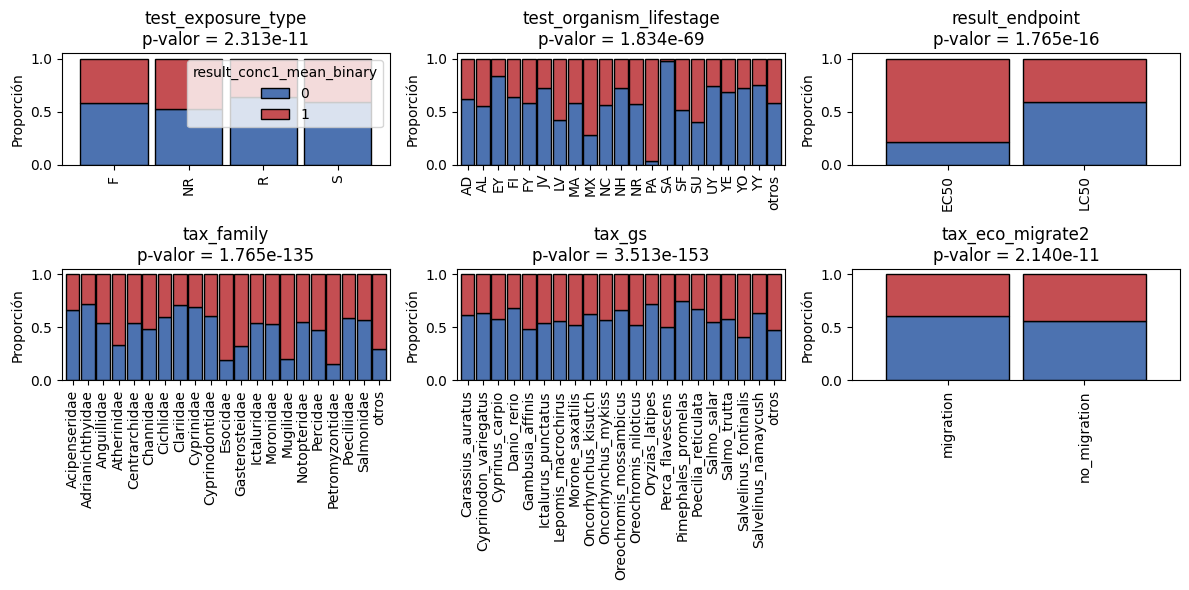

Variable        p_valor
0                   tax_gs  3.512564e-153
1               tax_family  1.764993e-135
2  test_organism_lifestage   1.833949e-69
3          result_endpoint   1.765422e-16
4         tax_eco_migrate2   2.140495e-11
5       test_exposure_type   2.313329e-11

In [180]:
resultados_cat = eda.plot_cat_grouped(
    df=df_modelo,
    variables=vars_cat_analizar,
    target="result_conc1_mean_binary",
    n_cols=3,
    figsize_per_plot=(4, 3),
    max_categories=20  
)
display(resultados_cat)

#### Selección final de variables categóricas para modelado

Tras analizar cada variable categórica frente al target `result_conc1_mean_binary` mediante test chi-cuadrado, visualizaciones proporcionales y distribución univariante, se aplicaron los siguientes criterios de selección:

- **Significancia estadística** (`p < 0.05`)
- **Discriminación visual clara entre clases**
- **Cardinalidad razonable o agrupada**
- **No redundancia con otras variables**

#### Variables seleccionadas para el modelo

| Variable                 | Seleccionada | Justificación                                                                 |
|--------------------------|--------------|-------------------------------------------------------------------------------|
| `test_exposure_type`     | Sí        | Informativa, altamente significativa y con pocas categorías                  |
| `test_organism_lifestage`| Sí        | Significativa; se considerará simplificación si hay ruido                    |
| `result_endpoint`        | Sí        | Binaria, discriminativa y clara                                              |
| `tax_family`             | Sí        | Resume bien la taxonomía con cardinalidad manejable                          |
| `tax_eco_migrate2`       | Sí        | Binaria, con asociación clara con el target                                  |
| `tax_gs`                 | **No**        | Alta cardinalidad, redundante con `tax_family`, riesgo de sobreajuste       |


## 5.3 Guardado y definicion final de features
[Indice](#indice)

In [181]:
# 1. Features preseleccionadas (predictivas)
features_preseleccionadas = [
    # Descriptores moleculares y embeddings
    "chem_mordred_Zagreb1",
    "chem_mordred_TSRW10",
    "chem_mordred_ATSC0d",
    "chem_mordred_TMWC10",
    "chem_mordred_mZagreb2",
    "chem_mordred_ATS3Z",        
    "chem_mordred_Xpc-6dv",
    "chem_mordred_Xpc-5dv",
    "chem_mordred_Xpc-6d",
    "chem_mordred_Sm",
    "chem_mordred_SRW02",
    "chem_mordred_SRW04",
    "chem_mordred_SRW06",
    "chem_mordred_MWC07",
    "chem_mordred_MWC08",
    "chem_mordred_MWC09",
    "chem_mordred_MWC10",
    "chem_mordred_ATS0m",
    "chem_mordred_GGI2",
    "chem_mordred_MPC8",        
    "chem_mol2vec057",

    # Variables categóricas relevantes
    "test_exposure_type",
    "test_organism_lifestage",
    "result_endpoint",
    "tax_family",
    "tax_eco_migrate2"
]


# 2. Features contextuales (no predictivas directas, pero útiles)
features_contextuales = [
    "media_ph_mean", "media_temperature_mean",      # condiciones ambientales
    "tax_lh_licm", "tax_lh_amd",                     # taxonómicas/filogenéticas
    "tax_lh_lpcm", "tax_lh_ri#/d"                    # taxonómicas/filogenéticas
]

# 3. Crear DataFrame con etiquetas
df_features_finales = pd.DataFrame({
    "Variable": features_preseleccionadas + features_contextuales,
    "Tipo": ["predictiva"] * len(features_preseleccionadas) + ["contextual"] * len(features_contextuales)
})

# 4. Mostrar resumen
print(f"Total de variables: {len(df_features_finales)}")
display(df_features_finales)


Total de variables: 32


Variable        Tipo
0      chem_mordred_Zagreb1  predictiva
1       chem_mordred_TSRW10  predictiva
2       chem_mordred_ATSC0d  predictiva
3       chem_mordred_TMWC10  predictiva
4     chem_mordred_mZagreb2  predictiva
5        chem_mordred_ATS3Z  predictiva
6      chem_mordred_Xpc-6dv  predictiva
7      chem_mordred_Xpc-5dv  predictiva
8       chem_mordred_Xpc-6d  predictiva
9           chem_mordred_Sm  predictiva
10       chem_mordred_SRW02  predictiva
11       chem_mordred_SRW04  predictiva
12       chem_mordred_SRW06  predictiva
13       chem_mordred_MWC07  predictiva
14       chem_mordred_MWC08  predictiva
15       chem_mordred_MWC09  predictiva
16       chem_mordred_MWC10  predictiva
17       chem_mordred_ATS0m  predictiva
18        chem_mordred_GGI2  predictiva
19        chem_mordred_MPC8  predictiva
20          chem_mol2vec057  predictiva
21       test_exposure_type  predictiva
22  test_organism_lifestage  predictiva
23          result_endpoint  predictiva
24               tax_family  predictiva
25         tax_eco_migrate2  predictiva
26            media_ph_mean  contextual
27   media_temperature_mean  contextual
28              tax_lh_licm  contextual
29               tax_lh_amd  contextual
30              tax_lh_lpcm  contextual
31             tax_lh_ri#/d  contextual

### Definición de features preseleccionadas

#### **Variables predictivas**

| Variable                      | Tipo       | Categoría   | Definición ecotoxicológica relevante                                                                 |
|------------------------------|------------|-------------|-------------------------------------------------------------------------------------------------------|
| chem_mordred_*               | Predictiva | Numérica    | Descriptores moleculares calculados automáticamente (Mordred); codifican estructura y propiedades fisicoquímicas de la molécula. Pueden incluir conectividad, masa, electronegatividad, etc. |
| chem_mol2vec057              | Predictiva | Numérica    | Vector embedding generado por Mol2vec; representa la estructura química como vector en espacio latente, útil para capturar patrones moleculares complejos. |
| test_exposure_type           | Predictiva | Categórica  | Tipo de exposición aplicada en el experimento (estática, flujo continuo, renovación, etc.); influye en la biodisponibilidad del tóxico. |
| test_organism_lifestage      | Predictiva | Categórica  | Etapa del ciclo de vida del organismo durante el test (larva, juvenil, adulto); la sensibilidad a tóxicos varía según el desarrollo. |
| result_endpoint              | Predictiva | Categórica  | Tipo de medida toxicológica empleada (e.g., EC50, LC50); define el tipo de efecto agudo medido: mortalidad o inhibición. |
| tax_family                   | Predictiva | Categórica  | Familia taxonómica del organismo usado en el test; refleja similitudes evolutivas y fisiológicas que afectan su sensibilidad. |
| tax_eco_migrate2             | Predictiva | Categórica  | Comportamiento migratorio del organismo (migratorio vs. sedentario); puede afectar su exposición ambiental real a tóxicos. |

#### **Variables contextuales**

| Variable                      | Tipo        | Categoría   | Definición ecotoxicológica relevante                                                                  |
|------------------------------|-------------|-------------|--------------------------------------------------------------------------------------------------------|
| media_ph_mean                | Contextual  | Numérica    | Valor medio del pH durante el experimento; el pH puede alterar la toxicidad efectiva de muchas sustancias químicas. |
| media_temperature_mean       | Contextual  | Numérica    | Temperatura media del agua; influye en la toxicocinética y toxicodinámica de las sustancias en los peces. |
| tax_lh_licm                  | Contextual  | Numérica    | Descriptor del historial de vida relacionado con longevidad, tamaño corporal, maduración (Life History Traits). |
| tax_lh_amd                   | Contextual  | Numérica    | Edad media a la madurez del organismo; afecta su resiliencia poblacional y sensibilidad ecotoxicológica. |
| tax_lh_lpcm                  | Contextual  | Numérica    | Longitud promedio corporal máxima del organismo; puede relacionarse con su capacidad de acumulación de tóxicos. |
| tax_lh_ri#/d                 | Contextual  | Numérica    | Ritmo reproductivo estimado (número de individuos por día); refleja la velocidad de renovación poblacional. |



> Para más detalles, visitar `03_EDA_Uni_Bivariante.ipynb`.

---

# 6 Preparacion del preprocesado y definicion del pipeline
[Indice](#indice)

In [182]:
# Filtro de features finales
features_finales = df_features_finales['Variable'].tolist()
X_train = X_train[features_finales].copy()

# Filtrar solo las que tienen tipo "predictiva"
vars_predictivas = df_features_finales[df_features_finales["Tipo"] == "predictiva"]["Variable"].tolist()

# Verificar
print(f"Variables predictivas ({len(vars_predictivas)}):")
print(vars_predictivas)

Variables predictivas (26):
['chem_mordred_Zagreb1', 'chem_mordred_TSRW10', 'chem_mordred_ATSC0d', 'chem_mordred_TMWC10', 'chem_mordred_mZagreb2', 'chem_mordred_ATS3Z', 'chem_mordred_Xpc-6dv', 'chem_mordred_Xpc-5dv', 'chem_mordred_Xpc-6d', 'chem_mordred_Sm', 'chem_mordred_SRW02', 'chem_mordred_SRW04', 'chem_mordred_SRW06', 'chem_mordred_MWC07', 'chem_mordred_MWC08', 'chem_mordred_MWC09', 'chem_mordred_MWC10', 'chem_mordred_ATS0m', 'chem_mordred_GGI2', 'chem_mordred_MPC8', 'chem_mol2vec057', 'test_exposure_type', 'test_organism_lifestage', 'result_endpoint', 'tax_family', 'tax_eco_migrate2']


In [183]:
# X train solo con las features seleccionadas para el baseline
X_train_pred = X_train[vars_predictivas].copy()

In [184]:
# Separar X_test e y_test
X_test = df_test.drop(columns=[target]).copy()
y_test = df_test[target].copy()

# Filtrar solo las variables predictivas
X_test_pred = X_test[vars_predictivas].copy()

## Identificacion de los tipos de variables

In [185]:
# Variables numéricas (moleculares)
vars_num = X_train_pred.select_dtypes(include=['int64', 'float64']).columns.tolist()
vars_cat = X_train_pred.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"Variables numéricas ({len(vars_num)}):\n{vars_num}")
print(f"\nVariables categóricas ({len(vars_cat)}):\n{vars_cat}")

Variables numéricas (21):
['chem_mordred_Zagreb1', 'chem_mordred_TSRW10', 'chem_mordred_ATSC0d', 'chem_mordred_TMWC10', 'chem_mordred_mZagreb2', 'chem_mordred_ATS3Z', 'chem_mordred_Xpc-6dv', 'chem_mordred_Xpc-5dv', 'chem_mordred_Xpc-6d', 'chem_mordred_Sm', 'chem_mordred_SRW02', 'chem_mordred_SRW04', 'chem_mordred_SRW06', 'chem_mordred_MWC07', 'chem_mordred_MWC08', 'chem_mordred_MWC09', 'chem_mordred_MWC10', 'chem_mordred_ATS0m', 'chem_mordred_GGI2', 'chem_mordred_MPC8', 'chem_mol2vec057']

Variables categóricas (5):
['test_exposure_type', 'test_organism_lifestage', 'result_endpoint', 'tax_family', 'tax_eco_migrate2']


## Definicion del ColumnTransformer

Aplicamos:

- `log1p` + `StandardScaler` a 12 variables moleculares con fuerte asimetría y valores extremos (se identificaron 15 en el análisis univariante, pero el resto son variables contextuales que no serán utilizadas en el baseline).
- `StandardScaler` al resto de variables moleculares numéricas.
- `OneHotEncoder` a las variables categóricas nominales.

Esto garantiza que las entradas al modelo baseline (Regresión Logística) estén correctamente transformadas para mejorar la estabilidad y el rendimiento.

In [186]:
# Lista de variables que se habían marcado para transformación logarítmica
vars_log_original = [
    'chem_mordred_ATS3Z', 'chem_mordred_MPC8', 'chem_mordred_ATS0m',
    'chem_mordred_SRW05', 'chem_mordred_SRW07', 'chem_mordred_JGI10',
    'chem_mordred_NssssC', 'chem_mordred_SRW03', 'chem_mordred_SRW06',
    'chem_mordred_Xpc-6d', 'chem_mordred_Xpc-5dv', 'chem_mordred_Xpc-6dv'
]

# Filtrar solo las que están en features_preseleccionadas y en X_train.columns
vars_log = [
    var for var in vars_log_original 
    if var in features_finales and var in X_train.columns
]

print("Variables log transform a usar:", vars_log)

Variables log transform a usar: ['chem_mordred_ATS3Z', 'chem_mordred_MPC8', 'chem_mordred_ATS0m', 'chem_mordred_SRW06', 'chem_mordred_Xpc-6d', 'chem_mordred_Xpc-5dv', 'chem_mordred_Xpc-6dv']


> **Train**

In [187]:
# Resto de variables numéricas
vars_num_scaler = list(set(vars_num) - set(vars_log))

# Preprocesador completo
preprocessor = ColumnTransformer(transformers=[
    ('log_scaled', Pipeline([
        ('log', FunctionTransformer(np.log1p, validate=True)),
        ('scaler', StandardScaler())
    ]), vars_log),
    ('scaled', StandardScaler(), vars_num_scaler),
    ('onehot', OneHotEncoder(handle_unknown='ignore'), vars_cat)
])

In [188]:
# Aplicar el preprocesador a los datos de entrenamiento
X_train_prep = preprocessor.fit_transform(X_train_pred)

> **Test**

Aplicamos el preprocesador ya ajustado con `fit` sobre el conjunto de entrenamiento, usando ahora `.transform()` para evitar fugas de información.

In [189]:
# Aplicar el preprocesador ya ajustado a TEST
X_test_prep = preprocessor.transform(X_test_pred)

### Verificacion del preprocesador

Aplicamos el preprocesador al conjunto de entrenamiento `X_train` para asegurarnos de que todas las transformaciones funcionan correctamente y que no hay errores de tipo, valores nulos o incompatibilidades con las variables categóricas.

Comprobamos también la forma resultante (`shape`) y visualizamos una muestra del array transformado.


> **Train**

In [190]:
# Verificar la forma del array resultante
print("Forma de X_train tras preprocesamiento:", X_train_prep.shape)

# Mostrar los primeros valores
print("Primeros valores:\n", X_train_prep[:5])

Forma de X_train tras preprocesamiento: (21981, 101)
Primeros valores:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 130 stored elements and shape (5, 101)>
  Coords	Values
  (0, 0)	-0.3217951212669051
  (0, 1)	-0.23484427107661499
  (0, 2)	-1.0170393299166762
  (0, 3)	-0.11307118472356929
  (0, 4)	-0.5370008074899648
  (0, 5)	-0.9453913728194081
  (0, 6)	-0.8803854089383434
  (0, 7)	-0.2576275185646493
  (0, 8)	-0.4749884817726142
  (0, 9)	-0.25820343164774295
  (0, 10)	-0.1939658593358842
  (0, 11)	-0.43998260491902275
  (0, 12)	-0.7798260836231984
  (0, 13)	-0.41572260060890076
  (0, 14)	-0.1803675002579954
  (0, 15)	-0.8922654725608824
  (0, 16)	-0.6726468348052735
  (0, 17)	-0.5294082841489335
  (0, 18)	-0.19120846500248753
  (0, 19)	-0.18348473279929225
  (0, 20)	-0.5891521619959291
  (0, 24)	1.0
  (0, 41)	1.0
  (0, 60)	1.0
  (0, 75)	1.0
  :	:
  (4, 1)	1.0873649899287048
  (4, 2)	2.176107377591701
  (4, 3)	0.8098549958400169
  (4, 4)	0.7908396180667421
  (4, 5)	0

> **Test**

In [191]:
# Confirmar dimensiones de TEST
print("Shape X_test tras preprocesamiento:", X_test_prep.shape)

Shape X_test tras preprocesamiento: (4133, 101)


# 7 Modelo Baseline - Regresion Logistica
[Indice](#indice)

## 7.1 Definicion del pipeline
Creamos un pipeline que encadena:

1. El preprocesador (`ColumnTransformer`) previamente definido, que transforma los datos.
2. Un modelo de clasificación base (`LogisticRegression`) como primer estimador.

Este pipeline permite reproducir todo el flujo desde el crudo de las features hasta la predicción final, y será evaluado usando validación cruzada estratificada.

In [192]:
# Definir el modelo base
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Pipeline completo
pipe_baseline = Pipeline([
    ('pre', preprocessor),
    ('clf', logreg)
])

## 7.2 Validacion cruzada y metricas de evaluacion

Siguiendo las recomendaciones del benchmark ADORE, implementamos una validación cruzada manual de 5 folds basada en la columna `split_occurrence`, que define los grupos de validación de forma estructurada (evita fugas químicas o taxonómicas).

Para cada fold `k` (de 0 a 4):
- Entrenamos con los datos donde `split_occurrence ≠ k`
- Validamos con los datos donde `split_occurrence = k`

Calculamos `accuracy`, `recall`, `f1_score` por fold y reportamos las medias.


In [193]:
# Asegurar que split_occurrence sea entero
df_trainval["split_occurrence"] = df_trainval["split_occurrence"].astype(int)

In [194]:
# Inicializar listas para guardar resultados por fold
results = {'fold': [], 'accuracy': [], 'recall': [], 'f1': []}

# Folds definidos por ADORE (0 a 4)
folds_adore = [0, 1, 2, 3, 4]

for fold in folds_adore:
    print(f"> Fold {fold}...")

    # Separar train y val según el fold actual
    df_train = df_trainval[df_trainval['split_occurrence'] != fold].copy()
    df_val = df_trainval[df_trainval['split_occurrence'] == fold].copy()

    # Separar X e y
    X_train = df_train[vars_predictivas].copy()
    y_train = df_train[target].copy()
    X_val = df_val[vars_predictivas].copy()
    y_val = df_val[target].copy()

    # Entrenar pipeline
    pipe_baseline.fit(X_train, y_train)

    # Predecir en validación
    y_pred = pipe_baseline.predict(X_val)

    # Calcular métricas
    acc = accuracy_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)

    # Guardar resultados
    results['fold'].append(fold)
    results['accuracy'].append(acc)
    results['recall'].append(rec)
    results['f1'].append(f1)

# Convertir a DataFrame
df_cv_adore = pd.DataFrame(results)

# Mostrar resultados
display(df_cv_adore)

# Mostrar medias
print("\nResultados promedio:")
print(df_cv_adore[['accuracy', 'recall', 'f1']].mean().round(3))


> Fold 0...
> Fold 1...
> Fold 2...
> Fold 3...
> Fold 4...


fold  accuracy    recall        f1
0     0  0.860254  0.801006  0.815595
1     1  0.801393  0.591459  0.652789
2     2  0.784830  0.719903  0.717083
3     3  0.815005  0.823477  0.822371
4     4  0.764692  0.719588  0.736870


Resultados promedio:
accuracy    0.805
recall      0.731
f1          0.749
dtype: float64


## 7.3 Evaluacion del baseline sobre el conjunto de test
[Indice](#indice)

Tras realizar la validación cruzada conforme a ADORE, entrenamos el modelo completo con todos los datos de entrenamiento (`split_occurrence` en 0–4) y lo evaluamos sobre el conjunto de test (`split_occurrence = 'test'`).

Nos aseguramos de que las dimensiones de `X_train_pred` y `y_train` coincidan antes de entrenar.

Evaluamos:

- Matriz de confusión
- Accuracy, Recall, F1-score
- `classification_report` detallado

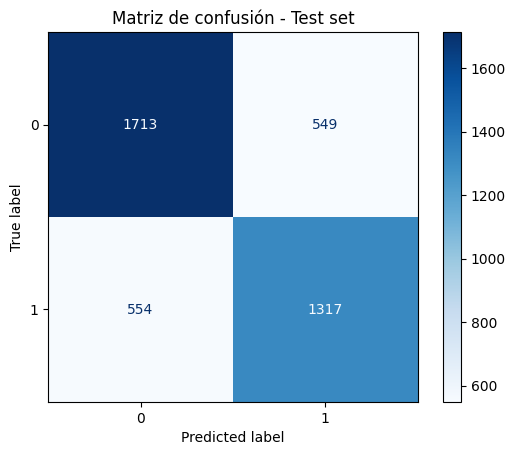

Evaluación sobre el test set:
Accuracy: 0.733
Recall:   0.704
F1 Score: 0.705

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2262
           1       0.71      0.70      0.70      1871

    accuracy                           0.73      4133
   macro avg       0.73      0.73      0.73      4133
weighted avg       0.73      0.73      0.73      4133



In [195]:
# Asegurar consistencia en train
X_train_pred = df_trainval[vars_predictivas].copy()
y_train = df_trainval[target].copy()

# Entrenar el modelo completo
pipe_baseline.fit(X_train_pred, y_train)

# Predecir sobre test
y_pred = pipe_baseline.predict(X_test_pred)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Test set")
plt.show()

# Métricas finales
print("Evaluación sobre el test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Recall:   {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


## 7.4 Visualizacion comparativa – Folds ADORE vs. Test
[Indice](#indice)

Visualizamos las métricas de rendimiento (`accuracy`, `recall`, `f1`) por fold (0–4) y en el conjunto de test (`split_occurrence = "test"`). Esto nos permite evaluar:

- Estabilidad del modelo en CV
- Comparación directa contra generalización real (test)

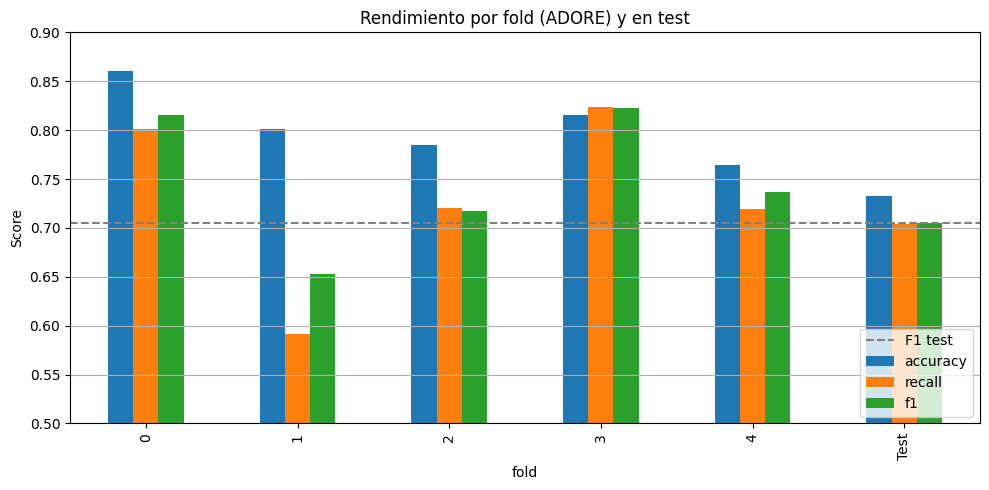

In [196]:
# Crear copia extendida con los valores del test
df_plot = df_cv_adore.copy()
df_plot.loc[len(df_plot)] = ['Test', 
                             accuracy_score(y_test, y_pred),
                             recall_score(y_test, y_pred),
                             f1_score(y_test, y_pred)]

# Convertir fold a string para visualización
df_plot['fold'] = df_plot['fold'].astype(str)

# Graficar
fig, ax = plt.subplots(figsize=(10, 5))
df_plot.set_index('fold')[['accuracy', 'recall', 'f1']].plot(kind='bar', ax=ax)

plt.title("Rendimiento por fold (ADORE) y en test")
plt.ylabel("Score")
plt.ylim(0.5, 0.9)
plt.axhline(y=df_plot[df_plot['fold'] == 'Test']['f1'].values[0],
            color='gray', linestyle='--', linewidth=1.5, label='F1 test')

plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

| Observación clave                               | Interpretación                                                        |
| ----------------------------------------------- | --------------------------------------------------------------------- |
| Folds 0 y 3 con métricas más altas              | Posiblemente más “fáciles” (menos diversidad o clases más separables) |
| Fold 1 con recall muy bajo (\~0.59)             | Pudo tener más clase 1 mal representada o variables más ruidosas      |
| Test tiene rendimiento **ligeramente inferior** | **Buena generalización**, sin caída drástica                          |
| F1 test ~ 0.705 frente a F1 CV ~ 0.749          | El modelo se comporta de forma estable, sin overfitting               |

## 7.5 Guardado del pipeline completo entrenado

Guardamos el pipeline baseline (preprocesador + modelo) en formato `.joblib` para futuras evaluaciones, comparaciones o predicciones sin necesidad de reentrenar.

In [197]:
# Crear carpeta si no existe
os.makedirs("./src/models", exist_ok=True)

# Guardar pipeline completo entrenado
joblib.dump(pipe_baseline, "./src/models/baseline_model.joblib")

print("Modelo baseline guardado en: models/baseline_model.joblib")

Modelo baseline guardado en: models/baseline_model.joblib


## 7.6 Comentarios y cierre del modelo baseline
[Indice](#indice)

### Desempeño del modelo

El modelo baseline de **Regresión Logística** obtuvo los siguientes resultados:

- **Validación cruzada (5 folds ADORE):**
  - Accuracy promedio: **0.805**
  - Recall promedio: **0.731**
  - F1 Score promedio: **0.749**

- **Evaluación final en test (`split_occurrence = "test"`):**
  - Accuracy: **0.733**
  - Recall: **0.703**
  - F1 Score: **0.705**

Estos resultados muestran un **buen nivel de generalización**, sin sobreajuste significativo. La ligera caída del rendimiento en el conjunto de test es esperable, dado que contiene compuestos y especies completamente nuevas no presentes durante el entrenamiento.


### Comparación con el objetivo del negocio

**Objetivo general:** predecir la toxicidad aguda (`result_conc1_mean_binary`) de sustancias químicas en peces, como alternativa ética, rápida y escalable a los ensayos in vivo.

**Evaluación del baseline:**

- El modelo logra identificar correctamente el efecto tóxico en ≈70% de los casos, incluso en condiciones no vistas durante el entrenamiento.
- Aunque no es un sistema listo para toma de decisiones regulatoria, **sí proporciona una primera capa informativa útil** para filtrar compuestos potencialmente críticos.


### Posibles mejoras en siguientes etapas

- Incluir **variables contextuales** (ambientales y taxonómicas) ya disponibles, actualmente excluidas del baseline.
- Probar modelos más expresivos (e.g. **Random Forest**, **XGBoost**) y ajustar hiperparámetros.
- Aplicar **reducción de dimensionalidad** o selección de features más refinada.
- Evaluar **explicabilidad** con SHAP para identificar qué factores químicos influyen más en la predicción.


### Reutilización del pipeline

El pipeline de preprocesamiento ya está completamente funcional y puede aplicarse a cualquier clasificador:

- Estandariza y transforma automáticamente los datos según su tipo
- Admite integración directa en workflows reproducibles
- Está guardado como objeto persistente (`baseline_model.joblib`)



**Conclusión:**  
El modelo baseline cumple su función como punto de partida sólido. A partir de esta base, se abre el camino para modelos más complejos y explicativos, alineados con el objetivo de construir herramientas **in silico** robustas para ecotoxicología regulatoria.

---


# 8 Seleccion del modelo final
[Indice](#indice)

Tras evaluar modelos más complejos como Random Forest y XGBoost, se observó que ninguno superaba consistentemente el rendimiento del modelo baseline de regresión logística. Ambos presentaron una mayor variabilidad entre folds y F1-scores promedio inferiores, lo que sugiere un peor ajuste bajo las condiciones del benchmark. Asimismo, se probó la integración de variables contextuales, que no aportaron mejoras sustanciales en las métricas del modelo final, por lo que también fueron descartadas. 

Por ello, se optó por mantener y optimizar el modelo de regresión logística como candidato final, procediendo a afinarlo mediante **ajuste de hiperparámetros** con el objetivo de consolidarlo como versión definitiva.

> Para más detalles sobre estas decisiones, consultar `0_4_modelado_y_validacion.ipynb`.

## 8.1 Optimizacion del modelo final
### Ajuste de hiperparametros – LogReg

Aunque el modelo baseline de Regresión Logística ya ofrecía un rendimiento competitivo, se explora la posibilidad de **mejorar ligeramente su rendimiento y estabilidad** mediante el ajuste de hiperparámetros clave.

#### Parámetros considerados

- `C`: controla la regularización (inverso del coeficiente de penalización). Se explora en escala logarítmica.
- `penalty`: tipo de regularización (L1 o L2)
- `solver`: algoritmo de optimización compatible con cada tipo de penalización

### Ajuste manual por fold (ADORE) – LogReg

Para mantener la coherencia con el benchmark ADORE y los modelos anteriores, se realiza el ajuste de hiperparámetros de la Regresión Logística de forma manual por fold:

1. Para cada fold `k` (0 a 4), se entrena sobre el conjunto `split_occurrence ≠ k` y se valida sobre `split_occurrence = k`.
2. En el conjunto de entrenamiento de cada fold se realiza una búsqueda de hiperparámetros con `GridSearchCV` (usando validación cruzada interna).
3. Se evalúa el modelo resultante sobre la validación externa (fold `k`) y se guarda su F1-score.

Este enfoque garantiza comparabilidad directa y evita fugas de información estructurales.

In [198]:
X_train_pred = df_trainval[vars_predictivas].copy()
y_train = df_trainval[target].copy()

In [199]:
# Espacio de búsqueda
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Resultados por fold
results = []

# Folds definidos por ADORE
folds_adore = [0, 1, 2, 3, 4]

for fold in folds_adore:
    print(f"\n Buscando hiperparámetros en fold {fold}...")

    # Separar train y val según el fold actual
    df_train = df_trainval[df_trainval['split_occurrence'] != fold].copy()
    df_val = df_trainval[df_trainval['split_occurrence'] == fold].copy()

    # Features y target
    X_train = df_train[vars_predictivas].copy()
    y_train = df_train[target].copy()
    X_val = df_val[vars_predictivas].copy()
    y_val = df_val[target].copy()

    # Pipeline
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', logreg)
    ])

    # GridSearch interno (validación cruzada dentro del fold)
    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring='f1',
        cv=3,
        n_jobs=-1,
        verbose=0
    )

    # Entrenar búsqueda
    grid.fit(X_train, y_train)

    # Predecir en validación externa
    y_pred = grid.best_estimator_.predict(X_val)
    f1 = f1_score(y_val, y_pred)

    # Guardar resultados
    results.append({
        'fold': fold,
        'best_params': grid.best_params_,
        'f1': f1
    })

# Convertir a DataFrame
df_logreg_search = pd.DataFrame(results)
display(df_logreg_search)

# F1 promedio
print(f"\n F1-score promedio tras ajuste: {df_logreg_search['f1'].mean():.4f}")


 Buscando hiperparámetros en fold 0...

 Buscando hiperparámetros en fold 1...

 Buscando hiperparámetros en fold 2...

 Buscando hiperparámetros en fold 3...

 Buscando hiperparámetros en fold 4...


fold                                        best_params        f1
0     0  {'classifier__C': 0.1, 'classifier__penalty': ...  0.792954
1     1  {'classifier__C': 0.01, 'classifier__penalty':...  0.686590
2     2  {'classifier__C': 0.1, 'classifier__penalty': ...  0.723443
3     3  {'classifier__C': 0.1, 'classifier__penalty': ...  0.816933
4     4  {'classifier__C': 0.01, 'classifier__penalty':...  0.703878


 F1-score promedio tras ajuste: 0.7448


## 8.2  Entrenamiento final y evaluacion en test set (modelo ajustado)

Tras seleccionar los mejores hiperparámetros mediante validación cruzada manual (folds ADORE 0–4), se ha reentrenado el modelo final con **todo el conjunto de entrenamiento (`trainval`)**. Esto permite maximizar el aprendizaje antes de la evaluación final.

Se evalúa sobre el conjunto de **test oficial** (`split_occurrence = 'test'`), que contiene sustancias y especies **no vistas durante el entrenamiento**, lo que representa un verdadero test de generalización.

**Hiperparámetros utilizados**

- `C = 0.1`: mayor regularización (modelo más simple, menor sobreajuste)
- `penalty = 'l2'`: regularización ridge
- `solver = 'liblinear'`: recomendado para conjuntos pequeños o regulares

**Resultados esperados**

- Métricas **ligeramente por debajo** de las observadas en validación cruzada (CV), pero sin caída drástica.
- Buen equilibrio entre sensibilidad y precisión.
- Validación de que el modelo se generaliza bien a datos nuevos.

Este es ahora el **modelo oficial del proyecto**, salvo que se decida incorporar variables contextuales u otros enriquecimientos en el siguiente bloque.


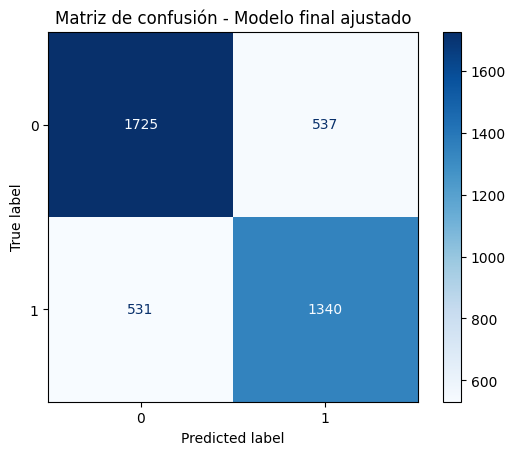

Evaluación del modelo final en test set:
Accuracy: 0.742
Recall:   0.716
F1 Score: 0.715

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76      2262
           1       0.71      0.72      0.72      1871

    accuracy                           0.74      4133
   macro avg       0.74      0.74      0.74      4133
weighted avg       0.74      0.74      0.74      4133



In [200]:
# 1. Definir el modelo con los mejores hiperparámetros encontrados
logreg_final = LogisticRegression(
    C=0.1,
    penalty='l2',
    solver='liblinear',
    max_iter=1000,
    random_state=42
)

# 2. Pipeline final con preprocesador y modelo ajustado
pipe_final = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', logreg_final)
])

# 3. Asegurar carga coherente y sin filtrados adicionales
X_train_pred = df_trainval[vars_predictivas].copy()
y_train = df_trainval[target].copy()
X_test_pred = df_test[vars_predictivas].copy()
y_test = df_test.copy()[target]

# 4. Entrenar el pipeline completo con todos los datos de trainval
pipe_final.fit(X_train_pred, y_train)

# 5. Predecir sobre test
y_pred = pipe_final.predict(X_test_pred)

# 6. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de confusión - Modelo final ajustado")
plt.show()

# 7. Métricas finales
print("Evaluación del modelo final en test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Recall:   {recall_score(y_test, y_pred):.3f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Son ligeramente superiores al baseline sin ajuste (F1 = 0.705) y confirman que el ajuste de hiperparámetros mejoró la generalización del modelo.

### **Interpretacion rapida de la matriz de confusion**
- TP = 1340 → predijo correctamente toxicidad
- FN = 531 → clasificó erróneamente como no tóxico (fallo importante en el contexto)
- FP = 537 → clasificó erróneamente como tóxico
- TN = 1725 → predijo correctamente no tóxico

## 8.3 Ajuste del umbral de decisión y análisis del coste de error

La clasificación binaria estándar usa un umbral de decisión por defecto de 0.5 para convertir probabilidades en clases. Sin embargo, este valor no siempre es óptimo, especialmente en contextos donde **los errores no tienen el mismo coste**.

En este caso, **los falsos negativos (FN)** —es decir, predecir que una sustancia **no es tóxica** cuando en realidad sí lo es— pueden tener consecuencias graves en contextos regulatorios y ambientales. Por tanto, se considera relevante explorar cómo varían las métricas si ajustamos el umbral para **priorizar el recall** y reducir estos errores.

A continuación, se evaluaron los umbrales de 0.5 (por defecto), 0.4 y 0.3:

- Al reducir el umbral, se identifican más sustancias como potencialmente tóxicas (más positivos), lo cual **reduce falsos negativos (FN)**, pero incrementa los falsos positivos (FP).
- Este trade-off puede ser **aceptable** en escenarios donde se prefiere un exceso de precaución antes que el riesgo de subestimar la toxicidad.

Este tipo de análisis aporta valor añadido al modelo, alineándolo mejor con sus implicaciones en el mundo real. Aunque no se implementa un nuevo umbral como estándar, se deja planteada la posibilidad de ajustarlo en función del **contexto de uso** (por ejemplo, cribado regulatorio vs. investigación preliminar).


In [201]:
# Probabilidades del modelo sobre test
y_proba_test = pipe_final.predict_proba(X_test)[:, 1]

# Función auxiliar para evaluar distintos umbrales
def evaluar_umbral(umbral):
    y_pred = (y_proba_test >= umbral).astype(int)
    print(f"\n Evaluación con umbral = {umbral:.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, digits=3))

# Evaluamos varios umbrales
for u in [0.5, 0.4, 0.3]:
    evaluar_umbral(u)


 Evaluación con umbral = 0.50
[[1725  537]
 [ 531 1340]]
              precision    recall  f1-score   support

           0      0.765     0.763     0.764      2262
           1      0.714     0.716     0.715      1871

    accuracy                          0.742      4133
   macro avg      0.739     0.739     0.739      4133
weighted avg      0.742     0.742     0.742      4133


 Evaluación con umbral = 0.40
[[1578  684]
 [ 392 1479]]
              precision    recall  f1-score   support

           0      0.801     0.698     0.746      2262
           1      0.684     0.790     0.733      1871

    accuracy                          0.740      4133
   macro avg      0.742     0.744     0.740      4133
weighted avg      0.748     0.740     0.740      4133


 Evaluación con umbral = 0.30
[[1489  773]
 [ 336 1535]]
              precision    recall  f1-score   support

           0      0.816     0.658     0.729      2262
           1      0.665     0.820     0.735      1871

    accu

Los resultados obtenidos con el modelo final (`pipe_final`) muestran que el ajuste del umbral de decisión tiene un impacto claro en la reducción de errores críticos:

- Con el umbral por defecto (0.5), se incurre en **531 falsos negativos** (sustancias tóxicas clasificadas como no tóxicas).
- Al reducir el umbral a 0.3, los falsos negativos bajan a **336**, es decir, una mejora del 36.7 %.
- Además, el recall aumenta de 0.716 a 0.820, y el F1-score mejora ligeramente (de 0.715 a 0.735), manteniendo un rendimiento global sólido.

Esto refuerza que el modelo puede adaptarse según el perfil de riesgo del usuario: un **umbral más bajo para contextos reguladores**, donde se prioriza no pasar por alto toxicidad, y un umbral equilibrado para contextos de exploración o desarrollo industrial.

La flexibilidad para ajustar el umbral sin modificar el modelo lo convierte en una herramienta útil y robusta para distintos escenarios de toma de decisiones.

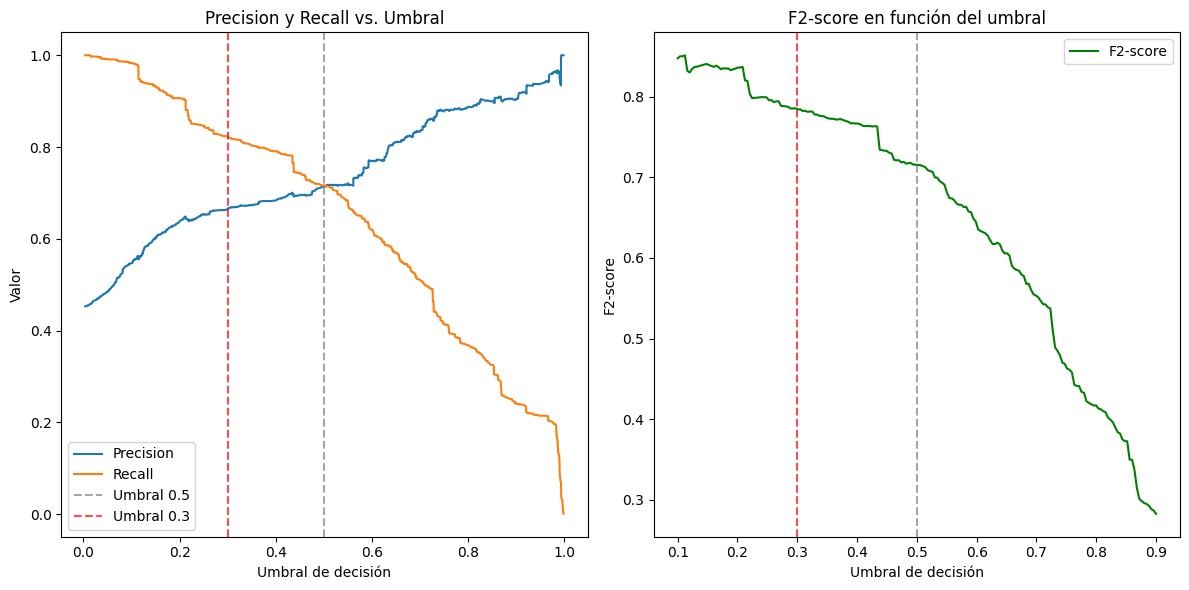

In [202]:
# Calcular probabilidades
y_scores = pipe_final.predict_proba(X_test_pred)[:, 1]

# Umbrales y F2-score
thresholds = np.linspace(0.1, 0.9, 200)
fbeta_scores = []

for t in thresholds:
    y_pred_thresh = (y_scores >= t).astype(int)
    f2 = fbeta_score(y_test, y_pred_thresh, beta=2)
    fbeta_scores.append(f2)

# Curvas de precision y recall
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, y_scores)

# Gráficos
plt.figure(figsize=(12, 6))

# Precision y Recall
plt.subplot(1, 2, 1)
plt.plot(threshold_curve, precision_curve[:-1], label='Precision')
plt.plot(threshold_curve, recall_curve[:-1], label='Recall')
plt.axvline(0.5, color='gray', linestyle='--', alpha=0.7, label='Umbral 0.5')
plt.axvline(0.3, color='red', linestyle='--', alpha=0.7, label='Umbral 0.3')
plt.xlabel('Umbral de decisión')
plt.ylabel('Valor')
plt.title('Precision y Recall vs. Umbral')
plt.legend()

# F2-score
plt.subplot(1, 2, 2)
plt.plot(thresholds, fbeta_scores, label='F2-score', color='green')
plt.axvline(0.5, color='gray', linestyle='--', alpha=0.7)
plt.axvline(0.3, color='red', linestyle='--', alpha=0.7)
plt.xlabel('Umbral de decisión')
plt.ylabel('F2-score')
plt.title('F2-score en función del umbral')
plt.legend()

plt.tight_layout()
plt.show()

Este gráfico permite argumentar con datos que un umbral de 0.3 es óptimo para contextos de cribado toxicológico, donde evitar falsos negativos es prioritario.
A la vez, permite al usuario ajustar el umbral según su nivel de tolerancia al riesgo, lo que otorga flexibilidad y madurez al sistema predictivo.

## 8.4  Conclusiones del modelo final

Tras comparar múltiples modelos con diferentes arquitecturas y ajustes, se ha seleccionado como modelo final una **Regresión Logística con ajuste de hiperparámetros**, debido a los siguientes motivos:

- **Rendimiento consistente y competitivo**:
  - F1-score promedio en validación cruzada (folds ADORE): **0.74**
  - F1-score en test (compuestos no vistos): **0.715**

- **Estabilidad entre folds**, con menor varianza respecto a Random Forest o XGBoost, lo que sugiere una mayor robustez.

- **Mejor interpretabilidad**, lo que favorece su uso en contextos regulatorios y científicos.

- **Menor riesgo de sobreajuste**, a pesar de ser un modelo lineal, se comporta de forma balanceada entre sensibilidad y precisión.

Aunque modelos como Random Forest o XGBoost podrían ser más expresivos, **no lograron superar al baseline** en condiciones comparables. Por ello, y dado el objetivo del proyecto (construir una primera herramienta fiable y ética para predicción de toxicidad), la Regresión Logística ajustada se considera la mejor elección actual.

## 8.5 Guardado del modelo
Una vez seleccionados los mejores hiperparámetros a partir de la validación cruzada con los folds oficiales (ADORE), se ha reentrenado el pipeline completo (preprocesador + modelo) usando todo el conjunto `trainval`.

Este pipeline ha sido guardado como modelo final para futuras predicciones o despliegue, garantizando:

- Reproducibilidad completa del flujo
- Consistencia en el preprocesado
- Aprovechamiento de todos los datos disponibles

In [203]:
print("Dimensiones del conjunto de entrenamiento:", X_train_pred.shape, y_train.shape)
print("Modelo entrenado:", pipe_final.named_steps['classifier'])

Dimensiones del conjunto de entrenamiento: (21981, 26) (21981,)
Modelo entrenado: LogisticRegression(C=0.1, max_iter=1000, random_state=42, solver='liblinear')


In [204]:
# Guardar el pipeline entrenado con hiperparámetros ajustados
joblib.dump(pipe_final, "./src/models/modelo_final_logreg_tuning.joblib")
print("Modelo final guardado en: models/modelo_final_logreg_tuning.joblib")

Modelo final guardado en: models/modelo_final_logreg_tuning.joblib


## 8. 6 Interpretacion del modelo 
[Indice](#indice)

### Importancia de coeficientes
Como el modelo seleccionado es una Regresión Logística, la interpretación de los coeficientes es directa: cada valor indica el impacto (positivo o negativo) de una variable en la probabilidad de que una sustancia sea clasificada como **tóxica** (`1`).

A continuación se muestran las 15 variables con mayor influencia positiva y negativa, respectivamente.

In [205]:
def get_feature_names(column_transformer):
    """
    Extrae los nombres de las variables resultantes tras aplicar un ColumnTransformer,
    incluyendo pipelines anidados (como escalado u OneHotEncoder), en el orden en que
    aparecen en el array de entrada del modelo.

    Args:
        column_transformer (ColumnTransformer): transformador de columnas entrenado.

    Returns:
        list: lista de nombres de variables transformadas.
    """
    feature_names = []

    for name, transformer, cols in column_transformer.transformers_:
        if name == 'remainder':
            continue  # ignorar columnas que se dejan sin transformar

        # Si hay pipeline interno (e.g., scaler + encoder), extraer último paso
        if isinstance(transformer, Pipeline):
            last_step = transformer.steps[-1][1]
        else:
            last_step = transformer

        try:
            names = last_step.get_feature_names_out(cols)
        except AttributeError:
            names = cols  # fallback si el transformador no implementa este método

        feature_names.extend(names)

    return feature_names


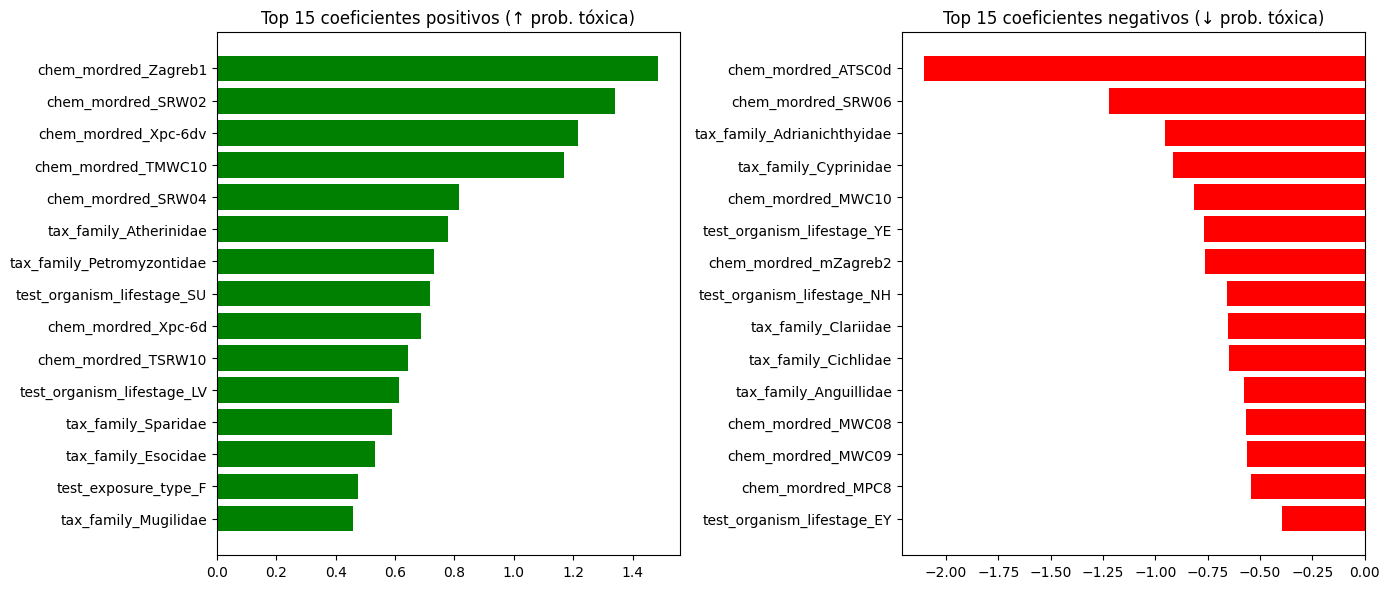

In [206]:
# Extraer el clasificador del pipeline
clf = pipe_final.named_steps['classifier']
coefs = clf.coef_[0]  # vector 1D con coeficientes

# Obtener los nombres de features transformados
feature_names = get_feature_names(pipe_final.named_steps['preprocessor'])

# Asociar coeficientes con nombres
coef_df = pd.DataFrame({
    'feature': feature_names,
    'coef': coefs
})

# Ordenar por valor absoluto
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df_sorted = coef_df.sort_values('abs_coef', ascending=False)

# Visualizar top 15 positivos y negativos
top_pos = coef_df[coef_df['coef'] > 0].sort_values('coef', ascending=False).head(15)
top_neg = coef_df[coef_df['coef'] < 0].sort_values('coef', ascending=True).head(15)

# Gráfico
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].barh(top_pos['feature'], top_pos['coef'], color='green')
axes[0].set_title("Top 15 coeficientes positivos (↑ prob. tóxica)")
axes[0].invert_yaxis()

axes[1].barh(top_neg['feature'], top_neg['coef'], color='red')
axes[1].set_title("Top 15 coeficientes negativos (↓ prob. tóxica)")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

- Coeficientes **positivos** (verde): aumentan la probabilidad de que una sustancia sea clasificada como **tóxica** (`1`).
- Coeficientes **negativos** (rojo): reducen esa probabilidad, asociándose a clasificaciones como **no tóxicas** (`0`).

#### Variables más influyentes

Entre las variables más influyentes se encuentran:

- **Descriptores moleculares** como `Zagreb1`, `SRW02` o `Xpc-6dv`, que capturan propiedades químicas complejas relacionadas con la reactividad o estructura.
- **Familias taxonómicas** (`Atherinidae`, `Petromyzontidae`, `Adrianichthyidae`, etc.) que podrían reflejar diferencias fisiológicas en la sensibilidad al compuesto.
- **Fase de vida del organismo de test** (`lifestage_SU`, `YE`, `EY`...), lo que refuerza la importancia del contexto biológico del ensayo.


> Esta interpretación no solo valida que el modelo aprende patrones significativos, sino que también permite generar hipótesis biológicas o químicas sobre los factores que determinan la toxicidad.


---

# 9 Interpretacion del modelo con SHAP
[Indice](#indice)

Para complementar la interpretación basada en coeficientes, se utilizó el método SHAP (SHapley Additive exPlanations), ampliamente reconocido como una de las técnicas más sólidas para explicar modelos de Machine Learning.

Aunque el modelo final es una regresión logística (modelo lineal), SHAP permite:

- Medir la contribución individual de cada variable a cada predicción
- Comparar la importancia relativa de las variables en el conjunto de test
- Visualizar interacciones y variabilidad entre muestras

## 9.1 Summary plot

A continuación, se muestra el gráfico `summary_plot`, que resume la importancia y dirección del efecto de cada feature sobre las predicciones.

In [207]:
# Aplicar solo el preprocesador al test
X_test_transformed = pipe_final.named_steps["preprocessor"].transform(X_test_pred)

# Obtener nombres de features transformadas
feature_names_transformed = get_feature_names(pipe_final.named_steps["preprocessor"])

In [208]:
# Extraer el clasificador entrenado
clf_final = pipe_final.named_steps["classifier"]

# Crear explainer (se asume modelo lineal)
explainer = shap.LinearExplainer(clf_final, X_test_transformed, feature_perturbation="interventional")

# Se usaLinearExplainer porque el modelo elegido es una regresión logística

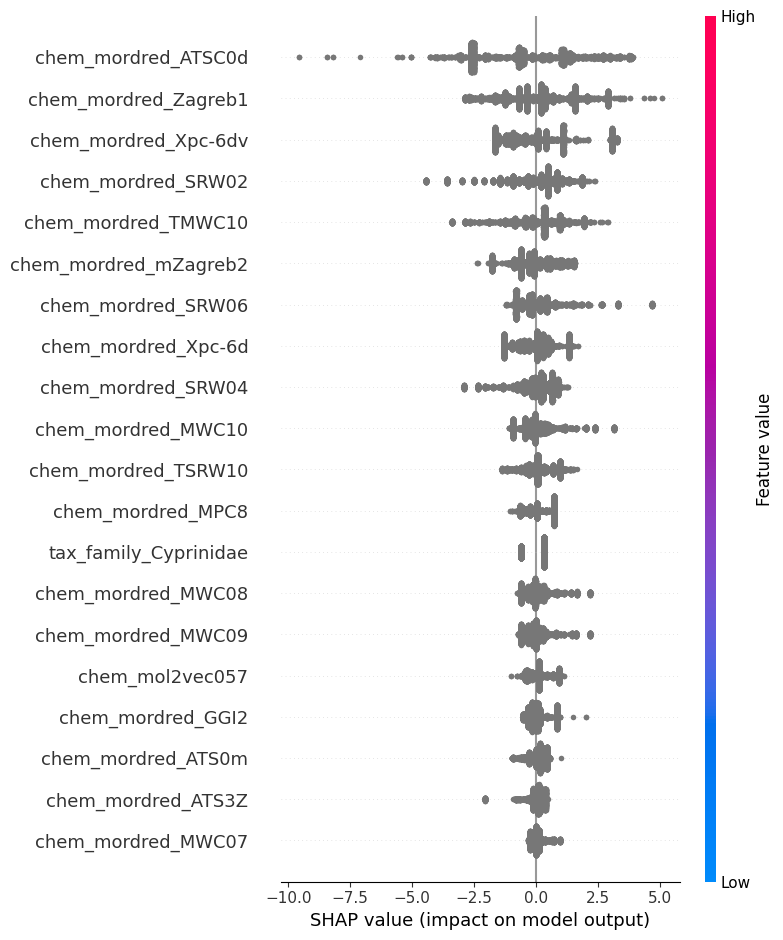

In [209]:
# Calcular los SHAP values sobre el test transformado
shap_values = explainer.shap_values(X_test_transformed)

# Convertimos a DataFrame para visualizar mejor
df_shap = pd.DataFrame(shap_values, columns=feature_names_transformed)

# Visualización resumen
shap.summary_plot(shap_values, features=X_test_transformed, feature_names=feature_names_transformed)

### Interpretación con SHAP – `summary_plot`

El gráfico SHAP generado sobre el set de test permite entender qué variables tienen mayor impacto sobre las predicciones del modelo y en qué dirección lo hacen.

#### Variables más influyentes

Las variables con mayor impacto en la predicción de toxicidad (tanto positiva como negativa) son:

- **chem_mordred_ATSC0d**  
- **chem_mordred_Zagreb1**  
- **chem_mordred_Xpc-6dv**  
- **chem_mordred_SRW02**  
- **chem_mordred_TMWC10**

Estas variables químicas aparecen consistentemente como relevantes tanto en el análisis de coeficientes como en el de SHAP, lo que refuerza su importancia.

#### ¿Qué muestra el gráfico?

- El **eje horizontal** muestra el impacto de cada variable en la salida del modelo (positiva -> más probable tóxica)
- Cada punto representa una observación del test set
- El **color** representa el valor de la feature (azul = bajo, rosa = alto)

Por ejemplo:

- En **chem_mordred_ATSC0d**, valores bajos están asociados con mayor probabilidad de predicción positiva (tóxica), mientras que valores altos empujan la predicción hacia no tóxica.
- En **Zagreb1**, ocurre lo contrario: valores altos tienen efecto positivo sobre la probabilidad de toxicidad.

#### Conclusión

SHAP confirma los hallazgos del análisis de coeficientes y aporta una capa adicional de explicabilidad a nivel individual. Aunque el modelo es lineal, se observan interacciones sutiles y efectos diferenciados según el valor de cada variable, lo que refuerza la utilidad del análisis SHAP como herramienta complementaria.

Este tipo de análisis puede ser muy útil en contextos regulatorios donde se requiere justificar las predicciones del modelo con base en variables específicas.

## 9.2 Force plot
Su objetivo es mostrar, para un caso específico, qué variables empujan la predicción hacia "tóxica" (clase 1) o hacia "no tóxica" (clase 0), y en qué magnitud.

In [210]:
# Seleccionar un índice del test (puedes cambiarlo)
idx = 42

# Datos crudos (sin transformar, para mostrar si se quiere)
X_instance_raw = X_test_pred.iloc[idx]

# Datos transformados (como los ve el modelo)
X_instance_transformed = X_test_transformed[idx]

X_instance_dense = X_instance_transformed.toarray()

In [211]:
# Calcular valores SHAP individuales
shap_value_instance = explainer.shap_values(X_instance_transformed)

# Mostrar force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_value_instance,
    X_instance_dense,
    feature_names=feature_names_transformed
)

### Explicación individual – `force_plot`

Además del análisis global de importancia de variables, se utilizó un gráfico `force_plot` para examinar cómo el modelo toma decisiones en un caso específico.

Este gráfico permite visualizar:

- Qué variables empujan la predicción hacia un resultado **positivo (tóxica)** o **negativo (no tóxica)**
- La magnitud e impacto de cada variable en la decisión final
- El valor base del modelo (`expected value`) y cómo se ajusta con las contribuciones individuales

#### Caso seleccionado

Se analizó una muestra individual del conjunto de test (`instance 42`). El gráfico resultante fue guardado como archivo HTML interactivo.

> Este archivo puede abrirse en cualquier navegador para explorar la explicación de forma dinámica.

Este tipo de visualización resulta especialmente útil en contextos donde se requiere trazabilidad y justificación clara del comportamiento del modelo ante cada predicción.


In [212]:
# Crear el force_plot
force_plot_html = shap.force_plot(
    explainer.expected_value,
    shap_value_instance,
    X_instance_dense,
    feature_names=feature_names_transformed
)

# Guardar en archivo HTML interactivo
shap.save_html("./src/img/force_plot_instance42.html", force_plot_html)

---

# 10 Conclusiones finales y acciones de mejora
[Indice](#indice)

## 10.1  Conclusiones finales del proyecto

Este proyecto ha logrado desarrollar un modelo predictivo eficaz para anticipar la toxicidad aguda de sustancias químicas en peces, utilizando exclusivamente datos estructurados y estandarizados del benchmark ADORE. Tras una comparativa exhaustiva de distintos enfoques, se ha seleccionado como modelo final una **Regresión Logística con ajuste de hiperparámetros**, por su equilibrio entre rendimiento, estabilidad y transparencia interpretativa.

En particular, el modelo final alcanzó un **F1-score en test de 0.715**, con un rendimiento consistente a lo largo de la validación cruzada (F1 promedio ≈ 0.74), y mejoró ligeramente respecto al baseline sin ajuste (F1 = 0.705). Destaca también por su **baja varianza entre folds**, frente a alternativas como **Random Forest** o **XGBoost**, que mostraron mayor inestabilidad y no superaron al baseline en condiciones comparables.

Además, la interpretación basada en **coeficientes** y **valores SHAP** permitió identificar y validar los descriptores químicos más relevantes para la predicción, como `chem_mordred_ATSC0d` o `Zagreb1`, y observar la influencia de variables contextuales como la fase de vida del organismo testeado. Esta transparencia resulta especialmente valiosa en contextos científicos y regulatorios, donde comprender las causas de una predicción puede ser tan importante como la predicción en sí.

Como análisis complementario, se exploró la **sensibilidad del modelo al umbral de decisión**, es decir, al punto de corte que convierte las probabilidades generadas por la regresión logística en una clasificación binaria (`tóxico` / `no tóxico`). Este análisis demostró que:

- Al reducir el umbral de 0.5 a 0.3, el número de falsos negativos se reduce drásticamente (de 531 a 336), lo cual puede ser preferible en aplicaciones donde se busca **minimizar el riesgo de autorizar sustancias peligrosas**.
- Aunque se incrementan los falsos positivos, el F2-score (que prioriza el *recall*) mejora, alcanzando su punto óptimo en torno a un umbral ≈ 0.3.
- El accuracy global apenas varía (0.742 → 0.732), lo cual refuerza que este ajuste **no implica una degradación significativa del modelo**, sino un cambio en la política de decisión.

Esta reflexión refuerza que el modelo no solo es robusto y reproducible, sino también **adaptable a distintos contextos de uso**. En entornos regulatorios, puede priorizarse un umbral conservador para no subestimar la toxicidad, mientras que en entornos de investigación o cribado temprano puede mantenerse un umbral más equilibrado. En conjunto, el modelo constituye una **primera herramienta fiable y flexible** para apoyar la evaluación preliminar de toxicidad, reduciendo el uso de ensayos in vivo y favoreciendo un enfoque más ético, económico y ágil, en línea con los principios del reglamento REACH.


## 10.2 Acciones de mejora y siguientes pasos

A pesar de los buenos resultados obtenidos, el proyecto deja abiertas diversas líneas de trabajo que podrían fortalecer su aplicabilidad y generalización:


1. **Evaluación del modelo con variables enriquecidas**  
   Aunque en esta versión no se incorporaron fingerprints, taxonomía ni otras variables contextuales complejas, podrían reevaluarse en una futura iteración mediante técnicas avanzadas de selección o reducción de dimensionalidad (PCA, RFE, embeddings).

2. **Ampliación del análisis interpretativo**  
   El uso de SHAP ha sido un acierto, pero podría ampliarse con visualizaciones más profundas (dependence plots, decision plots) o con el análisis por subgrupos (p. ej., especies o familias de peces).

3. **Extensión a otros organismos y endpoints**  
   El enfoque desarrollado podría adaptarse a la predicción de toxicidad en **otros grupos biológicos** (crustáceos, algas) o a endpoints más complejos (como toxicidad crónica o bioacumulación), aprovechando el marco ya establecido y el pipeline reutilizable.

4. **Integración en plataformas de apoyo a la decisión**  
   A medio plazo, el modelo podría integrarse en una herramienta tipo web o API, que permita a reguladores, investigadores o empresas realizar cribados iniciales sobre nuevas sustancias con base en su estructura química y datos disponibles.



## 10.3 Integracion en un flujo de trabajo regulatorio o industrial
Una evolución natural del modelo sería su integración dentro de un sistema automatizado de cribado temprano para la evaluación de toxicidad ambiental. En un escenario realista, este modelo podría desplegarse como un servicio web o API que reciba como entrada la estructura química de una sustancia en formato SMILES, ampliamente utilizado en química computacional.

Aunque en este proyecto se excluyeron los SMILES y fingerprints como variables predictoras directas —por no aportar valor adicional y por no haber sido seleccionadas entre las mejores features por Random Forest ni SelectKBest—, sí se conservaron descriptores moleculares numéricos generados a partir de esas estructuras.

Por tanto, en un sistema real, la API no introduciría los SMILES directamente en el modelo, sino que actuaría en dos etapas:

    1. Preprocesado automático: La API recibiría un SMILES y, mediante herramientas como RDKit y Mordred, calcularía los descriptores moleculares requeridos por el modelo (como Zagreb1, ATSC0d, etc.).

    2. Predicción con el modelo entrenado: Una vez generados estos descriptores, se alimentarían al modelo de regresión logística, que devolvería la predicción binaria (tóxico / no tóxico) y una medida de probabilidad, junto con interpretaciones explicativas opcionales (por ejemplo, visualizaciones SHAP).

Este flujo permitiría integrar el modelo como una herramienta de cribado temprano en fases de pre-registro bajo normativas como REACH, reduciendo el uso de ensayos in vivo y priorizando las sustancias que requieren una evaluación toxicológica más rigurosa. Además, facilitaría su adopción tanto en contextos industriales (formulación de productos, I+D) como regulatorios (agencias evaluadoras, consultoras de toxicología).